In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import os
import pandas as pd

train_dir = "data/train_data"
train_df = pd.read_csv('data/Train.csv')

# Add 'ID_path' column by combining 'train_dir' and matching .npy filename
train_df['ID_path'] = train_df['ID'].apply(lambda x: os.path.join(train_dir, f"{x}.npy"))

# Verify the file exists (optional sanity check)
missing = [path for path in train_df['ID_path'] if not os.path.exists(path)]
assert len(missing) == 0, f"Missing files: {missing}"

train_set, valid_set = train_test_split(train_df, 
                            stratify=train_df['label'], 
                            test_size=0.2, random_state=42)

train_df.head()

,ID,label,ID_path
0,ID_HUD1ST,1,data/train_data/ID_HUD1ST.npy
1,ID_KGE2HY,1,data/train_data/ID_KGE2HY.npy
2,ID_VHV9BL,1,data/train_data/ID_VHV9BL.npy
3,ID_ZT0VEJ,0,data/train_data/ID_ZT0VEJ.npy
4,ID_5NFXVY,0,data/train_data/ID_5NFXVY.npy


In [13]:
test_df  = pd.read_csv('data/Test.csv')
test_df['ID_path'] = test_df['ID'].apply(lambda x: os.path.join(train_dir, f"{x}.npy"))

In [11]:
test_df

,ID
0,ID_ICB8K9
1,ID_2D4AOJ
2,ID_2TVPI0
3,ID_E05WIK
4,ID_KKFDJO
...,...
5393,ID_44IBS3
5394,ID_253HW0
5395,ID_10B6W6
5396,ID_SB70CZ


Total training samples: 7147
Total test samples: 5398
Using device: cuda:0

Starting 5-Fold Cross-Validation...

--- Fold 1/5 ---


Fold 1 Epoch 1/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.04it/s]


Fold 1 Epoch 1 Train Loss: 0.4139, Train Acc: 0.8344 | Val Loss: 0.3049, Val Acc: 0.8727
  --> Best model for Fold 1 updated with Val Acc: 0.8727


Fold 1 Epoch 2/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.85it/s]


Fold 1 Epoch 2 Train Loss: 0.3127, Train Acc: 0.8636 | Val Loss: 0.3737, Val Acc: 0.8629


Fold 1 Epoch 3/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.09it/s]


Fold 1 Epoch 3 Train Loss: 0.2872, Train Acc: 0.8746 | Val Loss: 0.3592, Val Acc: 0.8490


Fold 1 Epoch 4/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.07it/s]


Fold 1 Epoch 4 Train Loss: 0.2626, Train Acc: 0.8853 | Val Loss: 0.2749, Val Acc: 0.8874
  --> Best model for Fold 1 updated with Val Acc: 0.8874


Fold 1 Epoch 5/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.65it/s]


Fold 1 Epoch 5 Train Loss: 0.2806, Train Acc: 0.8805 | Val Loss: 0.2764, Val Acc: 0.8832
Fold 1 training complete. Best validation accuracy: 0.8874

--- Fold 2/5 ---


Fold 2 Epoch 1/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.64it/s]


Fold 2 Epoch 1 Train Loss: 0.4409, Train Acc: 0.8258 | Val Loss: 0.3434, Val Acc: 0.8622
  --> Best model for Fold 2 updated with Val Acc: 0.8622


Fold 2 Epoch 2/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.96it/s]


Fold 2 Epoch 2 Train Loss: 0.3169, Train Acc: 0.8674 | Val Loss: 0.6117, Val Acc: 0.6091


Fold 2 Epoch 3/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.96it/s]


Fold 2 Epoch 3 Train Loss: 0.2734, Train Acc: 0.8830 | Val Loss: 0.3044, Val Acc: 0.8524


Fold 2 Epoch 4/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.70it/s]


Fold 2 Epoch 4 Train Loss: 0.2715, Train Acc: 0.8816 | Val Loss: 0.3356, Val Acc: 0.8510


Fold 2 Epoch 5/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.49it/s]


Fold 2 Epoch 5 Train Loss: 0.2625, Train Acc: 0.8847 | Val Loss: 0.2425, Val Acc: 0.8951
  --> Best model for Fold 2 updated with Val Acc: 0.8951
Fold 2 training complete. Best validation accuracy: 0.8951

--- Fold 3/5 ---


Fold 3 Epoch 1/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.00it/s]


Fold 3 Epoch 1 Train Loss: 0.4497, Train Acc: 0.8214 | Val Loss: 0.3975, Val Acc: 0.8481
  --> Best model for Fold 3 updated with Val Acc: 0.8481


Fold 3 Epoch 2/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 111.07it/s]


Fold 3 Epoch 2 Train Loss: 0.3332, Train Acc: 0.8527 | Val Loss: 0.2984, Val Acc: 0.8852
  --> Best model for Fold 3 updated with Val Acc: 0.8852


Fold 3 Epoch 3/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.41it/s]


Fold 3 Epoch 3 Train Loss: 0.2827, Train Acc: 0.8755 | Val Loss: 0.3059, Val Acc: 0.8761


Fold 3 Epoch 4/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.73it/s]


Fold 3 Epoch 4 Train Loss: 0.2812, Train Acc: 0.8795 | Val Loss: 0.3368, Val Acc: 0.8621


Fold 3 Epoch 5/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.14it/s]


Fold 3 Epoch 5 Train Loss: 0.2790, Train Acc: 0.8804 | Val Loss: 0.3077, Val Acc: 0.8810
Fold 3 training complete. Best validation accuracy: 0.8852

--- Fold 4/5 ---


Fold 4 Epoch 1/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.23it/s]


Fold 4 Epoch 1 Train Loss: 0.3834, Train Acc: 0.8377 | Val Loss: 0.2853, Val Acc: 0.8698
  --> Best model for Fold 4 updated with Val Acc: 0.8698


Fold 4 Epoch 2/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.76it/s]


Fold 4 Epoch 2 Train Loss: 0.3176, Train Acc: 0.8624 | Val Loss: 0.6120, Val Acc: 0.7222


Fold 4 Epoch 3/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.85it/s]


Fold 4 Epoch 3 Train Loss: 0.3197, Train Acc: 0.8646 | Val Loss: 0.3449, Val Acc: 0.8251


Fold 4 Epoch 4/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.84it/s]


Fold 4 Epoch 4 Train Loss: 0.2755, Train Acc: 0.8788 | Val Loss: 0.3005, Val Acc: 0.8614


Fold 4 Epoch 5/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.04it/s]


Fold 4 Epoch 5 Train Loss: 0.2560, Train Acc: 0.8914 | Val Loss: 0.2675, Val Acc: 0.8796
  --> Best model for Fold 4 updated with Val Acc: 0.8796
Fold 4 training complete. Best validation accuracy: 0.8796

--- Fold 5/5 ---


Fold 5 Epoch 1/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.92it/s]


Fold 5 Epoch 1 Train Loss: 0.4341, Train Acc: 0.8246 | Val Loss: 0.3909, Val Acc: 0.8635
  --> Best model for Fold 5 updated with Val Acc: 0.8635


Fold 5 Epoch 2/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.36it/s]


Fold 5 Epoch 2 Train Loss: 0.3276, Train Acc: 0.8597 | Val Loss: 0.4973, Val Acc: 0.7607


Fold 5 Epoch 3/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.65it/s]


Fold 5 Epoch 3 Train Loss: 0.3055, Train Acc: 0.8736 | Val Loss: 0.2431, Val Acc: 0.8908
  --> Best model for Fold 5 updated with Val Acc: 0.8908


Fold 5 Epoch 4/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.31it/s]


Fold 5 Epoch 4 Train Loss: 0.2854, Train Acc: 0.8797 | Val Loss: 0.4736, Val Acc: 0.8453


Fold 5 Epoch 5/5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.21it/s]


Fold 5 Epoch 5 Train Loss: 0.3685, Train Acc: 0.8449 | Val Loss: 0.3001, Val Acc: 0.8663
Fold 5 training complete. Best validation accuracy: 0.8908

Cross-Validation Training Complete!


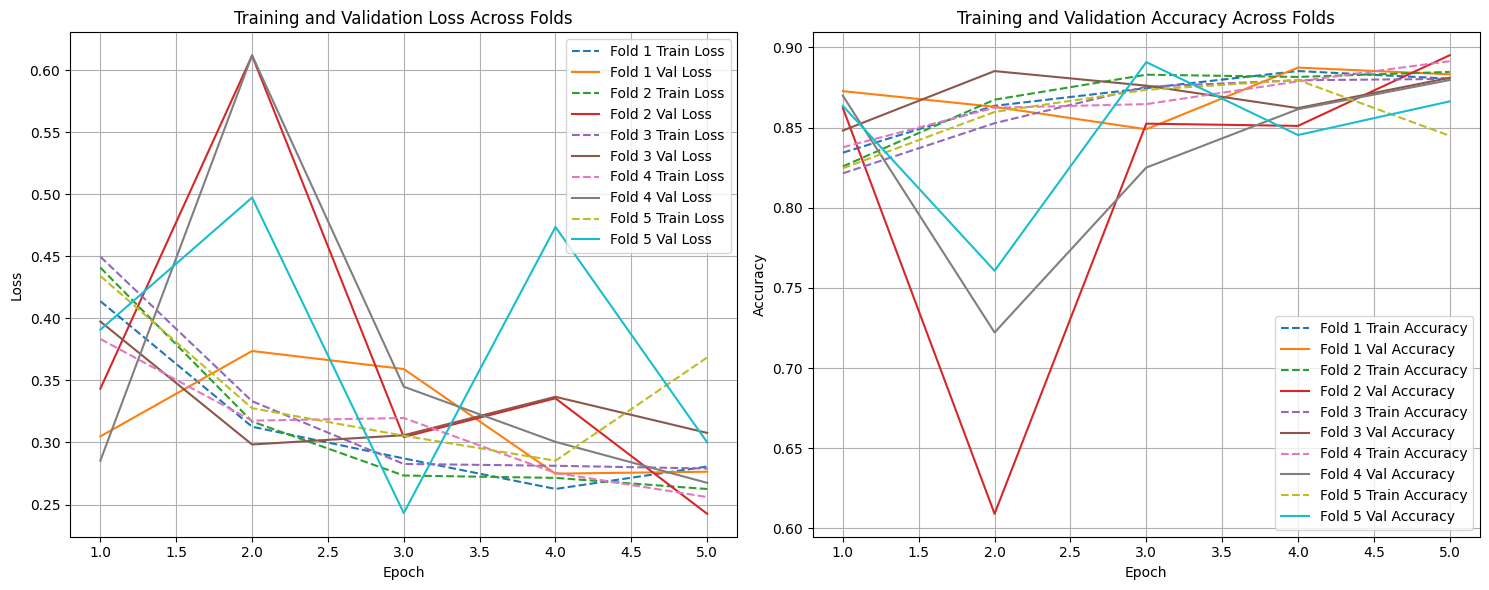


Making predictions on test data...
  Predicting with model from Fold 1...


  Predicting Fold 1:   0%|          | 0/338 [00:00<?, ?it/s]


KeyError: 'ID_path'

In [ ]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold # Import StratifiedKFold
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy # For deep copying models


print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")

# --- Data Loading and Normalization Function (from your prompt) ---
def load_and_normalize_npy_image(image_id_path):
    """Loads a .npy file, normalizes each band, and returns the normalized image."""
    img = np.load(image_id_path)
    img = img.astype(np.float32) 
    img_normalized = (img - img.min(axis=(0, 1))) / (img.max(axis=(0, 1)) - img.min(axis=(0, 1)) + 1e-5)
    return img_normalized

# --- Custom PyTorch Dataset Class (from previous response) ---
class NPYDataset(Dataset):
    def __init__(self, dataframe, transform=None, is_test=False):
        self.dataframe = dataframe
        self.transform = transform
        self.is_test = is_test # Flag to handle test set (no labels)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['ID_path']
        image = load_and_normalize_npy_image(img_path)
        image = np.transpose(image, (2, 0, 1)) # C, H, W
        image = torch.from_numpy(image)

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image
        else:
            label = self.dataframe.iloc[idx]['label']
            return image, torch.tensor(label, dtype=torch.long)

# --- Model Definition Function (to create a fresh model for each fold) ---
def get_model():
    model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT) 
    original_conv1 = model.conv1
    new_conv1 = nn.Conv2d(12, original_conv1.out_channels, 
                          kernel_size=original_conv1.kernel_size,
                          stride=original_conv1.stride,
                          padding=original_conv1.padding,
                          bias=original_conv1.bias)
    nn.init.kaiming_normal_(new_conv1.weight, mode='fan_out', nonlinearity='relu') 
    model.conv1 = new_conv1
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 2) # 2 output classes for binary classification
    return model

# --- Device Configuration ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Cross-Validation Setup ---
N_SPLITS = 5 # Number of folds for cross-validation
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# Lists to store results from each fold
fold_train_losses = []
fold_train_accuracies = []
fold_val_losses = []
fold_val_accuracies = []
trained_models = [] # To store models for prediction

# --- Training Parameters ---
NUM_EPOCHS = 5 # Reduced for demonstration, increase for actual training
BATCH_SIZE = 16

# Define transforms (you might want more for augmentation)
data_transforms = {
    'train': transforms.Compose([
        # Add any desired augmentations here for training
        # e.g., transforms.RandomHorizontalFlip(), transforms.RandomRotation(10),
    ]),
    'val': transforms.Compose([
        # No additional transforms here
    ]),
}

print(f"\nStarting {N_SPLITS}-Fold Cross-Validation...")

for fold, (train_idx, val_idx) in enumerate(skf.split(train_df['ID_path'], train_df['label'])):
    print(f"\n--- Fold {fold+1}/{N_SPLITS} ---")
    
    # Create train and validation dataframes for the current fold
    fold_train_df = train_df.iloc[train_idx].reset_index(drop=True)
    fold_val_df = train_df.iloc[val_idx].reset_index(drop=True)

    # Create Dataset and DataLoader for the current fold
    train_dataset = NPYDataset(dataframe=fold_train_df, transform=data_transforms['train'])
    valid_dataset = NPYDataset(dataframe=fold_val_df, transform=data_transforms['val'])

    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
    valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

    # Get a fresh model for each fold
    model = get_model().to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Lists to store metrics for the current fold
    current_fold_train_losses = []
    current_fold_train_accuracies = []
    current_fold_val_losses = []
    current_fold_val_accuracies = []

    best_val_accuracy = -1.0
    best_model_state = None

    for epoch in range(NUM_EPOCHS):
        model.train()
        running_loss = 0.0
        correct_predictions = 0
        total_predictions = 0

        for inputs, labels in tqdm(train_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{NUM_EPOCHS} [Train]"):
            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            total_predictions += labels.size(0)
            correct_predictions += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_dataset)
        epoch_accuracy = correct_predictions / total_predictions
        current_fold_train_losses.append(epoch_loss)
        current_fold_train_accuracies.append(epoch_accuracy)
        
        # Validation phase
        model.eval()
        val_running_loss = 0.0
        val_correct_predictions = 0
        val_total_predictions = 0

        with torch.no_grad():
            for inputs, labels in tqdm(valid_loader, desc=f"Fold {fold+1} Epoch {epoch+1}/{NUM_EPOCHS} [Validation]"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)

                val_running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                val_total_predictions += labels.size(0)
                val_correct_predictions += (predicted == labels).sum().item()

        val_epoch_loss = val_running_loss / len(valid_dataset)
        val_epoch_accuracy = val_correct_predictions / val_total_predictions
        current_fold_val_losses.append(val_epoch_loss)
        current_fold_val_accuracies.append(val_epoch_accuracy)
        
        print(f"Fold {fold+1} Epoch {epoch+1} Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.4f} | Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.4f}")

        # Save the best model for this fold based on validation accuracy
        if val_epoch_accuracy > best_val_accuracy:
            best_val_accuracy = val_epoch_accuracy
            best_model_state = copy.deepcopy(model.state_dict())
            print(f"  --> Best model for Fold {fold+1} updated with Val Acc: {best_val_accuracy:.4f}")

    # Store metrics for the current fold
    fold_train_losses.append(current_fold_train_losses)
    fold_train_accuracies.append(current_fold_train_accuracies)
    fold_val_losses.append(current_fold_val_losses)
    fold_val_accuracies.append(current_fold_val_accuracies)

    # Load the best model state for this fold and append to trained_models
    if best_model_state:
        model.load_state_dict(best_model_state)
        trained_models.append(model)
        print(f"Fold {fold+1} training complete. Best validation accuracy: {best_val_accuracy:.4f}")
    else:
        print(f"Fold {fold+1} training complete. No best model state saved (this might happen if NUM_EPOCHS is 0 or very low).")
        trained_models.append(model) # Append the last trained model if no best was found

print("\nCross-Validation Training Complete!")

# --- Plotting Learning Curves for each fold ---
plt.figure(figsize=(15, 6))

# Plot Loss for each fold
plt.subplot(1, 2, 1)
for i, (train_loss, val_loss) in enumerate(zip(fold_train_losses, fold_val_losses)):
    epochs_range = range(1, NUM_EPOCHS + 1)
    plt.plot(epochs_range, train_loss, label=f'Fold {i+1} Train Loss', linestyle='--')
    plt.plot(epochs_range, val_loss, label=f'Fold {i+1} Val Loss')
plt.title('Training and Validation Loss Across Folds')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot Accuracy for each fold
plt.subplot(1, 2, 2)
for i, (train_acc, val_acc) in enumerate(zip(fold_train_accuracies, fold_val_accuracies)):
    epochs_range = range(1, NUM_EPOCHS + 1)
    plt.plot(epochs_range, train_acc, label=f'Fold {i+1} Train Accuracy', linestyle='--')
    plt.plot(epochs_range, val_acc, label=f'Fold {i+1} Val Accuracy')
plt.title('Training and Validation Accuracy Across Folds')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Make Predictions on Test Data ---
print("\nMaking predictions on test data...")

# test_dataset = NPYDataset(dataframe=test_df, is_test=True, transform=data_transforms['val'])
# test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

# all_test_predictions = []

# # Iterate through each trained model (one from each fold)
# for i, model_fold in enumerate(trained_models):
#     print(f"  Predicting with model from Fold {i+1}...")
#     model_fold.eval() # Set model to evaluation mode
#     fold_predictions = []
#     with torch.no_grad():
#         for inputs in tqdm(test_loader, desc=f"  Predicting Fold {i+1}"):
#             inputs = inputs.to(device)
#             outputs = model_fold(inputs)
#             # Apply softmax to get probabilities for each class
#             probabilities = torch.softmax(outputs, dim=1) 
#             fold_predictions.extend(probabilities.cpu().numpy())
#     all_test_predictions.append(np.array(fold_predictions))

# # Ensemble predictions by averaging probabilities
# # Stack all predictions (num_models, num_samples, num_classes)
# # Then average along the model dimension (axis=0)
# ensemble_predictions = np.mean(all_test_predictions, axis=0)

# # For final submission, you usually need the class label (0 or 1)
# # Take the class with the highest probability
# final_predictions = np.argmax(ensemble_predictions, axis=1)

# print("\nPredictions complete!")

# # --- Create Kaggle Submission File ---
# submission_df = pd.DataFrame({
#     'ID': test_df['ID'],
#     'label': final_predictions
# })

# submission_file_path = 'submission.csv'
# submission_df.to_csv(submission_file_path, index=False)

# print(f"Kaggle submission file created at: {submission_file_path}")
# print("Sample submission head:")
# print(submission_df.head())

In [ ]:
test_dataset = NPYDataset(dataframe=test_df, is_test=True, transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

all_test_predictions = []

# Iterate through each trained model (one from each fold)
for i, model_fold in enumerate(trained_models):
    print(f"  Predicting with model from Fold {i+1}...")
    model_fold.eval() # Set model to evaluation mode
    fold_predictions = []
    with torch.no_grad():
        for inputs in tqdm(test_loader, desc=f"  Predicting Fold {i+1}"):
            inputs = inputs.to(device)
            outputs = model_fold(inputs)
            # Apply softmax to get probabilities for each class
            probabilities = torch.softmax(outputs, dim=1) 
            fold_predictions.extend(probabilities.cpu().numpy())
    all_test_predictions.append(np.array(fold_predictions))

# Ensemble predictions by averaging probabilities
# Stack all predictions (num_models, num_samples, num_classes)
# Then average along the model dimension (axis=0)
ensemble_predictions = np.mean(all_test_predictions, axis=0)

# For final submission, you usually need the class label (0 or 1)
# Take the class with the highest probability
final_predictions = np.argmax(ensemble_predictions, axis=1)

print("\nPredictions complete!")

# --- Create Kaggle Submission File ---
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'label': final_predictions
})

submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Kaggle submission file created at: {submission_file_path}")
print("Sample submission head:")
print(submission_df.head())

Total training samples: 7147
Total test samples: 5398
Using device: cuda:0

======== Training Model: ResNet18 ========

--- Model: ResNet18, Fold 1/5 ---


M:ResNet18 F:1 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.76it/s]


M:ResNet18 F:1 E:1 | Train Loss: 0.3855, Train Acc: 0.8434 | Val Loss: 0.2858, Val Acc: 0.8713
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.8713


M:ResNet18 F:1 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.27it/s]


M:ResNet18 F:1 E:2 | Train Loss: 0.3531, Train Acc: 0.8581 | Val Loss: 0.4168, Val Acc: 0.8189


M:ResNet18 F:1 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.52it/s]


M:ResNet18 F:1 E:3 | Train Loss: 0.3381, Train Acc: 0.8504 | Val Loss: 0.2717, Val Acc: 0.8853
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.8853


M:ResNet18 F:1 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.43it/s]


M:ResNet18 F:1 E:4 | Train Loss: 0.2967, Train Acc: 0.8695 | Val Loss: 0.2583, Val Acc: 0.8979
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.8979


M:ResNet18 F:1 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.74it/s]


M:ResNet18 F:1 E:5 | Train Loss: 0.2619, Train Acc: 0.8893 | Val Loss: 0.2544, Val Acc: 0.9028
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.9028


M:ResNet18 F:1 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.72it/s]


M:ResNet18 F:1 E:6 | Train Loss: 0.2558, Train Acc: 0.8907 | Val Loss: 0.2355, Val Acc: 0.8986


M:ResNet18 F:1 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.37it/s]


M:ResNet18 F:1 E:7 | Train Loss: 0.2337, Train Acc: 0.8989 | Val Loss: 0.2458, Val Acc: 0.8937


M:ResNet18 F:1 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.05it/s]


M:ResNet18 F:1 E:8 | Train Loss: 0.2172, Train Acc: 0.9099 | Val Loss: 0.3219, Val Acc: 0.8671


M:ResNet18 F:1 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.50it/s]


M:ResNet18 F:1 E:9 | Train Loss: 0.2640, Train Acc: 0.8860 | Val Loss: 0.3912, Val Acc: 0.8762


M:ResNet18 F:1 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.11it/s]


M:ResNet18 F:1 E:10 | Train Loss: 0.2588, Train Acc: 0.8940 | Val Loss: 0.3005, Val Acc: 0.8769


M:ResNet18 F:1 E:11 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.20it/s] 


M:ResNet18 F:1 E:11 | Train Loss: 0.2832, Train Acc: 0.8791 | Val Loss: 0.2930, Val Acc: 0.9021


M:ResNet18 F:1 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.67it/s]


M:ResNet18 F:1 E:12 | Train Loss: 0.2260, Train Acc: 0.9029 | Val Loss: 0.2454, Val Acc: 0.8916


M:ResNet18 F:1 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.50it/s]


M:ResNet18 F:1 E:13 | Train Loss: 0.2035, Train Acc: 0.9089 | Val Loss: 0.2366, Val Acc: 0.8993


M:ResNet18 F:1 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.60it/s]


M:ResNet18 F:1 E:14 | Train Loss: 0.1895, Train Acc: 0.9183 | Val Loss: 0.2531, Val Acc: 0.9021


M:ResNet18 F:1 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.76it/s]


M:ResNet18 F:1 E:15 | Train Loss: 0.1694, Train Acc: 0.9260 | Val Loss: 0.3669, Val Acc: 0.8524


M:ResNet18 F:1 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.67it/s]


M:ResNet18 F:1 E:16 | Train Loss: 0.1674, Train Acc: 0.9271 | Val Loss: 0.2447, Val Acc: 0.8888


M:ResNet18 F:1 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.16it/s]


M:ResNet18 F:1 E:17 | Train Loss: 0.1466, Train Acc: 0.9412 | Val Loss: 0.2494, Val Acc: 0.8986


M:ResNet18 F:1 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.41it/s]


M:ResNet18 F:1 E:18 | Train Loss: 0.1288, Train Acc: 0.9474 | Val Loss: 0.3037, Val Acc: 0.9063
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.9063


M:ResNet18 F:1 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.73it/s]


M:ResNet18 F:1 E:19 | Train Loss: 0.1237, Train Acc: 0.9470 | Val Loss: 0.4112, Val Acc: 0.8825


M:ResNet18 F:1 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.73it/s]


M:ResNet18 F:1 E:20 | Train Loss: 0.0996, Train Acc: 0.9592 | Val Loss: 0.3061, Val Acc: 0.9035


M:ResNet18 F:1 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.56it/s]


M:ResNet18 F:1 E:21 | Train Loss: 0.1021, Train Acc: 0.9559 | Val Loss: 0.3287, Val Acc: 0.9000


M:ResNet18 F:1 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.02it/s]


M:ResNet18 F:1 E:22 | Train Loss: 0.0896, Train Acc: 0.9633 | Val Loss: 0.3777, Val Acc: 0.8895


M:ResNet18 F:1 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.63it/s]


M:ResNet18 F:1 E:23 | Train Loss: 0.0713, Train Acc: 0.9724 | Val Loss: 0.4373, Val Acc: 0.9070
  --> Best model for Fold 1 (Model: ResNet18) updated with Val Acc: 0.9070


M:ResNet18 F:1 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.82it/s]


M:ResNet18 F:1 E:24 | Train Loss: 0.0508, Train Acc: 0.9820 | Val Loss: 0.4293, Val Acc: 0.8965


M:ResNet18 F:1 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.12it/s]


M:ResNet18 F:1 E:25 | Train Loss: 0.0565, Train Acc: 0.9785 | Val Loss: 0.3892, Val Acc: 0.8951


M:ResNet18 F:1 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.68it/s]


M:ResNet18 F:1 E:26 | Train Loss: 0.0406, Train Acc: 0.9837 | Val Loss: 0.4345, Val Acc: 0.8986


M:ResNet18 F:1 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.71it/s]


M:ResNet18 F:1 E:27 | Train Loss: 0.0358, Train Acc: 0.9878 | Val Loss: 0.4403, Val Acc: 0.9000


M:ResNet18 F:1 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.61it/s]


M:ResNet18 F:1 E:28 | Train Loss: 0.0301, Train Acc: 0.9899 | Val Loss: 0.4654, Val Acc: 0.8986


M:ResNet18 F:1 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.19it/s]


M:ResNet18 F:1 E:29 | Train Loss: 0.0426, Train Acc: 0.9848 | Val Loss: 0.4392, Val Acc: 0.8937


M:ResNet18 F:1 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.07it/s]


M:ResNet18 F:1 E:30 | Train Loss: 0.0313, Train Acc: 0.9874 | Val Loss: 0.4141, Val Acc: 0.8986


M:ResNet18 F:1 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.60it/s]


M:ResNet18 F:1 E:31 | Train Loss: 0.0212, Train Acc: 0.9932 | Val Loss: 0.4644, Val Acc: 0.9056


M:ResNet18 F:1 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.41it/s]


M:ResNet18 F:1 E:32 | Train Loss: 0.0228, Train Acc: 0.9925 | Val Loss: 0.4233, Val Acc: 0.8944


M:ResNet18 F:1 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.86it/s]


M:ResNet18 F:1 E:33 | Train Loss: 0.0205, Train Acc: 0.9932 | Val Loss: 0.4781, Val Acc: 0.9007


M:ResNet18 F:1 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.51it/s]


M:ResNet18 F:1 E:34 | Train Loss: 0.0261, Train Acc: 0.9923 | Val Loss: 0.5134, Val Acc: 0.8986


M:ResNet18 F:1 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.79it/s]


M:ResNet18 F:1 E:35 | Train Loss: 0.0274, Train Acc: 0.9913 | Val Loss: 0.3927, Val Acc: 0.8902


M:ResNet18 F:1 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.88it/s]


M:ResNet18 F:1 E:36 | Train Loss: 0.0238, Train Acc: 0.9916 | Val Loss: 0.4897, Val Acc: 0.8986


M:ResNet18 F:1 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.89it/s]


M:ResNet18 F:1 E:37 | Train Loss: 0.0165, Train Acc: 0.9948 | Val Loss: 0.5985, Val Acc: 0.9049


M:ResNet18 F:1 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.63it/s]


M:ResNet18 F:1 E:38 | Train Loss: 0.0204, Train Acc: 0.9928 | Val Loss: 0.5192, Val Acc: 0.8993


M:ResNet18 F:1 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.18it/s]


M:ResNet18 F:1 E:39 | Train Loss: 0.0208, Train Acc: 0.9928 | Val Loss: 0.5518, Val Acc: 0.8916


M:ResNet18 F:1 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.89it/s]


M:ResNet18 F:1 E:40 | Train Loss: 0.0088, Train Acc: 0.9967 | Val Loss: 0.5863, Val Acc: 0.8888


M:ResNet18 F:1 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.39it/s]


M:ResNet18 F:1 E:41 | Train Loss: 0.0153, Train Acc: 0.9951 | Val Loss: 0.5372, Val Acc: 0.8923


M:ResNet18 F:1 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.71it/s]


M:ResNet18 F:1 E:42 | Train Loss: 0.0407, Train Acc: 0.9860 | Val Loss: 0.4742, Val Acc: 0.8930


M:ResNet18 F:1 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.28it/s]


M:ResNet18 F:1 E:43 | Train Loss: 0.0189, Train Acc: 0.9944 | Val Loss: 0.5539, Val Acc: 0.8993


M:ResNet18 F:1 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.75it/s]


M:ResNet18 F:1 E:44 | Train Loss: 0.0103, Train Acc: 0.9967 | Val Loss: 0.6627, Val Acc: 0.8972


M:ResNet18 F:1 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.23it/s]


M:ResNet18 F:1 E:45 | Train Loss: 0.0109, Train Acc: 0.9965 | Val Loss: 0.5117, Val Acc: 0.8993


M:ResNet18 F:1 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.43it/s]


M:ResNet18 F:1 E:46 | Train Loss: 0.0084, Train Acc: 0.9974 | Val Loss: 0.5603, Val Acc: 0.9056


M:ResNet18 F:1 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.65it/s]


M:ResNet18 F:1 E:47 | Train Loss: 0.0139, Train Acc: 0.9953 | Val Loss: 0.5506, Val Acc: 0.8958


M:ResNet18 F:1 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.88it/s]


M:ResNet18 F:1 E:48 | Train Loss: 0.0122, Train Acc: 0.9955 | Val Loss: 0.5612, Val Acc: 0.9014


M:ResNet18 F:1 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.50it/s]


M:ResNet18 F:1 E:49 | Train Loss: 0.0175, Train Acc: 0.9944 | Val Loss: 0.5594, Val Acc: 0.8930


M:ResNet18 F:1 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.15it/s]


M:ResNet18 F:1 E:50 | Train Loss: 0.0059, Train Acc: 0.9984 | Val Loss: 0.6166, Val Acc: 0.9049
Fold 1 training complete. Best validation accuracy: 0.9070

--- Model: ResNet18, Fold 2/5 ---


M:ResNet18 F:2 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.30it/s]


M:ResNet18 F:2 E:1 | Train Loss: 0.4325, Train Acc: 0.8205 | Val Loss: 0.3342, Val Acc: 0.8657
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.8657


M:ResNet18 F:2 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 110.17it/s]


M:ResNet18 F:2 E:2 | Train Loss: 0.3173, Train Acc: 0.8625 | Val Loss: 0.3004, Val Acc: 0.8713
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.8713


M:ResNet18 F:2 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.60it/s]


M:ResNet18 F:2 E:3 | Train Loss: 0.2873, Train Acc: 0.8760 | Val Loss: 0.2870, Val Acc: 0.8790
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.8790


M:ResNet18 F:2 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.84it/s]


M:ResNet18 F:2 E:4 | Train Loss: 0.2659, Train Acc: 0.8809 | Val Loss: 0.2893, Val Acc: 0.8762


M:ResNet18 F:2 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.37it/s]


M:ResNet18 F:2 E:5 | Train Loss: 0.3225, Train Acc: 0.8718 | Val Loss: 0.2780, Val Acc: 0.8804
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.8804


M:ResNet18 F:2 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.45it/s]


M:ResNet18 F:2 E:6 | Train Loss: 0.2921, Train Acc: 0.8706 | Val Loss: 0.2668, Val Acc: 0.8916
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.8916


M:ResNet18 F:2 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.89it/s]


M:ResNet18 F:2 E:7 | Train Loss: 0.2498, Train Acc: 0.8964 | Val Loss: 0.2165, Val Acc: 0.9098
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.9098


M:ResNet18 F:2 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.94it/s]


M:ResNet18 F:2 E:8 | Train Loss: 0.2514, Train Acc: 0.9012 | Val Loss: 0.2631, Val Acc: 0.8902


M:ResNet18 F:2 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.73it/s]


M:ResNet18 F:2 E:9 | Train Loss: 0.2335, Train Acc: 0.9010 | Val Loss: 0.3268, Val Acc: 0.8881


M:ResNet18 F:2 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.50it/s]


M:ResNet18 F:2 E:10 | Train Loss: 0.2172, Train Acc: 0.9066 | Val Loss: 0.2427, Val Acc: 0.8923


M:ResNet18 F:2 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.33it/s]


M:ResNet18 F:2 E:11 | Train Loss: 0.2465, Train Acc: 0.9022 | Val Loss: 0.2459, Val Acc: 0.8986


M:ResNet18 F:2 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.30it/s]


M:ResNet18 F:2 E:12 | Train Loss: 0.2206, Train Acc: 0.9008 | Val Loss: 0.2257, Val Acc: 0.9084


M:ResNet18 F:2 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.25it/s]


M:ResNet18 F:2 E:13 | Train Loss: 0.1995, Train Acc: 0.9138 | Val Loss: 0.2219, Val Acc: 0.9126
  --> Best model for Fold 2 (Model: ResNet18) updated with Val Acc: 0.9126


M:ResNet18 F:2 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.87it/s]


M:ResNet18 F:2 E:14 | Train Loss: 0.1967, Train Acc: 0.9150 | Val Loss: 0.2596, Val Acc: 0.8888


M:ResNet18 F:2 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.54it/s]


M:ResNet18 F:2 E:15 | Train Loss: 0.1701, Train Acc: 0.9286 | Val Loss: 0.2666, Val Acc: 0.8979


M:ResNet18 F:2 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.03it/s]


M:ResNet18 F:2 E:16 | Train Loss: 0.1669, Train Acc: 0.9288 | Val Loss: 0.2292, Val Acc: 0.8972


M:ResNet18 F:2 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.15it/s]


M:ResNet18 F:2 E:17 | Train Loss: 0.1328, Train Acc: 0.9458 | Val Loss: 0.2629, Val Acc: 0.9028


M:ResNet18 F:2 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.01it/s]


M:ResNet18 F:2 E:18 | Train Loss: 0.1304, Train Acc: 0.9456 | Val Loss: 0.2712, Val Acc: 0.8951


M:ResNet18 F:2 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.81it/s]


M:ResNet18 F:2 E:19 | Train Loss: 0.1065, Train Acc: 0.9589 | Val Loss: 0.2988, Val Acc: 0.8958


M:ResNet18 F:2 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.79it/s]


M:ResNet18 F:2 E:20 | Train Loss: 0.1033, Train Acc: 0.9571 | Val Loss: 0.3206, Val Acc: 0.8881


M:ResNet18 F:2 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.30it/s]


M:ResNet18 F:2 E:21 | Train Loss: 0.0777, Train Acc: 0.9699 | Val Loss: 0.3040, Val Acc: 0.9021


M:ResNet18 F:2 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.40it/s]


M:ResNet18 F:2 E:22 | Train Loss: 0.1116, Train Acc: 0.9582 | Val Loss: 0.3710, Val Acc: 0.8993


M:ResNet18 F:2 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.71it/s]


M:ResNet18 F:2 E:23 | Train Loss: 0.0637, Train Acc: 0.9759 | Val Loss: 0.3993, Val Acc: 0.8769


M:ResNet18 F:2 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.15it/s]


M:ResNet18 F:2 E:24 | Train Loss: 0.0593, Train Acc: 0.9781 | Val Loss: 0.3742, Val Acc: 0.8937


M:ResNet18 F:2 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.93it/s]


M:ResNet18 F:2 E:25 | Train Loss: 0.0508, Train Acc: 0.9813 | Val Loss: 0.5148, Val Acc: 0.8888


M:ResNet18 F:2 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.51it/s]


M:ResNet18 F:2 E:26 | Train Loss: 0.0351, Train Acc: 0.9874 | Val Loss: 0.3704, Val Acc: 0.8965


M:ResNet18 F:2 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.04it/s]


M:ResNet18 F:2 E:27 | Train Loss: 0.0440, Train Acc: 0.9857 | Val Loss: 0.5812, Val Acc: 0.8923


M:ResNet18 F:2 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.06it/s]


M:ResNet18 F:2 E:28 | Train Loss: 0.0699, Train Acc: 0.9725 | Val Loss: 0.4994, Val Acc: 0.8944


M:ResNet18 F:2 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.50it/s]


M:ResNet18 F:2 E:29 | Train Loss: 0.0326, Train Acc: 0.9888 | Val Loss: 0.4148, Val Acc: 0.8867


M:ResNet18 F:2 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.12it/s]


M:ResNet18 F:2 E:30 | Train Loss: 0.0405, Train Acc: 0.9853 | Val Loss: 0.3648, Val Acc: 0.8979


M:ResNet18 F:2 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.74it/s]


M:ResNet18 F:2 E:31 | Train Loss: 0.0177, Train Acc: 0.9939 | Val Loss: 0.6066, Val Acc: 0.8811


M:ResNet18 F:2 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.23it/s]


M:ResNet18 F:2 E:32 | Train Loss: 0.0286, Train Acc: 0.9890 | Val Loss: 0.4386, Val Acc: 0.8839


M:ResNet18 F:2 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.04it/s]


M:ResNet18 F:2 E:33 | Train Loss: 0.0310, Train Acc: 0.9876 | Val Loss: 0.4409, Val Acc: 0.9070


M:ResNet18 F:2 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.51it/s]


M:ResNet18 F:2 E:34 | Train Loss: 0.0208, Train Acc: 0.9930 | Val Loss: 0.5448, Val Acc: 0.8825


M:ResNet18 F:2 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.47it/s]


M:ResNet18 F:2 E:35 | Train Loss: 0.0344, Train Acc: 0.9862 | Val Loss: 0.4564, Val Acc: 0.9028


M:ResNet18 F:2 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.73it/s]


M:ResNet18 F:2 E:36 | Train Loss: 0.0144, Train Acc: 0.9939 | Val Loss: 0.5087, Val Acc: 0.8916


M:ResNet18 F:2 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.03it/s]


M:ResNet18 F:2 E:37 | Train Loss: 0.0181, Train Acc: 0.9934 | Val Loss: 0.5365, Val Acc: 0.8874


M:ResNet18 F:2 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.92it/s]


M:ResNet18 F:2 E:38 | Train Loss: 0.0289, Train Acc: 0.9902 | Val Loss: 0.5151, Val Acc: 0.8937


M:ResNet18 F:2 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.24it/s]


M:ResNet18 F:2 E:39 | Train Loss: 0.0116, Train Acc: 0.9958 | Val Loss: 0.6399, Val Acc: 0.8944


M:ResNet18 F:2 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.57it/s]


M:ResNet18 F:2 E:40 | Train Loss: 0.0182, Train Acc: 0.9934 | Val Loss: 0.5107, Val Acc: 0.8993


M:ResNet18 F:2 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.49it/s]


M:ResNet18 F:2 E:41 | Train Loss: 0.0168, Train Acc: 0.9956 | Val Loss: 0.4592, Val Acc: 0.8930


M:ResNet18 F:2 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.54it/s]


M:ResNet18 F:2 E:42 | Train Loss: 0.0206, Train Acc: 0.9932 | Val Loss: 0.4291, Val Acc: 0.8902


M:ResNet18 F:2 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.19it/s]


M:ResNet18 F:2 E:43 | Train Loss: 0.0072, Train Acc: 0.9977 | Val Loss: 0.6922, Val Acc: 0.8853


M:ResNet18 F:2 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.88it/s]


M:ResNet18 F:2 E:44 | Train Loss: 0.0283, Train Acc: 0.9913 | Val Loss: 0.5351, Val Acc: 0.8741


M:ResNet18 F:2 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.83it/s]


M:ResNet18 F:2 E:45 | Train Loss: 0.0253, Train Acc: 0.9930 | Val Loss: 0.5301, Val Acc: 0.8909


M:ResNet18 F:2 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.60it/s]


M:ResNet18 F:2 E:46 | Train Loss: 0.0136, Train Acc: 0.9951 | Val Loss: 0.5301, Val Acc: 0.9021


M:ResNet18 F:2 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.11it/s]


M:ResNet18 F:2 E:47 | Train Loss: 0.0253, Train Acc: 0.9921 | Val Loss: 0.5406, Val Acc: 0.8846


M:ResNet18 F:2 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.66it/s]


M:ResNet18 F:2 E:48 | Train Loss: 0.0077, Train Acc: 0.9979 | Val Loss: 0.6150, Val Acc: 0.8993


M:ResNet18 F:2 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.17it/s]


M:ResNet18 F:2 E:49 | Train Loss: 0.0146, Train Acc: 0.9944 | Val Loss: 0.6544, Val Acc: 0.8923


M:ResNet18 F:2 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.13it/s]


M:ResNet18 F:2 E:50 | Train Loss: 0.0116, Train Acc: 0.9958 | Val Loss: 0.7316, Val Acc: 0.8916
Fold 2 training complete. Best validation accuracy: 0.9126

--- Model: ResNet18, Fold 3/5 ---


M:ResNet18 F:3 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.35it/s]


M:ResNet18 F:3 E:1 | Train Loss: 0.4198, Train Acc: 0.8244 | Val Loss: 0.3501, Val Acc: 0.8404
  --> Best model for Fold 3 (Model: ResNet18) updated with Val Acc: 0.8404


M:ResNet18 F:3 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.66it/s]


M:ResNet18 F:3 E:2 | Train Loss: 0.3072, Train Acc: 0.8667 | Val Loss: 0.2866, Val Acc: 0.8747
  --> Best model for Fold 3 (Model: ResNet18) updated with Val Acc: 0.8747


M:ResNet18 F:3 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.05it/s]


M:ResNet18 F:3 E:3 | Train Loss: 0.2991, Train Acc: 0.8708 | Val Loss: 0.3223, Val Acc: 0.8544


M:ResNet18 F:3 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.17it/s]


M:ResNet18 F:3 E:4 | Train Loss: 0.2649, Train Acc: 0.8823 | Val Loss: 0.2699, Val Acc: 0.9006
  --> Best model for Fold 3 (Model: ResNet18) updated with Val Acc: 0.9006


M:ResNet18 F:3 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.65it/s]


M:ResNet18 F:3 E:5 | Train Loss: 0.2508, Train Acc: 0.8912 | Val Loss: 0.2695, Val Acc: 0.8838


M:ResNet18 F:3 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.53it/s]


M:ResNet18 F:3 E:6 | Train Loss: 0.2589, Train Acc: 0.8896 | Val Loss: 0.2613, Val Acc: 0.8831


M:ResNet18 F:3 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.40it/s]


M:ResNet18 F:3 E:7 | Train Loss: 0.2968, Train Acc: 0.8802 | Val Loss: 0.5461, Val Acc: 0.7775


M:ResNet18 F:3 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.43it/s]


M:ResNet18 F:3 E:8 | Train Loss: 0.3590, Train Acc: 0.8578 | Val Loss: 0.3229, Val Acc: 0.8677


M:ResNet18 F:3 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.83it/s]


M:ResNet18 F:3 E:9 | Train Loss: 0.2703, Train Acc: 0.8861 | Val Loss: 0.3114, Val Acc: 0.8705


M:ResNet18 F:3 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 108.66it/s]


M:ResNet18 F:3 E:10 | Train Loss: 0.2885, Train Acc: 0.8786 | Val Loss: 0.2433, Val Acc: 0.8936


M:ResNet18 F:3 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.91it/s]


M:ResNet18 F:3 E:11 | Train Loss: 0.2508, Train Acc: 0.8919 | Val Loss: 0.2293, Val Acc: 0.8999


M:ResNet18 F:3 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.95it/s]


M:ResNet18 F:3 E:12 | Train Loss: 0.2343, Train Acc: 0.8986 | Val Loss: 0.2559, Val Acc: 0.8922


M:ResNet18 F:3 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.46it/s]


M:ResNet18 F:3 E:13 | Train Loss: 0.2179, Train Acc: 0.9068 | Val Loss: 0.2290, Val Acc: 0.8950


M:ResNet18 F:3 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.93it/s]


M:ResNet18 F:3 E:14 | Train Loss: 0.1982, Train Acc: 0.9143 | Val Loss: 0.2382, Val Acc: 0.8957


M:ResNet18 F:3 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.20it/s]


M:ResNet18 F:3 E:15 | Train Loss: 0.1876, Train Acc: 0.9217 | Val Loss: 0.2332, Val Acc: 0.9076
  --> Best model for Fold 3 (Model: ResNet18) updated with Val Acc: 0.9076


M:ResNet18 F:3 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.61it/s]


M:ResNet18 F:3 E:16 | Train Loss: 0.1729, Train Acc: 0.9260 | Val Loss: 0.3088, Val Acc: 0.8698


M:ResNet18 F:3 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.73it/s]


M:ResNet18 F:3 E:17 | Train Loss: 0.1579, Train Acc: 0.9342 | Val Loss: 0.4245, Val Acc: 0.8062


M:ResNet18 F:3 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.40it/s]


M:ResNet18 F:3 E:18 | Train Loss: 0.1550, Train Acc: 0.9363 | Val Loss: 0.2611, Val Acc: 0.9027


M:ResNet18 F:3 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.59it/s]


M:ResNet18 F:3 E:19 | Train Loss: 0.1397, Train Acc: 0.9433 | Val Loss: 0.2866, Val Acc: 0.9041


M:ResNet18 F:3 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.69it/s]


M:ResNet18 F:3 E:20 | Train Loss: 0.1305, Train Acc: 0.9470 | Val Loss: 0.3635, Val Acc: 0.9055


M:ResNet18 F:3 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.92it/s]


M:ResNet18 F:3 E:21 | Train Loss: 0.1019, Train Acc: 0.9607 | Val Loss: 0.4171, Val Acc: 0.9034


M:ResNet18 F:3 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.13it/s]


M:ResNet18 F:3 E:22 | Train Loss: 0.0968, Train Acc: 0.9626 | Val Loss: 0.2893, Val Acc: 0.9118
  --> Best model for Fold 3 (Model: ResNet18) updated with Val Acc: 0.9118


M:ResNet18 F:3 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.27it/s]


M:ResNet18 F:3 E:23 | Train Loss: 0.0794, Train Acc: 0.9680 | Val Loss: 0.3691, Val Acc: 0.9048


M:ResNet18 F:3 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.76it/s]


M:ResNet18 F:3 E:24 | Train Loss: 0.0657, Train Acc: 0.9764 | Val Loss: 0.3706, Val Acc: 0.8859


M:ResNet18 F:3 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.74it/s]


M:ResNet18 F:3 E:25 | Train Loss: 0.1025, Train Acc: 0.9629 | Val Loss: 0.3157, Val Acc: 0.8873


M:ResNet18 F:3 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 110.16it/s]


M:ResNet18 F:3 E:26 | Train Loss: 0.1024, Train Acc: 0.9596 | Val Loss: 0.3645, Val Acc: 0.8992


M:ResNet18 F:3 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.37it/s]


M:ResNet18 F:3 E:27 | Train Loss: 0.0598, Train Acc: 0.9776 | Val Loss: 0.4993, Val Acc: 0.8628


M:ResNet18 F:3 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.02it/s]


M:ResNet18 F:3 E:28 | Train Loss: 0.0366, Train Acc: 0.9869 | Val Loss: 0.4301, Val Acc: 0.8964


M:ResNet18 F:3 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.25it/s]


M:ResNet18 F:3 E:29 | Train Loss: 0.0388, Train Acc: 0.9846 | Val Loss: 0.4169, Val Acc: 0.8887


M:ResNet18 F:3 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.39it/s]


M:ResNet18 F:3 E:30 | Train Loss: 0.0314, Train Acc: 0.9888 | Val Loss: 0.4388, Val Acc: 0.9013


M:ResNet18 F:3 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.85it/s]


M:ResNet18 F:3 E:31 | Train Loss: 0.0368, Train Acc: 0.9874 | Val Loss: 0.5034, Val Acc: 0.8985


M:ResNet18 F:3 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.36it/s]


M:ResNet18 F:3 E:32 | Train Loss: 0.0315, Train Acc: 0.9885 | Val Loss: 0.5077, Val Acc: 0.8978


M:ResNet18 F:3 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.24it/s]


M:ResNet18 F:3 E:33 | Train Loss: 0.0269, Train Acc: 0.9888 | Val Loss: 0.4900, Val Acc: 0.8936


M:ResNet18 F:3 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.36it/s]


M:ResNet18 F:3 E:34 | Train Loss: 0.0285, Train Acc: 0.9876 | Val Loss: 0.4431, Val Acc: 0.9041


M:ResNet18 F:3 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 110.48it/s]


M:ResNet18 F:3 E:35 | Train Loss: 0.0222, Train Acc: 0.9913 | Val Loss: 0.5205, Val Acc: 0.8978


M:ResNet18 F:3 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.95it/s]


M:ResNet18 F:3 E:36 | Train Loss: 0.0212, Train Acc: 0.9923 | Val Loss: 0.6702, Val Acc: 0.8971


M:ResNet18 F:3 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.09it/s]


M:ResNet18 F:3 E:37 | Train Loss: 0.0284, Train Acc: 0.9918 | Val Loss: 0.5473, Val Acc: 0.8887


M:ResNet18 F:3 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.82it/s]


M:ResNet18 F:3 E:38 | Train Loss: 0.0319, Train Acc: 0.9902 | Val Loss: 0.5118, Val Acc: 0.8845


M:ResNet18 F:3 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.48it/s]


M:ResNet18 F:3 E:39 | Train Loss: 0.0153, Train Acc: 0.9951 | Val Loss: 0.6919, Val Acc: 0.8999


M:ResNet18 F:3 E:40 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.65it/s]


M:ResNet18 F:3 E:40 | Train Loss: 0.0244, Train Acc: 0.9923 | Val Loss: 0.4113, Val Acc: 0.8789


M:ResNet18 F:3 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.26it/s]


M:ResNet18 F:3 E:41 | Train Loss: 0.0161, Train Acc: 0.9951 | Val Loss: 0.4921, Val Acc: 0.8971


M:ResNet18 F:3 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.90it/s]


M:ResNet18 F:3 E:42 | Train Loss: 0.0129, Train Acc: 0.9962 | Val Loss: 0.5906, Val Acc: 0.9062


M:ResNet18 F:3 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.97it/s]


M:ResNet18 F:3 E:43 | Train Loss: 0.0149, Train Acc: 0.9937 | Val Loss: 0.5057, Val Acc: 0.9027


M:ResNet18 F:3 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.61it/s]


M:ResNet18 F:3 E:44 | Train Loss: 0.0193, Train Acc: 0.9942 | Val Loss: 0.5124, Val Acc: 0.8936


M:ResNet18 F:3 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.91it/s]


M:ResNet18 F:3 E:45 | Train Loss: 0.0082, Train Acc: 0.9974 | Val Loss: 0.6148, Val Acc: 0.9041


M:ResNet18 F:3 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.06it/s]


M:ResNet18 F:3 E:46 | Train Loss: 0.0282, Train Acc: 0.9904 | Val Loss: 0.5980, Val Acc: 0.8971


M:ResNet18 F:3 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.61it/s]


M:ResNet18 F:3 E:47 | Train Loss: 0.0203, Train Acc: 0.9939 | Val Loss: 0.4051, Val Acc: 0.9069


M:ResNet18 F:3 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.15it/s]


M:ResNet18 F:3 E:48 | Train Loss: 0.0085, Train Acc: 0.9963 | Val Loss: 0.6303, Val Acc: 0.9013


M:ResNet18 F:3 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.58it/s]


M:ResNet18 F:3 E:49 | Train Loss: 0.0147, Train Acc: 0.9937 | Val Loss: 0.6887, Val Acc: 0.9062


M:ResNet18 F:3 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.33it/s]


M:ResNet18 F:3 E:50 | Train Loss: 0.0149, Train Acc: 0.9955 | Val Loss: 0.6466, Val Acc: 0.8985
Fold 3 training complete. Best validation accuracy: 0.9118

--- Model: ResNet18, Fold 4/5 ---


M:ResNet18 F:4 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.36it/s]


M:ResNet18 F:4 E:1 | Train Loss: 0.4112, Train Acc: 0.8256 | Val Loss: 0.3163, Val Acc: 0.8719
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.8719


M:ResNet18 F:4 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.24it/s]


M:ResNet18 F:4 E:2 | Train Loss: 0.3162, Train Acc: 0.8625 | Val Loss: 0.2594, Val Acc: 0.8880
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.8880


M:ResNet18 F:4 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.02it/s]


M:ResNet18 F:4 E:3 | Train Loss: 0.3247, Train Acc: 0.8631 | Val Loss: 0.2711, Val Acc: 0.8908
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.8908


M:ResNet18 F:4 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.80it/s]


M:ResNet18 F:4 E:4 | Train Loss: 0.3024, Train Acc: 0.8664 | Val Loss: 0.4186, Val Acc: 0.8230


M:ResNet18 F:4 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.92it/s]


M:ResNet18 F:4 E:5 | Train Loss: 0.3098, Train Acc: 0.8669 | Val Loss: 0.2304, Val Acc: 0.8999
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.8999


M:ResNet18 F:4 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.51it/s]


M:ResNet18 F:4 E:6 | Train Loss: 0.2639, Train Acc: 0.8846 | Val Loss: 0.2240, Val Acc: 0.9090
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.9090


M:ResNet18 F:4 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.73it/s]


M:ResNet18 F:4 E:7 | Train Loss: 0.2545, Train Acc: 0.8898 | Val Loss: 0.2603, Val Acc: 0.9034


M:ResNet18 F:4 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.40it/s]


M:ResNet18 F:4 E:8 | Train Loss: 0.2392, Train Acc: 0.8994 | Val Loss: 0.4015, Val Acc: 0.8698


M:ResNet18 F:4 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.53it/s]


M:ResNet18 F:4 E:9 | Train Loss: 0.2273, Train Acc: 0.9012 | Val Loss: 0.2758, Val Acc: 0.8908


M:ResNet18 F:4 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.83it/s]


M:ResNet18 F:4 E:10 | Train Loss: 0.2029, Train Acc: 0.9161 | Val Loss: 0.2064, Val Acc: 0.9118
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.9118


M:ResNet18 F:4 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.43it/s]


M:ResNet18 F:4 E:11 | Train Loss: 0.1958, Train Acc: 0.9161 | Val Loss: 0.2302, Val Acc: 0.9055


M:ResNet18 F:4 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.55it/s]


M:ResNet18 F:4 E:12 | Train Loss: 0.1966, Train Acc: 0.9173 | Val Loss: 0.2498, Val Acc: 0.9090


M:ResNet18 F:4 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.82it/s]


M:ResNet18 F:4 E:13 | Train Loss: 0.1697, Train Acc: 0.9262 | Val Loss: 0.2210, Val Acc: 0.9146
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.9146


M:ResNet18 F:4 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.18it/s]


M:ResNet18 F:4 E:14 | Train Loss: 0.1496, Train Acc: 0.9395 | Val Loss: 0.2427, Val Acc: 0.9118


M:ResNet18 F:4 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.27it/s] 


M:ResNet18 F:4 E:15 | Train Loss: 0.1344, Train Acc: 0.9468 | Val Loss: 0.2265, Val Acc: 0.8943


M:ResNet18 F:4 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.94it/s]


M:ResNet18 F:4 E:16 | Train Loss: 0.2067, Train Acc: 0.9213 | Val Loss: 0.2269, Val Acc: 0.9062


M:ResNet18 F:4 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.58it/s]


M:ResNet18 F:4 E:17 | Train Loss: 0.1345, Train Acc: 0.9437 | Val Loss: 0.2536, Val Acc: 0.8992


M:ResNet18 F:4 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.72it/s]


M:ResNet18 F:4 E:18 | Train Loss: 0.0934, Train Acc: 0.9622 | Val Loss: 0.2784, Val Acc: 0.9090


M:ResNet18 F:4 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.69it/s]


M:ResNet18 F:4 E:19 | Train Loss: 0.0721, Train Acc: 0.9725 | Val Loss: 0.2892, Val Acc: 0.9104


M:ResNet18 F:4 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.41it/s]


M:ResNet18 F:4 E:20 | Train Loss: 0.0591, Train Acc: 0.9759 | Val Loss: 0.2797, Val Acc: 0.9167
  --> Best model for Fold 4 (Model: ResNet18) updated with Val Acc: 0.9167


M:ResNet18 F:4 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.92it/s]


M:ResNet18 F:4 E:21 | Train Loss: 0.0628, Train Acc: 0.9767 | Val Loss: 0.5887, Val Acc: 0.8782


M:ResNet18 F:4 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.31it/s]


M:ResNet18 F:4 E:22 | Train Loss: 0.0439, Train Acc: 0.9837 | Val Loss: 0.3524, Val Acc: 0.9083


M:ResNet18 F:4 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.01it/s]


M:ResNet18 F:4 E:23 | Train Loss: 0.0373, Train Acc: 0.9851 | Val Loss: 0.4152, Val Acc: 0.8943


M:ResNet18 F:4 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.82it/s]


M:ResNet18 F:4 E:24 | Train Loss: 0.0435, Train Acc: 0.9830 | Val Loss: 0.3711, Val Acc: 0.9055


M:ResNet18 F:4 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.03it/s]


M:ResNet18 F:4 E:25 | Train Loss: 0.0271, Train Acc: 0.9916 | Val Loss: 0.3439, Val Acc: 0.9076


M:ResNet18 F:4 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.32it/s]


M:ResNet18 F:4 E:26 | Train Loss: 0.0313, Train Acc: 0.9878 | Val Loss: 0.4456, Val Acc: 0.9034


M:ResNet18 F:4 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.65it/s]


M:ResNet18 F:4 E:27 | Train Loss: 0.0452, Train Acc: 0.9837 | Val Loss: 0.4048, Val Acc: 0.9013


M:ResNet18 F:4 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.89it/s]


M:ResNet18 F:4 E:28 | Train Loss: 0.0449, Train Acc: 0.9860 | Val Loss: 0.3217, Val Acc: 0.8992


M:ResNet18 F:4 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.17it/s]


M:ResNet18 F:4 E:29 | Train Loss: 0.0146, Train Acc: 0.9963 | Val Loss: 0.4435, Val Acc: 0.8971


M:ResNet18 F:4 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.75it/s]


M:ResNet18 F:4 E:30 | Train Loss: 0.0215, Train Acc: 0.9927 | Val Loss: 0.3771, Val Acc: 0.8852


M:ResNet18 F:4 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.81it/s]


M:ResNet18 F:4 E:31 | Train Loss: 0.0336, Train Acc: 0.9888 | Val Loss: 0.3671, Val Acc: 0.8992


M:ResNet18 F:4 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.93it/s]


M:ResNet18 F:4 E:32 | Train Loss: 0.0173, Train Acc: 0.9932 | Val Loss: 0.5498, Val Acc: 0.9027


M:ResNet18 F:4 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.80it/s]


M:ResNet18 F:4 E:33 | Train Loss: 0.0180, Train Acc: 0.9941 | Val Loss: 0.4916, Val Acc: 0.8901


M:ResNet18 F:4 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.78it/s]


M:ResNet18 F:4 E:34 | Train Loss: 0.0256, Train Acc: 0.9909 | Val Loss: 0.3690, Val Acc: 0.8901


M:ResNet18 F:4 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.48it/s]


M:ResNet18 F:4 E:35 | Train Loss: 0.0127, Train Acc: 0.9958 | Val Loss: 0.4949, Val Acc: 0.8992


M:ResNet18 F:4 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.81it/s]


M:ResNet18 F:4 E:36 | Train Loss: 0.0168, Train Acc: 0.9942 | Val Loss: 0.5350, Val Acc: 0.9013


M:ResNet18 F:4 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.60it/s]


M:ResNet18 F:4 E:37 | Train Loss: 0.0093, Train Acc: 0.9960 | Val Loss: 0.6048, Val Acc: 0.9062


M:ResNet18 F:4 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.11it/s]


M:ResNet18 F:4 E:38 | Train Loss: 0.0194, Train Acc: 0.9935 | Val Loss: 0.5491, Val Acc: 0.9013


M:ResNet18 F:4 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.05it/s]


M:ResNet18 F:4 E:39 | Train Loss: 0.0193, Train Acc: 0.9923 | Val Loss: 0.4925, Val Acc: 0.9097


M:ResNet18 F:4 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.64it/s]


M:ResNet18 F:4 E:40 | Train Loss: 0.0158, Train Acc: 0.9939 | Val Loss: 0.5861, Val Acc: 0.8915


M:ResNet18 F:4 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.52it/s]


M:ResNet18 F:4 E:41 | Train Loss: 0.0150, Train Acc: 0.9949 | Val Loss: 0.6040, Val Acc: 0.8656


M:ResNet18 F:4 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.46it/s]


M:ResNet18 F:4 E:42 | Train Loss: 0.0108, Train Acc: 0.9963 | Val Loss: 0.6242, Val Acc: 0.8943


M:ResNet18 F:4 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.73it/s] 


M:ResNet18 F:4 E:43 | Train Loss: 0.0089, Train Acc: 0.9970 | Val Loss: 0.7548, Val Acc: 0.8873


M:ResNet18 F:4 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.07it/s]


M:ResNet18 F:4 E:44 | Train Loss: 0.0202, Train Acc: 0.9927 | Val Loss: 0.5160, Val Acc: 0.8810


M:ResNet18 F:4 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.08it/s]


M:ResNet18 F:4 E:45 | Train Loss: 0.0202, Train Acc: 0.9935 | Val Loss: 0.8031, Val Acc: 0.8817


M:ResNet18 F:4 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.34it/s]


M:ResNet18 F:4 E:46 | Train Loss: 0.0235, Train Acc: 0.9923 | Val Loss: 0.5596, Val Acc: 0.8712


M:ResNet18 F:4 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.80it/s]


M:ResNet18 F:4 E:47 | Train Loss: 0.0059, Train Acc: 0.9981 | Val Loss: 0.7306, Val Acc: 0.8971


M:ResNet18 F:4 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.14it/s]


M:ResNet18 F:4 E:48 | Train Loss: 0.0005, Train Acc: 1.0000 | Val Loss: 0.7238, Val Acc: 0.8971


M:ResNet18 F:4 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.23it/s]


M:ResNet18 F:4 E:49 | Train Loss: 0.0017, Train Acc: 0.9997 | Val Loss: 0.8794, Val Acc: 0.8964


M:ResNet18 F:4 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.28it/s]


M:ResNet18 F:4 E:50 | Train Loss: 0.0306, Train Acc: 0.9900 | Val Loss: 0.6410, Val Acc: 0.8901
Fold 4 training complete. Best validation accuracy: 0.9167

--- Model: ResNet18, Fold 5/5 ---


M:ResNet18 F:5 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.37it/s]


M:ResNet18 F:5 E:1 | Train Loss: 0.4234, Train Acc: 0.8311 | Val Loss: 0.3285, Val Acc: 0.8516
  --> Best model for Fold 5 (Model: ResNet18) updated with Val Acc: 0.8516


M:ResNet18 F:5 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.15it/s]


M:ResNet18 F:5 E:2 | Train Loss: 0.3207, Train Acc: 0.8606 | Val Loss: 0.2607, Val Acc: 0.8873
  --> Best model for Fold 5 (Model: ResNet18) updated with Val Acc: 0.8873


M:ResNet18 F:5 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.23it/s]


M:ResNet18 F:5 E:3 | Train Loss: 0.3079, Train Acc: 0.8715 | Val Loss: 0.2611, Val Acc: 0.8964
  --> Best model for Fold 5 (Model: ResNet18) updated with Val Acc: 0.8964


M:ResNet18 F:5 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.14it/s]


M:ResNet18 F:5 E:4 | Train Loss: 0.2950, Train Acc: 0.8778 | Val Loss: 0.2169, Val Acc: 0.9062
  --> Best model for Fold 5 (Model: ResNet18) updated with Val Acc: 0.9062


M:ResNet18 F:5 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.62it/s]


M:ResNet18 F:5 E:5 | Train Loss: 0.2568, Train Acc: 0.8879 | Val Loss: 0.3077, Val Acc: 0.8740


M:ResNet18 F:5 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.45it/s]


M:ResNet18 F:5 E:6 | Train Loss: 0.2337, Train Acc: 0.9014 | Val Loss: 0.2332, Val Acc: 0.8957


M:ResNet18 F:5 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.14it/s]


M:ResNet18 F:5 E:7 | Train Loss: 0.2225, Train Acc: 0.9112 | Val Loss: 0.2249, Val Acc: 0.8992


M:ResNet18 F:5 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.50it/s]


M:ResNet18 F:5 E:8 | Train Loss: 0.3541, Train Acc: 0.8494 | Val Loss: 0.3126, Val Acc: 0.8600


M:ResNet18 F:5 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.84it/s] 


M:ResNet18 F:5 E:9 | Train Loss: 0.2590, Train Acc: 0.8877 | Val Loss: 0.2324, Val Acc: 0.8978


M:ResNet18 F:5 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 100.90it/s]


M:ResNet18 F:5 E:10 | Train Loss: 0.2330, Train Acc: 0.8989 | Val Loss: 0.2480, Val Acc: 0.8915


M:ResNet18 F:5 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.65it/s]


M:ResNet18 F:5 E:11 | Train Loss: 0.2119, Train Acc: 0.9145 | Val Loss: 0.2897, Val Acc: 0.8740


M:ResNet18 F:5 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.88it/s]


M:ResNet18 F:5 E:12 | Train Loss: 0.2197, Train Acc: 0.9103 | Val Loss: 0.3581, Val Acc: 0.8467


M:ResNet18 F:5 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.04it/s]


M:ResNet18 F:5 E:13 | Train Loss: 0.2002, Train Acc: 0.9115 | Val Loss: 0.2367, Val Acc: 0.8992


M:ResNet18 F:5 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.92it/s]


M:ResNet18 F:5 E:14 | Train Loss: 0.1692, Train Acc: 0.9239 | Val Loss: 0.2874, Val Acc: 0.8908


M:ResNet18 F:5 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.91it/s]


M:ResNet18 F:5 E:15 | Train Loss: 0.2547, Train Acc: 0.8994 | Val Loss: 0.3287, Val Acc: 0.8614


M:ResNet18 F:5 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.21it/s]


M:ResNet18 F:5 E:16 | Train Loss: 0.2022, Train Acc: 0.9133 | Val Loss: 0.3513, Val Acc: 0.8397


M:ResNet18 F:5 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.47it/s]


M:ResNet18 F:5 E:17 | Train Loss: 0.1469, Train Acc: 0.9388 | Val Loss: 0.3212, Val Acc: 0.8894


M:ResNet18 F:5 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.22it/s]


M:ResNet18 F:5 E:18 | Train Loss: 0.1341, Train Acc: 0.9461 | Val Loss: 0.2625, Val Acc: 0.8915


M:ResNet18 F:5 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.92it/s]


M:ResNet18 F:5 E:19 | Train Loss: 0.1048, Train Acc: 0.9596 | Val Loss: 0.2646, Val Acc: 0.8957


M:ResNet18 F:5 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.60it/s]


M:ResNet18 F:5 E:20 | Train Loss: 0.0790, Train Acc: 0.9710 | Val Loss: 0.3114, Val Acc: 0.9006


M:ResNet18 F:5 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.10it/s]


M:ResNet18 F:5 E:21 | Train Loss: 0.0664, Train Acc: 0.9755 | Val Loss: 0.3333, Val Acc: 0.8929


M:ResNet18 F:5 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.75it/s]


M:ResNet18 F:5 E:22 | Train Loss: 0.0600, Train Acc: 0.9790 | Val Loss: 0.3179, Val Acc: 0.8915


M:ResNet18 F:5 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.24it/s]


M:ResNet18 F:5 E:23 | Train Loss: 0.0463, Train Acc: 0.9830 | Val Loss: 0.4260, Val Acc: 0.8950


M:ResNet18 F:5 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.92it/s]


M:ResNet18 F:5 E:24 | Train Loss: 0.1143, Train Acc: 0.9556 | Val Loss: 0.4266, Val Acc: 0.8712


M:ResNet18 F:5 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.97it/s]


M:ResNet18 F:5 E:25 | Train Loss: 0.0934, Train Acc: 0.9697 | Val Loss: 0.3918, Val Acc: 0.8880


M:ResNet18 F:5 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.73it/s]


M:ResNet18 F:5 E:26 | Train Loss: 0.0364, Train Acc: 0.9871 | Val Loss: 0.4295, Val Acc: 0.8810


M:ResNet18 F:5 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.47it/s]


M:ResNet18 F:5 E:27 | Train Loss: 0.0313, Train Acc: 0.9895 | Val Loss: 0.4427, Val Acc: 0.8845


M:ResNet18 F:5 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.76it/s]


M:ResNet18 F:5 E:28 | Train Loss: 0.0217, Train Acc: 0.9923 | Val Loss: 0.5249, Val Acc: 0.8859


M:ResNet18 F:5 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.93it/s]


M:ResNet18 F:5 E:29 | Train Loss: 0.0484, Train Acc: 0.9834 | Val Loss: 0.3903, Val Acc: 0.8859


M:ResNet18 F:5 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.22it/s]


M:ResNet18 F:5 E:30 | Train Loss: 0.0259, Train Acc: 0.9909 | Val Loss: 0.3977, Val Acc: 0.8964


M:ResNet18 F:5 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.40it/s]


M:ResNet18 F:5 E:31 | Train Loss: 0.0186, Train Acc: 0.9944 | Val Loss: 0.5144, Val Acc: 0.8719


M:ResNet18 F:5 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 110.14it/s]


M:ResNet18 F:5 E:32 | Train Loss: 0.0190, Train Acc: 0.9934 | Val Loss: 0.5896, Val Acc: 0.8614


M:ResNet18 F:5 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.65it/s]


M:ResNet18 F:5 E:33 | Train Loss: 0.0231, Train Acc: 0.9916 | Val Loss: 0.4676, Val Acc: 0.8796


M:ResNet18 F:5 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.67it/s]


M:ResNet18 F:5 E:34 | Train Loss: 0.0279, Train Acc: 0.9888 | Val Loss: 0.5048, Val Acc: 0.8719


M:ResNet18 F:5 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.67it/s]


M:ResNet18 F:5 E:35 | Train Loss: 0.0171, Train Acc: 0.9951 | Val Loss: 0.4251, Val Acc: 0.8936


M:ResNet18 F:5 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.75it/s]


M:ResNet18 F:5 E:36 | Train Loss: 0.0139, Train Acc: 0.9948 | Val Loss: 0.5398, Val Acc: 0.8831


M:ResNet18 F:5 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.60it/s]


M:ResNet18 F:5 E:37 | Train Loss: 0.0163, Train Acc: 0.9951 | Val Loss: 0.5480, Val Acc: 0.8761


M:ResNet18 F:5 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.90it/s]


M:ResNet18 F:5 E:38 | Train Loss: 0.0230, Train Acc: 0.9914 | Val Loss: 0.5211, Val Acc: 0.8915


M:ResNet18 F:5 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.89it/s]


M:ResNet18 F:5 E:39 | Train Loss: 0.0189, Train Acc: 0.9930 | Val Loss: 0.6475, Val Acc: 0.8838


M:ResNet18 F:5 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 109.52it/s]


M:ResNet18 F:5 E:40 | Train Loss: 0.0096, Train Acc: 0.9967 | Val Loss: 0.5681, Val Acc: 0.8887


M:ResNet18 F:5 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 104.46it/s]


M:ResNet18 F:5 E:41 | Train Loss: 0.0176, Train Acc: 0.9935 | Val Loss: 0.5838, Val Acc: 0.8950


M:ResNet18 F:5 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.69it/s]


M:ResNet18 F:5 E:42 | Train Loss: 0.0117, Train Acc: 0.9967 | Val Loss: 0.6994, Val Acc: 0.8894


M:ResNet18 F:5 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 101.47it/s]


M:ResNet18 F:5 E:43 | Train Loss: 0.0241, Train Acc: 0.9909 | Val Loss: 0.5310, Val Acc: 0.8894


M:ResNet18 F:5 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.02it/s]


M:ResNet18 F:5 E:44 | Train Loss: 0.0414, Train Acc: 0.9871 | Val Loss: 0.5722, Val Acc: 0.8663


M:ResNet18 F:5 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 107.05it/s]


M:ResNet18 F:5 E:45 | Train Loss: 0.0180, Train Acc: 0.9939 | Val Loss: 0.5339, Val Acc: 0.8852


M:ResNet18 F:5 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.00it/s]


M:ResNet18 F:5 E:46 | Train Loss: 0.0028, Train Acc: 0.9993 | Val Loss: 0.9457, Val Acc: 0.8761


M:ResNet18 F:5 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 105.33it/s]


M:ResNet18 F:5 E:47 | Train Loss: 0.0115, Train Acc: 0.9956 | Val Loss: 0.5517, Val Acc: 0.8789


M:ResNet18 F:5 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 103.57it/s]


M:ResNet18 F:5 E:48 | Train Loss: 0.0139, Train Acc: 0.9951 | Val Loss: 0.5265, Val Acc: 0.8824


M:ResNet18 F:5 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 102.92it/s]


M:ResNet18 F:5 E:49 | Train Loss: 0.0070, Train Acc: 0.9970 | Val Loss: 0.6095, Val Acc: 0.8943


M:ResNet18 F:5 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 106.95it/s]


M:ResNet18 F:5 E:50 | Train Loss: 0.0108, Train Acc: 0.9958 | Val Loss: 0.6732, Val Acc: 0.8901
Fold 5 training complete. Best validation accuracy: 0.9062

======== Training Model: ResNet50 ========

--- Model: ResNet50, Fold 1/5 ---
Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /home/tdx/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth


100%|██████████| 97.8M/97.8M [00:00<00:00, 113MB/s] 
M:ResNet50 F:1 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.30it/s]


M:ResNet50 F:1 E:1 | Train Loss: 0.3939, Train Acc: 0.8349 | Val Loss: 0.3373, Val Acc: 0.8559
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.8559


M:ResNet50 F:1 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.09it/s]


M:ResNet50 F:1 E:2 | Train Loss: 0.3050, Train Acc: 0.8671 | Val Loss: 0.2712, Val Acc: 0.8860
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.8860


M:ResNet50 F:1 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.86it/s]


M:ResNet50 F:1 E:3 | Train Loss: 0.2753, Train Acc: 0.8839 | Val Loss: 0.2638, Val Acc: 0.8902
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.8902


M:ResNet50 F:1 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.42it/s]


M:ResNet50 F:1 E:4 | Train Loss: 0.2559, Train Acc: 0.8905 | Val Loss: 0.2916, Val Acc: 0.8727


M:ResNet50 F:1 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.97it/s]


M:ResNet50 F:1 E:5 | Train Loss: 0.2356, Train Acc: 0.8975 | Val Loss: 0.2528, Val Acc: 0.8972
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.8972


M:ResNet50 F:1 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.61it/s]


M:ResNet50 F:1 E:6 | Train Loss: 0.2241, Train Acc: 0.9026 | Val Loss: 0.2423, Val Acc: 0.9077
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.9077


M:ResNet50 F:1 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.21it/s]


M:ResNet50 F:1 E:7 | Train Loss: 0.2141, Train Acc: 0.9115 | Val Loss: 0.2509, Val Acc: 0.8776


M:ResNet50 F:1 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.54it/s]


M:ResNet50 F:1 E:8 | Train Loss: 0.1935, Train Acc: 0.9176 | Val Loss: 0.2456, Val Acc: 0.9007


M:ResNet50 F:1 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.55it/s]


M:ResNet50 F:1 E:9 | Train Loss: 0.1820, Train Acc: 0.9220 | Val Loss: 0.2422, Val Acc: 0.9056


M:ResNet50 F:1 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.14it/s]


M:ResNet50 F:1 E:10 | Train Loss: 0.1549, Train Acc: 0.9367 | Val Loss: 0.2141, Val Acc: 0.9154
  --> Best model for Fold 1 (Model: ResNet50) updated with Val Acc: 0.9154


M:ResNet50 F:1 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.04it/s]


M:ResNet50 F:1 E:11 | Train Loss: 0.1452, Train Acc: 0.9390 | Val Loss: 0.2754, Val Acc: 0.8874


M:ResNet50 F:1 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.84it/s]


M:ResNet50 F:1 E:12 | Train Loss: 0.1468, Train Acc: 0.9369 | Val Loss: 0.2840, Val Acc: 0.8762


M:ResNet50 F:1 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.34it/s]


M:ResNet50 F:1 E:13 | Train Loss: 0.1162, Train Acc: 0.9538 | Val Loss: 0.2793, Val Acc: 0.8818


M:ResNet50 F:1 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.56it/s]


M:ResNet50 F:1 E:14 | Train Loss: 0.1128, Train Acc: 0.9542 | Val Loss: 0.2957, Val Acc: 0.9084


M:ResNet50 F:1 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.45it/s]


M:ResNet50 F:1 E:15 | Train Loss: 0.1245, Train Acc: 0.9529 | Val Loss: 0.2539, Val Acc: 0.9105


M:ResNet50 F:1 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.51it/s]


M:ResNet50 F:1 E:16 | Train Loss: 0.0888, Train Acc: 0.9648 | Val Loss: 0.3690, Val Acc: 0.8979


M:ResNet50 F:1 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.01it/s]


M:ResNet50 F:1 E:17 | Train Loss: 0.0775, Train Acc: 0.9669 | Val Loss: 0.3190, Val Acc: 0.9028


M:ResNet50 F:1 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.26it/s]


M:ResNet50 F:1 E:18 | Train Loss: 0.0789, Train Acc: 0.9710 | Val Loss: 0.3023, Val Acc: 0.8965


M:ResNet50 F:1 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.44it/s]


M:ResNet50 F:1 E:19 | Train Loss: 0.0699, Train Acc: 0.9755 | Val Loss: 0.3433, Val Acc: 0.8853


M:ResNet50 F:1 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.52it/s] 


M:ResNet50 F:1 E:20 | Train Loss: 0.0525, Train Acc: 0.9804 | Val Loss: 0.4000, Val Acc: 0.9042


M:ResNet50 F:1 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.11it/s]


M:ResNet50 F:1 E:21 | Train Loss: 0.0717, Train Acc: 0.9767 | Val Loss: 0.3850, Val Acc: 0.8937


M:ResNet50 F:1 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.84it/s]


M:ResNet50 F:1 E:22 | Train Loss: 0.0399, Train Acc: 0.9851 | Val Loss: 0.4135, Val Acc: 0.8818


M:ResNet50 F:1 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.78it/s]


M:ResNet50 F:1 E:23 | Train Loss: 0.0510, Train Acc: 0.9818 | Val Loss: 0.3925, Val Acc: 0.8972


M:ResNet50 F:1 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.33it/s]


M:ResNet50 F:1 E:24 | Train Loss: 0.0420, Train Acc: 0.9843 | Val Loss: 0.4093, Val Acc: 0.9042


M:ResNet50 F:1 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.97it/s]


M:ResNet50 F:1 E:25 | Train Loss: 0.0302, Train Acc: 0.9890 | Val Loss: 0.5095, Val Acc: 0.8958


M:ResNet50 F:1 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.18it/s]


M:ResNet50 F:1 E:26 | Train Loss: 0.0325, Train Acc: 0.9888 | Val Loss: 0.6732, Val Acc: 0.8993


M:ResNet50 F:1 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.49it/s]


M:ResNet50 F:1 E:27 | Train Loss: 0.0337, Train Acc: 0.9879 | Val Loss: 0.5420, Val Acc: 0.8867


M:ResNet50 F:1 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.89it/s]


M:ResNet50 F:1 E:28 | Train Loss: 0.0334, Train Acc: 0.9888 | Val Loss: 0.4552, Val Acc: 0.8902


M:ResNet50 F:1 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.80it/s]


M:ResNet50 F:1 E:29 | Train Loss: 0.0225, Train Acc: 0.9911 | Val Loss: 0.4810, Val Acc: 0.8741


M:ResNet50 F:1 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.71it/s]


M:ResNet50 F:1 E:30 | Train Loss: 0.0354, Train Acc: 0.9874 | Val Loss: 0.3635, Val Acc: 0.9070


M:ResNet50 F:1 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.76it/s]


M:ResNet50 F:1 E:31 | Train Loss: 0.0282, Train Acc: 0.9904 | Val Loss: 0.4563, Val Acc: 0.9007


M:ResNet50 F:1 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.57it/s]


M:ResNet50 F:1 E:32 | Train Loss: 0.0307, Train Acc: 0.9895 | Val Loss: 0.4798, Val Acc: 0.8937


M:ResNet50 F:1 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.66it/s]


M:ResNet50 F:1 E:33 | Train Loss: 0.0224, Train Acc: 0.9923 | Val Loss: 0.4418, Val Acc: 0.9021


M:ResNet50 F:1 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.94it/s]


M:ResNet50 F:1 E:34 | Train Loss: 0.0199, Train Acc: 0.9937 | Val Loss: 0.4795, Val Acc: 0.8972


M:ResNet50 F:1 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.88it/s]


M:ResNet50 F:1 E:35 | Train Loss: 0.0268, Train Acc: 0.9895 | Val Loss: 0.5141, Val Acc: 0.8986


M:ResNet50 F:1 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.67it/s]


M:ResNet50 F:1 E:36 | Train Loss: 0.0279, Train Acc: 0.9907 | Val Loss: 0.4173, Val Acc: 0.9098


M:ResNet50 F:1 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.31it/s]


M:ResNet50 F:1 E:37 | Train Loss: 0.0155, Train Acc: 0.9948 | Val Loss: 0.5192, Val Acc: 0.8965


M:ResNet50 F:1 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.88it/s]


M:ResNet50 F:1 E:38 | Train Loss: 0.0201, Train Acc: 0.9939 | Val Loss: 0.5555, Val Acc: 0.9021


M:ResNet50 F:1 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.00it/s]


M:ResNet50 F:1 E:39 | Train Loss: 0.0200, Train Acc: 0.9935 | Val Loss: 0.5258, Val Acc: 0.8916


M:ResNet50 F:1 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.81it/s]


M:ResNet50 F:1 E:40 | Train Loss: 0.0170, Train Acc: 0.9937 | Val Loss: 0.6018, Val Acc: 0.8958


M:ResNet50 F:1 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.25it/s]


M:ResNet50 F:1 E:41 | Train Loss: 0.0163, Train Acc: 0.9942 | Val Loss: 0.7150, Val Acc: 0.8972


M:ResNet50 F:1 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.43it/s]


M:ResNet50 F:1 E:42 | Train Loss: 0.0214, Train Acc: 0.9913 | Val Loss: 0.4803, Val Acc: 0.9063


M:ResNet50 F:1 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.49it/s]


M:ResNet50 F:1 E:43 | Train Loss: 0.0323, Train Acc: 0.9881 | Val Loss: 0.6153, Val Acc: 0.8881


M:ResNet50 F:1 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.64it/s]


M:ResNet50 F:1 E:44 | Train Loss: 0.0165, Train Acc: 0.9942 | Val Loss: 0.5475, Val Acc: 0.8916


M:ResNet50 F:1 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.44it/s]


M:ResNet50 F:1 E:45 | Train Loss: 0.0232, Train Acc: 0.9916 | Val Loss: 0.4670, Val Acc: 0.9035


M:ResNet50 F:1 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.81it/s]


M:ResNet50 F:1 E:46 | Train Loss: 0.0136, Train Acc: 0.9960 | Val Loss: 1.0204, Val Acc: 0.8874


M:ResNet50 F:1 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.22it/s]


M:ResNet50 F:1 E:47 | Train Loss: 0.0351, Train Acc: 0.9865 | Val Loss: 0.3910, Val Acc: 0.8979


M:ResNet50 F:1 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.24it/s]


M:ResNet50 F:1 E:48 | Train Loss: 0.0076, Train Acc: 0.9972 | Val Loss: 0.5784, Val Acc: 0.9028


M:ResNet50 F:1 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.12it/s]


M:ResNet50 F:1 E:49 | Train Loss: 0.0121, Train Acc: 0.9953 | Val Loss: 0.5715, Val Acc: 0.9042


M:ResNet50 F:1 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.73it/s]


M:ResNet50 F:1 E:50 | Train Loss: 0.0158, Train Acc: 0.9958 | Val Loss: 0.4637, Val Acc: 0.9021
Fold 1 training complete. Best validation accuracy: 0.9154

--- Model: ResNet50, Fold 2/5 ---


M:ResNet50 F:2 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.22it/s]


M:ResNet50 F:2 E:1 | Train Loss: 0.4049, Train Acc: 0.8310 | Val Loss: 0.3464, Val Acc: 0.8594
  --> Best model for Fold 2 (Model: ResNet50) updated with Val Acc: 0.8594


M:ResNet50 F:2 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.34it/s]


M:ResNet50 F:2 E:2 | Train Loss: 0.3201, Train Acc: 0.8630 | Val Loss: 0.3141, Val Acc: 0.8503


M:ResNet50 F:2 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.07it/s]


M:ResNet50 F:2 E:3 | Train Loss: 0.2741, Train Acc: 0.8812 | Val Loss: 0.2663, Val Acc: 0.8832
  --> Best model for Fold 2 (Model: ResNet50) updated with Val Acc: 0.8832


M:ResNet50 F:2 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.78it/s]


M:ResNet50 F:2 E:4 | Train Loss: 0.2441, Train Acc: 0.8964 | Val Loss: 0.3282, Val Acc: 0.8699


M:ResNet50 F:2 E:5 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 77.72it/s]


M:ResNet50 F:2 E:5 | Train Loss: 0.2428, Train Acc: 0.8980 | Val Loss: 0.2273, Val Acc: 0.9028
  --> Best model for Fold 2 (Model: ResNet50) updated with Val Acc: 0.9028


M:ResNet50 F:2 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.54it/s]


M:ResNet50 F:2 E:6 | Train Loss: 0.2247, Train Acc: 0.9034 | Val Loss: 0.2713, Val Acc: 0.8832


M:ResNet50 F:2 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.14it/s]


M:ResNet50 F:2 E:7 | Train Loss: 0.2121, Train Acc: 0.9071 | Val Loss: 0.2280, Val Acc: 0.9070
  --> Best model for Fold 2 (Model: ResNet50) updated with Val Acc: 0.9070


M:ResNet50 F:2 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.40it/s]


M:ResNet50 F:2 E:8 | Train Loss: 0.1935, Train Acc: 0.9215 | Val Loss: 0.2463, Val Acc: 0.8923


M:ResNet50 F:2 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.07it/s]


M:ResNet50 F:2 E:9 | Train Loss: 0.1881, Train Acc: 0.9216 | Val Loss: 0.6555, Val Acc: 0.7469


M:ResNet50 F:2 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.02it/s]


M:ResNet50 F:2 E:10 | Train Loss: 0.1740, Train Acc: 0.9269 | Val Loss: 0.2275, Val Acc: 0.9070


M:ResNet50 F:2 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.45it/s]


M:ResNet50 F:2 E:11 | Train Loss: 0.1780, Train Acc: 0.9234 | Val Loss: 0.2824, Val Acc: 0.8972


M:ResNet50 F:2 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.55it/s]


M:ResNet50 F:2 E:12 | Train Loss: 0.2106, Train Acc: 0.9185 | Val Loss: 0.2333, Val Acc: 0.8979


M:ResNet50 F:2 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.82it/s]


M:ResNet50 F:2 E:13 | Train Loss: 0.1582, Train Acc: 0.9353 | Val Loss: 0.2417, Val Acc: 0.8986


M:ResNet50 F:2 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.11it/s]


M:ResNet50 F:2 E:14 | Train Loss: 0.1382, Train Acc: 0.9470 | Val Loss: 0.2371, Val Acc: 0.9007


M:ResNet50 F:2 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.97it/s]


M:ResNet50 F:2 E:15 | Train Loss: 0.1235, Train Acc: 0.9487 | Val Loss: 0.2644, Val Acc: 0.8923


M:ResNet50 F:2 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.11it/s]


M:ResNet50 F:2 E:16 | Train Loss: 0.1096, Train Acc: 0.9571 | Val Loss: 0.3333, Val Acc: 0.8853


M:ResNet50 F:2 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.50it/s] 


M:ResNet50 F:2 E:17 | Train Loss: 0.1037, Train Acc: 0.9598 | Val Loss: 0.2729, Val Acc: 0.8965


M:ResNet50 F:2 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.17it/s]


M:ResNet50 F:2 E:18 | Train Loss: 0.0843, Train Acc: 0.9678 | Val Loss: 0.3001, Val Acc: 0.9049


M:ResNet50 F:2 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.44it/s]


M:ResNet50 F:2 E:19 | Train Loss: 0.0921, Train Acc: 0.9631 | Val Loss: 0.3911, Val Acc: 0.8972


M:ResNet50 F:2 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.63it/s]


M:ResNet50 F:2 E:20 | Train Loss: 0.0940, Train Acc: 0.9666 | Val Loss: 0.3987, Val Acc: 0.8895


M:ResNet50 F:2 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.91it/s]


M:ResNet50 F:2 E:21 | Train Loss: 0.0661, Train Acc: 0.9759 | Val Loss: 0.5131, Val Acc: 0.8902


M:ResNet50 F:2 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.21it/s]


M:ResNet50 F:2 E:22 | Train Loss: 0.0654, Train Acc: 0.9731 | Val Loss: 0.2685, Val Acc: 0.9049


M:ResNet50 F:2 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.29it/s]


M:ResNet50 F:2 E:23 | Train Loss: 0.0474, Train Acc: 0.9846 | Val Loss: 0.3247, Val Acc: 0.8916


M:ResNet50 F:2 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.03it/s]


M:ResNet50 F:2 E:24 | Train Loss: 0.0570, Train Acc: 0.9802 | Val Loss: 0.3699, Val Acc: 0.8979


M:ResNet50 F:2 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.74it/s]


M:ResNet50 F:2 E:25 | Train Loss: 0.0562, Train Acc: 0.9799 | Val Loss: 0.3243, Val Acc: 0.9042


M:ResNet50 F:2 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.07it/s]


M:ResNet50 F:2 E:26 | Train Loss: 0.0388, Train Acc: 0.9871 | Val Loss: 0.4423, Val Acc: 0.8916


M:ResNet50 F:2 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.24it/s]


M:ResNet50 F:2 E:27 | Train Loss: 0.0318, Train Acc: 0.9888 | Val Loss: 0.4669, Val Acc: 0.8566


M:ResNet50 F:2 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.59it/s]


M:ResNet50 F:2 E:28 | Train Loss: 0.0340, Train Acc: 0.9867 | Val Loss: 0.3982, Val Acc: 0.8916


M:ResNet50 F:2 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.14it/s]


M:ResNet50 F:2 E:29 | Train Loss: 0.0269, Train Acc: 0.9900 | Val Loss: 0.5225, Val Acc: 0.8944


M:ResNet50 F:2 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.80it/s]


M:ResNet50 F:2 E:30 | Train Loss: 0.0373, Train Acc: 0.9879 | Val Loss: 0.4399, Val Acc: 0.8846


M:ResNet50 F:2 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.57it/s]


M:ResNet50 F:2 E:31 | Train Loss: 0.0421, Train Acc: 0.9851 | Val Loss: 0.3925, Val Acc: 0.8881


M:ResNet50 F:2 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.82it/s]


M:ResNet50 F:2 E:32 | Train Loss: 0.0252, Train Acc: 0.9913 | Val Loss: 0.3930, Val Acc: 0.9049


M:ResNet50 F:2 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.87it/s]


M:ResNet50 F:2 E:33 | Train Loss: 0.0350, Train Acc: 0.9879 | Val Loss: 0.4350, Val Acc: 0.8979


M:ResNet50 F:2 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.50it/s]


M:ResNet50 F:2 E:34 | Train Loss: 0.0287, Train Acc: 0.9899 | Val Loss: 0.4383, Val Acc: 0.9021


M:ResNet50 F:2 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.22it/s]


M:ResNet50 F:2 E:35 | Train Loss: 0.0322, Train Acc: 0.9886 | Val Loss: 0.5030, Val Acc: 0.8951


M:ResNet50 F:2 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.79it/s] 


M:ResNet50 F:2 E:36 | Train Loss: 0.0197, Train Acc: 0.9934 | Val Loss: 0.6410, Val Acc: 0.8923


M:ResNet50 F:2 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.47it/s]


M:ResNet50 F:2 E:37 | Train Loss: 0.0228, Train Acc: 0.9923 | Val Loss: 0.4476, Val Acc: 0.8951


M:ResNet50 F:2 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.70it/s]


M:ResNet50 F:2 E:38 | Train Loss: 0.0311, Train Acc: 0.9897 | Val Loss: 0.3869, Val Acc: 0.9077
  --> Best model for Fold 2 (Model: ResNet50) updated with Val Acc: 0.9077


M:ResNet50 F:2 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.58it/s]


M:ResNet50 F:2 E:39 | Train Loss: 0.0226, Train Acc: 0.9911 | Val Loss: 0.7157, Val Acc: 0.8797


M:ResNet50 F:2 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.99it/s]


M:ResNet50 F:2 E:40 | Train Loss: 0.0193, Train Acc: 0.9925 | Val Loss: 0.6076, Val Acc: 0.8951


M:ResNet50 F:2 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.56it/s]


M:ResNet50 F:2 E:41 | Train Loss: 0.0284, Train Acc: 0.9902 | Val Loss: 0.4311, Val Acc: 0.8972


M:ResNet50 F:2 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.88it/s]


M:ResNet50 F:2 E:42 | Train Loss: 0.0167, Train Acc: 0.9946 | Val Loss: 0.5453, Val Acc: 0.8909


M:ResNet50 F:2 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.78it/s]


M:ResNet50 F:2 E:43 | Train Loss: 0.0305, Train Acc: 0.9892 | Val Loss: 0.4424, Val Acc: 0.9042


M:ResNet50 F:2 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.92it/s]


M:ResNet50 F:2 E:44 | Train Loss: 0.0093, Train Acc: 0.9969 | Val Loss: 0.5753, Val Acc: 0.8958


M:ResNet50 F:2 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.37it/s]


M:ResNet50 F:2 E:45 | Train Loss: 0.0342, Train Acc: 0.9885 | Val Loss: 0.5712, Val Acc: 0.8909


M:ResNet50 F:2 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.41it/s]


M:ResNet50 F:2 E:46 | Train Loss: 0.0185, Train Acc: 0.9928 | Val Loss: 0.8139, Val Acc: 0.8909


M:ResNet50 F:2 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.50it/s]


M:ResNet50 F:2 E:47 | Train Loss: 0.0191, Train Acc: 0.9934 | Val Loss: 0.4820, Val Acc: 0.9014


M:ResNet50 F:2 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.60it/s]


M:ResNet50 F:2 E:48 | Train Loss: 0.0148, Train Acc: 0.9941 | Val Loss: 0.4802, Val Acc: 0.9028


M:ResNet50 F:2 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.66it/s]


M:ResNet50 F:2 E:49 | Train Loss: 0.0196, Train Acc: 0.9930 | Val Loss: 0.6468, Val Acc: 0.8769


M:ResNet50 F:2 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.92it/s]


M:ResNet50 F:2 E:50 | Train Loss: 0.1030, Train Acc: 0.9687 | Val Loss: 0.3831, Val Acc: 0.8993
Fold 2 training complete. Best validation accuracy: 0.9077

--- Model: ResNet50, Fold 3/5 ---


M:ResNet50 F:3 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.02it/s]


M:ResNet50 F:3 E:1 | Train Loss: 0.3968, Train Acc: 0.8330 | Val Loss: 0.4162, Val Acc: 0.8614
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.8614


M:ResNet50 F:3 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.88it/s]


M:ResNet50 F:3 E:2 | Train Loss: 0.3322, Train Acc: 0.8618 | Val Loss: 0.2773, Val Acc: 0.8866
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.8866


M:ResNet50 F:3 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.53it/s]


M:ResNet50 F:3 E:3 | Train Loss: 0.2930, Train Acc: 0.8772 | Val Loss: 0.6499, Val Acc: 0.8404


M:ResNet50 F:3 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.36it/s]


M:ResNet50 F:3 E:4 | Train Loss: 0.2622, Train Acc: 0.8930 | Val Loss: 0.3239, Val Acc: 0.8614


M:ResNet50 F:3 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.10it/s]


M:ResNet50 F:3 E:5 | Train Loss: 0.2398, Train Acc: 0.8986 | Val Loss: 0.2596, Val Acc: 0.8901
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.8901


M:ResNet50 F:3 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.72it/s]


M:ResNet50 F:3 E:6 | Train Loss: 0.2225, Train Acc: 0.9068 | Val Loss: 0.2376, Val Acc: 0.9027
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.9027


M:ResNet50 F:3 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.06it/s]


M:ResNet50 F:3 E:7 | Train Loss: 0.2207, Train Acc: 0.9068 | Val Loss: 0.5260, Val Acc: 0.8894


M:ResNet50 F:3 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.48it/s]


M:ResNet50 F:3 E:8 | Train Loss: 0.2764, Train Acc: 0.8827 | Val Loss: 0.2249, Val Acc: 0.8999


M:ResNet50 F:3 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.75it/s]


M:ResNet50 F:3 E:9 | Train Loss: 0.2153, Train Acc: 0.9078 | Val Loss: 0.2341, Val Acc: 0.8978


M:ResNet50 F:3 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.54it/s]


M:ResNet50 F:3 E:10 | Train Loss: 0.2033, Train Acc: 0.9154 | Val Loss: 0.2131, Val Acc: 0.9041
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.9041


M:ResNet50 F:3 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.36it/s]


M:ResNet50 F:3 E:11 | Train Loss: 0.1996, Train Acc: 0.9159 | Val Loss: 0.2338, Val Acc: 0.9069
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.9069


M:ResNet50 F:3 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.39it/s]


M:ResNet50 F:3 E:12 | Train Loss: 0.1641, Train Acc: 0.9346 | Val Loss: 0.2410, Val Acc: 0.9027


M:ResNet50 F:3 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.01it/s]


M:ResNet50 F:3 E:13 | Train Loss: 0.1486, Train Acc: 0.9426 | Val Loss: 0.2458, Val Acc: 0.8957


M:ResNet50 F:3 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.64it/s]


M:ResNet50 F:3 E:14 | Train Loss: 0.1374, Train Acc: 0.9435 | Val Loss: 0.2609, Val Acc: 0.8908


M:ResNet50 F:3 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.43it/s]


M:ResNet50 F:3 E:15 | Train Loss: 0.1269, Train Acc: 0.9458 | Val Loss: 0.3702, Val Acc: 0.8901


M:ResNet50 F:3 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.50it/s]


M:ResNet50 F:3 E:16 | Train Loss: 0.1495, Train Acc: 0.9414 | Val Loss: 0.3002, Val Acc: 0.8873


M:ResNet50 F:3 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.10it/s]


M:ResNet50 F:3 E:17 | Train Loss: 0.1134, Train Acc: 0.9559 | Val Loss: 0.3664, Val Acc: 0.8516


M:ResNet50 F:3 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.49it/s]


M:ResNet50 F:3 E:18 | Train Loss: 0.1059, Train Acc: 0.9575 | Val Loss: 0.2349, Val Acc: 0.9118
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.9118


M:ResNet50 F:3 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.63it/s]


M:ResNet50 F:3 E:19 | Train Loss: 0.0756, Train Acc: 0.9704 | Val Loss: 0.3902, Val Acc: 0.8838


M:ResNet50 F:3 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.35it/s]


M:ResNet50 F:3 E:20 | Train Loss: 0.0996, Train Acc: 0.9652 | Val Loss: 0.2747, Val Acc: 0.9104


M:ResNet50 F:3 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.46it/s]


M:ResNet50 F:3 E:21 | Train Loss: 0.0651, Train Acc: 0.9752 | Val Loss: 0.3327, Val Acc: 0.8971


M:ResNet50 F:3 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.49it/s]


M:ResNet50 F:3 E:22 | Train Loss: 0.0631, Train Acc: 0.9746 | Val Loss: 0.3278, Val Acc: 0.9013


M:ResNet50 F:3 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.88it/s]


M:ResNet50 F:3 E:23 | Train Loss: 0.0522, Train Acc: 0.9816 | Val Loss: 0.4118, Val Acc: 0.8978


M:ResNet50 F:3 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.03it/s]


M:ResNet50 F:3 E:24 | Train Loss: 0.0599, Train Acc: 0.9780 | Val Loss: 0.3759, Val Acc: 0.9041


M:ResNet50 F:3 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.66it/s]


M:ResNet50 F:3 E:25 | Train Loss: 0.0468, Train Acc: 0.9815 | Val Loss: 0.4228, Val Acc: 0.8768


M:ResNet50 F:3 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.91it/s]


M:ResNet50 F:3 E:26 | Train Loss: 0.0498, Train Acc: 0.9809 | Val Loss: 0.3634, Val Acc: 0.9118


M:ResNet50 F:3 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.37it/s] 


M:ResNet50 F:3 E:27 | Train Loss: 0.0346, Train Acc: 0.9878 | Val Loss: 0.4300, Val Acc: 0.9062


M:ResNet50 F:3 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.88it/s]


M:ResNet50 F:3 E:28 | Train Loss: 0.0534, Train Acc: 0.9832 | Val Loss: 0.4548, Val Acc: 0.8978


M:ResNet50 F:3 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.54it/s]


M:ResNet50 F:3 E:29 | Train Loss: 0.0275, Train Acc: 0.9913 | Val Loss: 0.5208, Val Acc: 0.8929


M:ResNet50 F:3 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.19it/s]


M:ResNet50 F:3 E:30 | Train Loss: 0.0395, Train Acc: 0.9850 | Val Loss: 0.3886, Val Acc: 0.8978


M:ResNet50 F:3 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.07it/s]


M:ResNet50 F:3 E:31 | Train Loss: 0.0241, Train Acc: 0.9906 | Val Loss: 0.3908, Val Acc: 0.9006


M:ResNet50 F:3 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.79it/s]


M:ResNet50 F:3 E:32 | Train Loss: 0.0279, Train Acc: 0.9913 | Val Loss: 0.5183, Val Acc: 0.8978


M:ResNet50 F:3 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.59it/s]


M:ResNet50 F:3 E:33 | Train Loss: 0.0358, Train Acc: 0.9872 | Val Loss: 0.4288, Val Acc: 0.8950


M:ResNet50 F:3 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.31it/s]


M:ResNet50 F:3 E:34 | Train Loss: 0.0248, Train Acc: 0.9907 | Val Loss: 0.3900, Val Acc: 0.8936


M:ResNet50 F:3 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.06it/s]


M:ResNet50 F:3 E:35 | Train Loss: 0.0300, Train Acc: 0.9879 | Val Loss: 0.4270, Val Acc: 0.8915


M:ResNet50 F:3 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.46it/s]


M:ResNet50 F:3 E:36 | Train Loss: 0.0172, Train Acc: 0.9948 | Val Loss: 0.3882, Val Acc: 0.8887


M:ResNet50 F:3 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.09it/s]


M:ResNet50 F:3 E:37 | Train Loss: 0.0264, Train Acc: 0.9904 | Val Loss: 0.4058, Val Acc: 0.9034


M:ResNet50 F:3 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.72it/s]


M:ResNet50 F:3 E:38 | Train Loss: 0.0257, Train Acc: 0.9913 | Val Loss: 0.3976, Val Acc: 0.9048


M:ResNet50 F:3 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.61it/s]


M:ResNet50 F:3 E:39 | Train Loss: 0.0256, Train Acc: 0.9909 | Val Loss: 0.3946, Val Acc: 0.8915


M:ResNet50 F:3 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.92it/s]


M:ResNet50 F:3 E:40 | Train Loss: 0.0244, Train Acc: 0.9920 | Val Loss: 0.4326, Val Acc: 0.8985


M:ResNet50 F:3 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.47it/s]


M:ResNet50 F:3 E:41 | Train Loss: 0.0258, Train Acc: 0.9911 | Val Loss: 0.3789, Val Acc: 0.9097


M:ResNet50 F:3 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.65it/s] 


M:ResNet50 F:3 E:42 | Train Loss: 0.0245, Train Acc: 0.9920 | Val Loss: 0.4275, Val Acc: 0.9027


M:ResNet50 F:3 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.89it/s]


M:ResNet50 F:3 E:43 | Train Loss: 0.0238, Train Acc: 0.9914 | Val Loss: 0.4038, Val Acc: 0.9062


M:ResNet50 F:3 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.81it/s]


M:ResNet50 F:3 E:44 | Train Loss: 0.0110, Train Acc: 0.9967 | Val Loss: 0.4538, Val Acc: 0.9132
  --> Best model for Fold 3 (Model: ResNet50) updated with Val Acc: 0.9132


M:ResNet50 F:3 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.80it/s]


M:ResNet50 F:3 E:45 | Train Loss: 0.0087, Train Acc: 0.9977 | Val Loss: 0.5334, Val Acc: 0.9034


M:ResNet50 F:3 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.45it/s]


M:ResNet50 F:3 E:46 | Train Loss: 0.0249, Train Acc: 0.9906 | Val Loss: 0.4713, Val Acc: 0.9062


M:ResNet50 F:3 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.55it/s]


M:ResNet50 F:3 E:47 | Train Loss: 0.0285, Train Acc: 0.9895 | Val Loss: 0.3885, Val Acc: 0.9048


M:ResNet50 F:3 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.25it/s]


M:ResNet50 F:3 E:48 | Train Loss: 0.0150, Train Acc: 0.9941 | Val Loss: 0.5201, Val Acc: 0.9006


M:ResNet50 F:3 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.65it/s]


M:ResNet50 F:3 E:49 | Train Loss: 0.0127, Train Acc: 0.9955 | Val Loss: 0.5104, Val Acc: 0.8894


M:ResNet50 F:3 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.49it/s]


M:ResNet50 F:3 E:50 | Train Loss: 0.0281, Train Acc: 0.9897 | Val Loss: 0.6635, Val Acc: 0.9041
Fold 3 training complete. Best validation accuracy: 0.9132

--- Model: ResNet50, Fold 4/5 ---


M:ResNet50 F:4 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.21it/s]


M:ResNet50 F:4 E:1 | Train Loss: 0.4354, Train Acc: 0.8193 | Val Loss: 0.5405, Val Acc: 0.8069
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.8069


M:ResNet50 F:4 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.30it/s] 


M:ResNet50 F:4 E:2 | Train Loss: 0.3909, Train Acc: 0.8267 | Val Loss: 0.3741, Val Acc: 0.8411
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.8411


M:ResNet50 F:4 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.21it/s]


M:ResNet50 F:4 E:3 | Train Loss: 0.3325, Train Acc: 0.8571 | Val Loss: 0.2842, Val Acc: 0.8824
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.8824


M:ResNet50 F:4 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.34it/s]


M:ResNet50 F:4 E:4 | Train Loss: 0.2950, Train Acc: 0.8711 | Val Loss: 0.3022, Val Acc: 0.8607


M:ResNet50 F:4 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.91it/s]


M:ResNet50 F:4 E:5 | Train Loss: 0.2722, Train Acc: 0.8844 | Val Loss: 0.3077, Val Acc: 0.8684


M:ResNet50 F:4 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.73it/s]


M:ResNet50 F:4 E:6 | Train Loss: 0.2957, Train Acc: 0.8743 | Val Loss: 0.2673, Val Acc: 0.8803


M:ResNet50 F:4 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.74it/s]


M:ResNet50 F:4 E:7 | Train Loss: 0.2652, Train Acc: 0.8865 | Val Loss: 0.2477, Val Acc: 0.8943
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.8943


M:ResNet50 F:4 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.65it/s]


M:ResNet50 F:4 E:8 | Train Loss: 0.2351, Train Acc: 0.9008 | Val Loss: 0.2538, Val Acc: 0.8950
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.8950


M:ResNet50 F:4 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.64it/s]


M:ResNet50 F:4 E:9 | Train Loss: 0.2269, Train Acc: 0.9029 | Val Loss: 0.2405, Val Acc: 0.8929


M:ResNet50 F:4 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.56it/s]


M:ResNet50 F:4 E:10 | Train Loss: 0.2095, Train Acc: 0.9134 | Val Loss: 0.2298, Val Acc: 0.9020
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.9020


M:ResNet50 F:4 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.85it/s]


M:ResNet50 F:4 E:11 | Train Loss: 0.2097, Train Acc: 0.9129 | Val Loss: 0.2330, Val Acc: 0.9027
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.9027


M:ResNet50 F:4 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.80it/s] 


M:ResNet50 F:4 E:12 | Train Loss: 0.1837, Train Acc: 0.9231 | Val Loss: 0.2221, Val Acc: 0.9069
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.9069


M:ResNet50 F:4 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.15it/s]


M:ResNet50 F:4 E:13 | Train Loss: 0.1703, Train Acc: 0.9293 | Val Loss: 0.2975, Val Acc: 0.8866


M:ResNet50 F:4 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.13it/s]


M:ResNet50 F:4 E:14 | Train Loss: 0.1516, Train Acc: 0.9383 | Val Loss: 0.2171, Val Acc: 0.9153
  --> Best model for Fold 4 (Model: ResNet50) updated with Val Acc: 0.9153


M:ResNet50 F:4 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.68it/s]


M:ResNet50 F:4 E:15 | Train Loss: 0.1540, Train Acc: 0.9335 | Val Loss: 0.2146, Val Acc: 0.9083


M:ResNet50 F:4 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.03it/s]


M:ResNet50 F:4 E:16 | Train Loss: 0.1264, Train Acc: 0.9505 | Val Loss: 0.3137, Val Acc: 0.8600


M:ResNet50 F:4 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.61it/s]


M:ResNet50 F:4 E:17 | Train Loss: 0.1311, Train Acc: 0.9442 | Val Loss: 0.2876, Val Acc: 0.8719


M:ResNet50 F:4 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.65it/s]


M:ResNet50 F:4 E:18 | Train Loss: 0.1099, Train Acc: 0.9558 | Val Loss: 0.2884, Val Acc: 0.8950


M:ResNet50 F:4 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.25it/s]


M:ResNet50 F:4 E:19 | Train Loss: 0.1021, Train Acc: 0.9612 | Val Loss: 0.2527, Val Acc: 0.9062


M:ResNet50 F:4 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.82it/s]


M:ResNet50 F:4 E:20 | Train Loss: 0.0786, Train Acc: 0.9724 | Val Loss: 0.3081, Val Acc: 0.8992


M:ResNet50 F:4 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.18it/s]


M:ResNet50 F:4 E:21 | Train Loss: 0.0766, Train Acc: 0.9692 | Val Loss: 0.3465, Val Acc: 0.9076


M:ResNet50 F:4 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.14it/s]


M:ResNet50 F:4 E:22 | Train Loss: 0.0653, Train Acc: 0.9741 | Val Loss: 0.3238, Val Acc: 0.9069


M:ResNet50 F:4 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.21it/s] 


M:ResNet50 F:4 E:23 | Train Loss: 0.0706, Train Acc: 0.9736 | Val Loss: 0.3125, Val Acc: 0.9034


M:ResNet50 F:4 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.32it/s]


M:ResNet50 F:4 E:24 | Train Loss: 0.0636, Train Acc: 0.9781 | Val Loss: 0.3559, Val Acc: 0.8985


M:ResNet50 F:4 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.66it/s]


M:ResNet50 F:4 E:25 | Train Loss: 0.0445, Train Acc: 0.9834 | Val Loss: 0.3470, Val Acc: 0.8971


M:ResNet50 F:4 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.42it/s]


M:ResNet50 F:4 E:26 | Train Loss: 0.0474, Train Acc: 0.9832 | Val Loss: 0.3755, Val Acc: 0.8894


M:ResNet50 F:4 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.88it/s]


M:ResNet50 F:4 E:27 | Train Loss: 0.0447, Train Acc: 0.9823 | Val Loss: 0.4324, Val Acc: 0.8859


M:ResNet50 F:4 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.26it/s]


M:ResNet50 F:4 E:28 | Train Loss: 0.0419, Train Acc: 0.9829 | Val Loss: 0.3821, Val Acc: 0.9006


M:ResNet50 F:4 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.03it/s]


M:ResNet50 F:4 E:29 | Train Loss: 0.0384, Train Acc: 0.9864 | Val Loss: 0.3225, Val Acc: 0.8908


M:ResNet50 F:4 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.95it/s]


M:ResNet50 F:4 E:30 | Train Loss: 0.0290, Train Acc: 0.9909 | Val Loss: 0.3759, Val Acc: 0.9041


M:ResNet50 F:4 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.18it/s]


M:ResNet50 F:4 E:31 | Train Loss: 0.0291, Train Acc: 0.9900 | Val Loss: 0.3854, Val Acc: 0.8971


M:ResNet50 F:4 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.09it/s]


M:ResNet50 F:4 E:32 | Train Loss: 0.0345, Train Acc: 0.9881 | Val Loss: 0.4687, Val Acc: 0.8999


M:ResNet50 F:4 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.77it/s]


M:ResNet50 F:4 E:33 | Train Loss: 0.0430, Train Acc: 0.9862 | Val Loss: 0.4149, Val Acc: 0.9027


M:ResNet50 F:4 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.18it/s]


M:ResNet50 F:4 E:34 | Train Loss: 0.0248, Train Acc: 0.9907 | Val Loss: 0.4823, Val Acc: 0.9041


M:ResNet50 F:4 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.21it/s]


M:ResNet50 F:4 E:35 | Train Loss: 0.0394, Train Acc: 0.9865 | Val Loss: 0.3517, Val Acc: 0.9104


M:ResNet50 F:4 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.34it/s]


M:ResNet50 F:4 E:36 | Train Loss: 0.0209, Train Acc: 0.9918 | Val Loss: 0.3866, Val Acc: 0.8971


M:ResNet50 F:4 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.27it/s]


M:ResNet50 F:4 E:37 | Train Loss: 0.0239, Train Acc: 0.9916 | Val Loss: 0.4224, Val Acc: 0.9048


M:ResNet50 F:4 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.55it/s]


M:ResNet50 F:4 E:38 | Train Loss: 0.0392, Train Acc: 0.9872 | Val Loss: 0.3430, Val Acc: 0.9090


M:ResNet50 F:4 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.73it/s]


M:ResNet50 F:4 E:39 | Train Loss: 0.0160, Train Acc: 0.9946 | Val Loss: 0.4214, Val Acc: 0.8943


M:ResNet50 F:4 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.95it/s]


M:ResNet50 F:4 E:40 | Train Loss: 0.0207, Train Acc: 0.9928 | Val Loss: 0.3632, Val Acc: 0.9083


M:ResNet50 F:4 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.80it/s]


M:ResNet50 F:4 E:41 | Train Loss: 0.0313, Train Acc: 0.9892 | Val Loss: 0.3680, Val Acc: 0.9125


M:ResNet50 F:4 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.07it/s]


M:ResNet50 F:4 E:42 | Train Loss: 0.0104, Train Acc: 0.9965 | Val Loss: 0.6091, Val Acc: 0.9013


M:ResNet50 F:4 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.19it/s]


M:ResNet50 F:4 E:43 | Train Loss: 0.0229, Train Acc: 0.9907 | Val Loss: 0.5800, Val Acc: 0.9020


M:ResNet50 F:4 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.98it/s]


M:ResNet50 F:4 E:44 | Train Loss: 0.0216, Train Acc: 0.9916 | Val Loss: 0.4981, Val Acc: 0.8992


M:ResNet50 F:4 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.06it/s]


M:ResNet50 F:4 E:45 | Train Loss: 0.0234, Train Acc: 0.9906 | Val Loss: 0.4321, Val Acc: 0.9013


M:ResNet50 F:4 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.09it/s]


M:ResNet50 F:4 E:46 | Train Loss: 0.0279, Train Acc: 0.9930 | Val Loss: 0.5217, Val Acc: 0.8999


M:ResNet50 F:4 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.54it/s]


M:ResNet50 F:4 E:47 | Train Loss: 0.0162, Train Acc: 0.9953 | Val Loss: 0.4545, Val Acc: 0.8908


M:ResNet50 F:4 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.66it/s]


M:ResNet50 F:4 E:48 | Train Loss: 0.0317, Train Acc: 0.9895 | Val Loss: 0.4852, Val Acc: 0.8978


M:ResNet50 F:4 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.26it/s]


M:ResNet50 F:4 E:49 | Train Loss: 0.0130, Train Acc: 0.9948 | Val Loss: 0.5216, Val Acc: 0.9090


M:ResNet50 F:4 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.42it/s] 


M:ResNet50 F:4 E:50 | Train Loss: 0.0156, Train Acc: 0.9939 | Val Loss: 0.4470, Val Acc: 0.9027
Fold 4 training complete. Best validation accuracy: 0.9153

--- Model: ResNet50, Fold 5/5 ---


M:ResNet50 F:5 E:1 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.44it/s]


M:ResNet50 F:5 E:1 | Train Loss: 0.4034, Train Acc: 0.8381 | Val Loss: 0.3410, Val Acc: 0.8628
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8628


M:ResNet50 F:5 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.39it/s]


M:ResNet50 F:5 E:2 | Train Loss: 0.3164, Train Acc: 0.8690 | Val Loss: 0.2733, Val Acc: 0.8712
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8712


M:ResNet50 F:5 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.29it/s]


M:ResNet50 F:5 E:3 | Train Loss: 0.2958, Train Acc: 0.8699 | Val Loss: 0.2794, Val Acc: 0.8838
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8838


M:ResNet50 F:5 E:4 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.80it/s]


M:ResNet50 F:5 E:4 | Train Loss: 0.2504, Train Acc: 0.8909 | Val Loss: 0.5559, Val Acc: 0.8474


M:ResNet50 F:5 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.58it/s]


M:ResNet50 F:5 E:5 | Train Loss: 0.2493, Train Acc: 0.8900 | Val Loss: 0.2361, Val Acc: 0.8957
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8957


M:ResNet50 F:5 E:6 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.34it/s]


M:ResNet50 F:5 E:6 | Train Loss: 0.2290, Train Acc: 0.9035 | Val Loss: 0.3231, Val Acc: 0.8460


M:ResNet50 F:5 E:7 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.97it/s]


M:ResNet50 F:5 E:7 | Train Loss: 0.2418, Train Acc: 0.8944 | Val Loss: 0.2479, Val Acc: 0.8852


M:ResNet50 F:5 E:8 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.57it/s]


M:ResNet50 F:5 E:8 | Train Loss: 0.2233, Train Acc: 0.9031 | Val Loss: 0.2846, Val Acc: 0.8824


M:ResNet50 F:5 E:9 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.81it/s]


M:ResNet50 F:5 E:9 | Train Loss: 0.2030, Train Acc: 0.9164 | Val Loss: 0.2436, Val Acc: 0.8957


M:ResNet50 F:5 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.65it/s]


M:ResNet50 F:5 E:10 | Train Loss: 0.1814, Train Acc: 0.9243 | Val Loss: 0.2449, Val Acc: 0.8985
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8985


M:ResNet50 F:5 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.49it/s]


M:ResNet50 F:5 E:11 | Train Loss: 0.1622, Train Acc: 0.9342 | Val Loss: 0.2415, Val Acc: 0.8985


M:ResNet50 F:5 E:12 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.73it/s] 


M:ResNet50 F:5 E:12 | Train Loss: 0.1537, Train Acc: 0.9332 | Val Loss: 0.2299, Val Acc: 0.8992
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8992


M:ResNet50 F:5 E:13 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.50it/s] 


M:ResNet50 F:5 E:13 | Train Loss: 0.1472, Train Acc: 0.9426 | Val Loss: 0.2729, Val Acc: 0.8691


M:ResNet50 F:5 E:14 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.94it/s]


M:ResNet50 F:5 E:14 | Train Loss: 0.1284, Train Acc: 0.9470 | Val Loss: 0.3233, Val Acc: 0.8999
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.8999


M:ResNet50 F:5 E:15 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.45it/s]


M:ResNet50 F:5 E:15 | Train Loss: 0.1185, Train Acc: 0.9530 | Val Loss: 0.2907, Val Acc: 0.8985


M:ResNet50 F:5 E:16 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.60it/s]


M:ResNet50 F:5 E:16 | Train Loss: 0.1109, Train Acc: 0.9577 | Val Loss: 0.2509, Val Acc: 0.8985


M:ResNet50 F:5 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.93it/s]


M:ResNet50 F:5 E:17 | Train Loss: 0.1817, Train Acc: 0.9370 | Val Loss: 0.4565, Val Acc: 0.8726


M:ResNet50 F:5 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.22it/s]


M:ResNet50 F:5 E:18 | Train Loss: 0.2405, Train Acc: 0.9085 | Val Loss: 0.2434, Val Acc: 0.8978


M:ResNet50 F:5 E:19 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.59it/s]


M:ResNet50 F:5 E:19 | Train Loss: 0.1591, Train Acc: 0.9355 | Val Loss: 0.2729, Val Acc: 0.9048
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.9048


M:ResNet50 F:5 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.79it/s]


M:ResNet50 F:5 E:20 | Train Loss: 0.0999, Train Acc: 0.9607 | Val Loss: 0.2702, Val Acc: 0.9076
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.9076


M:ResNet50 F:5 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.69it/s]


M:ResNet50 F:5 E:21 | Train Loss: 0.0956, Train Acc: 0.9641 | Val Loss: 0.2845, Val Acc: 0.9013


M:ResNet50 F:5 E:22 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.21it/s]


M:ResNet50 F:5 E:22 | Train Loss: 0.0789, Train Acc: 0.9682 | Val Loss: 0.2879, Val Acc: 0.8929


M:ResNet50 F:5 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.23it/s]


M:ResNet50 F:5 E:23 | Train Loss: 0.0809, Train Acc: 0.9739 | Val Loss: 0.2694, Val Acc: 0.9083
  --> Best model for Fold 5 (Model: ResNet50) updated with Val Acc: 0.9083


M:ResNet50 F:5 E:24 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.55it/s]


M:ResNet50 F:5 E:24 | Train Loss: 0.0490, Train Acc: 0.9811 | Val Loss: 0.3655, Val Acc: 0.8971


M:ResNet50 F:5 E:25 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.50it/s]


M:ResNet50 F:5 E:25 | Train Loss: 0.0503, Train Acc: 0.9816 | Val Loss: 0.5706, Val Acc: 0.8943


M:ResNet50 F:5 E:26 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.36it/s]


M:ResNet50 F:5 E:26 | Train Loss: 0.0503, Train Acc: 0.9808 | Val Loss: 0.4416, Val Acc: 0.8908


M:ResNet50 F:5 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.89it/s]


M:ResNet50 F:5 E:27 | Train Loss: 0.0453, Train Acc: 0.9834 | Val Loss: 0.3687, Val Acc: 0.8957


M:ResNet50 F:5 E:28 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.60it/s]


M:ResNet50 F:5 E:28 | Train Loss: 0.0485, Train Acc: 0.9809 | Val Loss: 0.3253, Val Acc: 0.8964


M:ResNet50 F:5 E:29 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 97.17it/s]


M:ResNet50 F:5 E:29 | Train Loss: 0.0357, Train Acc: 0.9865 | Val Loss: 0.5626, Val Acc: 0.8929


M:ResNet50 F:5 E:30 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.43it/s]


M:ResNet50 F:5 E:30 | Train Loss: 0.0524, Train Acc: 0.9813 | Val Loss: 0.3749, Val Acc: 0.8929


M:ResNet50 F:5 E:31 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.62it/s]


M:ResNet50 F:5 E:31 | Train Loss: 0.0412, Train Acc: 0.9839 | Val Loss: 0.3973, Val Acc: 0.8999


M:ResNet50 F:5 E:32 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.64it/s]


M:ResNet50 F:5 E:32 | Train Loss: 0.0334, Train Acc: 0.9890 | Val Loss: 0.4377, Val Acc: 0.9083


M:ResNet50 F:5 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.93it/s]


M:ResNet50 F:5 E:33 | Train Loss: 0.0333, Train Acc: 0.9869 | Val Loss: 0.3794, Val Acc: 0.9055


M:ResNet50 F:5 E:34 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.30it/s]


M:ResNet50 F:5 E:34 | Train Loss: 0.0284, Train Acc: 0.9906 | Val Loss: 0.4250, Val Acc: 0.8936


M:ResNet50 F:5 E:35 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.83it/s]


M:ResNet50 F:5 E:35 | Train Loss: 0.0263, Train Acc: 0.9904 | Val Loss: 0.4666, Val Acc: 0.9083


M:ResNet50 F:5 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.42it/s]


M:ResNet50 F:5 E:36 | Train Loss: 0.0465, Train Acc: 0.9811 | Val Loss: 0.4099, Val Acc: 0.9027


M:ResNet50 F:5 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.56it/s]


M:ResNet50 F:5 E:37 | Train Loss: 0.0198, Train Acc: 0.9932 | Val Loss: 0.4446, Val Acc: 0.8789


M:ResNet50 F:5 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.75it/s]


M:ResNet50 F:5 E:38 | Train Loss: 0.0200, Train Acc: 0.9937 | Val Loss: 0.4306, Val Acc: 0.9020


M:ResNet50 F:5 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 98.25it/s]


M:ResNet50 F:5 E:39 | Train Loss: 0.0186, Train Acc: 0.9939 | Val Loss: 0.4111, Val Acc: 0.8992


M:ResNet50 F:5 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.99it/s]


M:ResNet50 F:5 E:40 | Train Loss: 0.0238, Train Acc: 0.9904 | Val Loss: 0.3960, Val Acc: 0.9041


M:ResNet50 F:5 E:41 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.24it/s]


M:ResNet50 F:5 E:41 | Train Loss: 0.0340, Train Acc: 0.9874 | Val Loss: 0.4583, Val Acc: 0.8985


M:ResNet50 F:5 E:42 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 99.46it/s] 


M:ResNet50 F:5 E:42 | Train Loss: 0.0266, Train Acc: 0.9911 | Val Loss: 0.4838, Val Acc: 0.9055


M:ResNet50 F:5 E:43 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.68it/s] 


M:ResNet50 F:5 E:43 | Train Loss: 0.0150, Train Acc: 0.9948 | Val Loss: 0.3949, Val Acc: 0.8957


M:ResNet50 F:5 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.68it/s]


M:ResNet50 F:5 E:44 | Train Loss: 0.0187, Train Acc: 0.9951 | Val Loss: 0.4824, Val Acc: 0.8810


M:ResNet50 F:5 E:45 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.82it/s]


M:ResNet50 F:5 E:45 | Train Loss: 0.0288, Train Acc: 0.9899 | Val Loss: 0.4581, Val Acc: 0.9020


M:ResNet50 F:5 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 94.03it/s]


M:ResNet50 F:5 E:46 | Train Loss: 0.0165, Train Acc: 0.9934 | Val Loss: 0.6775, Val Acc: 0.8523


M:ResNet50 F:5 E:47 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 93.30it/s]


M:ResNet50 F:5 E:47 | Train Loss: 0.0405, Train Acc: 0.9900 | Val Loss: 0.3832, Val Acc: 0.8831


M:ResNet50 F:5 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.19it/s]


M:ResNet50 F:5 E:48 | Train Loss: 0.0098, Train Acc: 0.9963 | Val Loss: 0.6014, Val Acc: 0.8985


M:ResNet50 F:5 E:49 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 96.40it/s]


M:ResNet50 F:5 E:49 | Train Loss: 0.0180, Train Acc: 0.9948 | Val Loss: 0.7475, Val Acc: 0.9013


M:ResNet50 F:5 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 95.24it/s]


M:ResNet50 F:5 E:50 | Train Loss: 0.0213, Train Acc: 0.9920 | Val Loss: 0.5778, Val Acc: 0.9027
Fold 5 training complete. Best validation accuracy: 0.9083

======== Training Model: EfficientNetB0 ========

--- Model: EfficientNetB0, Fold 1/5 ---
Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-7f5810bc.pth" to /home/tdx/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-7f5810bc.pth


100%|██████████| 20.5M/20.5M [00:00<00:00, 99.4MB/s]
M:EfficientNetB0 F:1 E:1 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.73it/s]


M:EfficientNetB0 F:1 E:1 | Train Loss: 0.3954, Train Acc: 0.8186 | Val Loss: 0.2979, Val Acc: 0.8664
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.8664


M:EfficientNetB0 F:1 E:2 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.20it/s]


M:EfficientNetB0 F:1 E:2 | Train Loss: 0.2800, Train Acc: 0.8795 | Val Loss: 0.2412, Val Acc: 0.9049
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.9049


M:EfficientNetB0 F:1 E:3 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.74it/s]


M:EfficientNetB0 F:1 E:3 | Train Loss: 0.2309, Train Acc: 0.8991 | Val Loss: 0.2479, Val Acc: 0.8867


M:EfficientNetB0 F:1 E:4 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.48it/s]


M:EfficientNetB0 F:1 E:4 | Train Loss: 0.1999, Train Acc: 0.9143 | Val Loss: 0.2886, Val Acc: 0.8930


M:EfficientNetB0 F:1 E:5 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.68it/s]


M:EfficientNetB0 F:1 E:5 | Train Loss: 0.1797, Train Acc: 0.9288 | Val Loss: 0.2182, Val Acc: 0.9133
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.9133


M:EfficientNetB0 F:1 E:6 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.27it/s]


M:EfficientNetB0 F:1 E:6 | Train Loss: 0.1665, Train Acc: 0.9300 | Val Loss: 0.2393, Val Acc: 0.9126


M:EfficientNetB0 F:1 E:7 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.39it/s]


M:EfficientNetB0 F:1 E:7 | Train Loss: 0.1304, Train Acc: 0.9489 | Val Loss: 0.2423, Val Acc: 0.9147
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.9147


M:EfficientNetB0 F:1 E:8 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.61it/s]


M:EfficientNetB0 F:1 E:8 | Train Loss: 0.1216, Train Acc: 0.9526 | Val Loss: 0.2066, Val Acc: 0.9126


M:EfficientNetB0 F:1 E:9 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.82it/s]


M:EfficientNetB0 F:1 E:9 | Train Loss: 0.1061, Train Acc: 0.9577 | Val Loss: 0.2214, Val Acc: 0.9245
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.9245


M:EfficientNetB0 F:1 E:10 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.08it/s]


M:EfficientNetB0 F:1 E:10 | Train Loss: 0.0925, Train Acc: 0.9645 | Val Loss: 0.2742, Val Acc: 0.9140


M:EfficientNetB0 F:1 E:11 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.67it/s]


M:EfficientNetB0 F:1 E:11 | Train Loss: 0.0744, Train Acc: 0.9732 | Val Loss: 0.2599, Val Acc: 0.9063


M:EfficientNetB0 F:1 E:12 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.06it/s]


M:EfficientNetB0 F:1 E:12 | Train Loss: 0.1254, Train Acc: 0.9552 | Val Loss: 0.3367, Val Acc: 0.8573


M:EfficientNetB0 F:1 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.99it/s]


M:EfficientNetB0 F:1 E:13 | Train Loss: 0.1966, Train Acc: 0.9159 | Val Loss: 0.2351, Val Acc: 0.9119


M:EfficientNetB0 F:1 E:14 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.99it/s]


M:EfficientNetB0 F:1 E:14 | Train Loss: 0.1188, Train Acc: 0.9542 | Val Loss: 0.2936, Val Acc: 0.9007


M:EfficientNetB0 F:1 E:15 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.82it/s]


M:EfficientNetB0 F:1 E:15 | Train Loss: 0.0747, Train Acc: 0.9704 | Val Loss: 0.3016, Val Acc: 0.9140


M:EfficientNetB0 F:1 E:16 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.18it/s]


M:EfficientNetB0 F:1 E:16 | Train Loss: 0.0577, Train Acc: 0.9767 | Val Loss: 0.3700, Val Acc: 0.9119


M:EfficientNetB0 F:1 E:17 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.19it/s]


M:EfficientNetB0 F:1 E:17 | Train Loss: 0.0636, Train Acc: 0.9748 | Val Loss: 0.3929, Val Acc: 0.8874


M:EfficientNetB0 F:1 E:18 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.49it/s]


M:EfficientNetB0 F:1 E:18 | Train Loss: 0.0444, Train Acc: 0.9839 | Val Loss: 0.2908, Val Acc: 0.9077


M:EfficientNetB0 F:1 E:19 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.87it/s]


M:EfficientNetB0 F:1 E:19 | Train Loss: 0.0481, Train Acc: 0.9829 | Val Loss: 0.2526, Val Acc: 0.9007


M:EfficientNetB0 F:1 E:20 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.01it/s]


M:EfficientNetB0 F:1 E:20 | Train Loss: 0.0453, Train Acc: 0.9818 | Val Loss: 0.3890, Val Acc: 0.8951


M:EfficientNetB0 F:1 E:21 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.98it/s]


M:EfficientNetB0 F:1 E:21 | Train Loss: 0.0425, Train Acc: 0.9855 | Val Loss: 0.3015, Val Acc: 0.9119


M:EfficientNetB0 F:1 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.59it/s]


M:EfficientNetB0 F:1 E:22 | Train Loss: 0.0385, Train Acc: 0.9850 | Val Loss: 0.3101, Val Acc: 0.9077


M:EfficientNetB0 F:1 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.10it/s]


M:EfficientNetB0 F:1 E:23 | Train Loss: 0.0393, Train Acc: 0.9850 | Val Loss: 0.2783, Val Acc: 0.9217


M:EfficientNetB0 F:1 E:24 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.24it/s]


M:EfficientNetB0 F:1 E:24 | Train Loss: 0.0361, Train Acc: 0.9881 | Val Loss: 0.4398, Val Acc: 0.8937


M:EfficientNetB0 F:1 E:25 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.12it/s]


M:EfficientNetB0 F:1 E:25 | Train Loss: 0.0362, Train Acc: 0.9869 | Val Loss: 0.3398, Val Acc: 0.9049


M:EfficientNetB0 F:1 E:26 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.40it/s]


M:EfficientNetB0 F:1 E:26 | Train Loss: 0.0305, Train Acc: 0.9895 | Val Loss: 0.3230, Val Acc: 0.9210


M:EfficientNetB0 F:1 E:27 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.09it/s]


M:EfficientNetB0 F:1 E:27 | Train Loss: 0.0383, Train Acc: 0.9862 | Val Loss: 0.3681, Val Acc: 0.9035


M:EfficientNetB0 F:1 E:28 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.74it/s]


M:EfficientNetB0 F:1 E:28 | Train Loss: 0.0341, Train Acc: 0.9867 | Val Loss: 0.2827, Val Acc: 0.9238


M:EfficientNetB0 F:1 E:29 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.40it/s]


M:EfficientNetB0 F:1 E:29 | Train Loss: 0.0363, Train Acc: 0.9867 | Val Loss: 0.3461, Val Acc: 0.9042


M:EfficientNetB0 F:1 E:30 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.18it/s]


M:EfficientNetB0 F:1 E:30 | Train Loss: 0.0294, Train Acc: 0.9895 | Val Loss: 0.3644, Val Acc: 0.9161


M:EfficientNetB0 F:1 E:31 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.60it/s]


M:EfficientNetB0 F:1 E:31 | Train Loss: 0.0229, Train Acc: 0.9907 | Val Loss: 0.4169, Val Acc: 0.9049


M:EfficientNetB0 F:1 E:32 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.25it/s]


M:EfficientNetB0 F:1 E:32 | Train Loss: 0.0243, Train Acc: 0.9914 | Val Loss: 0.3336, Val Acc: 0.9140


M:EfficientNetB0 F:1 E:33 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.11it/s]


M:EfficientNetB0 F:1 E:33 | Train Loss: 0.0281, Train Acc: 0.9904 | Val Loss: 0.3995, Val Acc: 0.9203


M:EfficientNetB0 F:1 E:34 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.86it/s]


M:EfficientNetB0 F:1 E:34 | Train Loss: 0.0356, Train Acc: 0.9858 | Val Loss: 0.2559, Val Acc: 0.9266
  --> Best model for Fold 1 (Model: EfficientNetB0) updated with Val Acc: 0.9266


M:EfficientNetB0 F:1 E:35 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.91it/s]


M:EfficientNetB0 F:1 E:35 | Train Loss: 0.0284, Train Acc: 0.9914 | Val Loss: 0.3458, Val Acc: 0.9168


M:EfficientNetB0 F:1 E:36 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.60it/s]


M:EfficientNetB0 F:1 E:36 | Train Loss: 0.0194, Train Acc: 0.9934 | Val Loss: 0.3620, Val Acc: 0.9126


M:EfficientNetB0 F:1 E:37 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.52it/s]


M:EfficientNetB0 F:1 E:37 | Train Loss: 0.0239, Train Acc: 0.9916 | Val Loss: 0.5038, Val Acc: 0.9231


M:EfficientNetB0 F:1 E:38 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.99it/s]


M:EfficientNetB0 F:1 E:38 | Train Loss: 0.0207, Train Acc: 0.9934 | Val Loss: 0.3080, Val Acc: 0.9182


M:EfficientNetB0 F:1 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.41it/s]


M:EfficientNetB0 F:1 E:39 | Train Loss: 0.0253, Train Acc: 0.9902 | Val Loss: 0.3711, Val Acc: 0.9056


M:EfficientNetB0 F:1 E:40 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.67it/s]


M:EfficientNetB0 F:1 E:40 | Train Loss: 0.0203, Train Acc: 0.9930 | Val Loss: 0.4980, Val Acc: 0.8972


M:EfficientNetB0 F:1 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.78it/s]


M:EfficientNetB0 F:1 E:41 | Train Loss: 0.0198, Train Acc: 0.9937 | Val Loss: 0.4376, Val Acc: 0.9154


M:EfficientNetB0 F:1 E:42 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.00it/s]


M:EfficientNetB0 F:1 E:42 | Train Loss: 0.0346, Train Acc: 0.9890 | Val Loss: 0.4489, Val Acc: 0.9175


M:EfficientNetB0 F:1 E:43 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.01it/s]


M:EfficientNetB0 F:1 E:43 | Train Loss: 0.0163, Train Acc: 0.9935 | Val Loss: 0.3117, Val Acc: 0.9224


M:EfficientNetB0 F:1 E:44 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.24it/s]


M:EfficientNetB0 F:1 E:44 | Train Loss: 0.0122, Train Acc: 0.9960 | Val Loss: 0.4351, Val Acc: 0.9231


M:EfficientNetB0 F:1 E:45 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.33it/s]


M:EfficientNetB0 F:1 E:45 | Train Loss: 0.0122, Train Acc: 0.9963 | Val Loss: 0.2894, Val Acc: 0.9168


M:EfficientNetB0 F:1 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.66it/s]


M:EfficientNetB0 F:1 E:46 | Train Loss: 0.0198, Train Acc: 0.9935 | Val Loss: 0.3794, Val Acc: 0.9056


M:EfficientNetB0 F:1 E:47 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.88it/s]


M:EfficientNetB0 F:1 E:47 | Train Loss: 0.0276, Train Acc: 0.9893 | Val Loss: 0.4344, Val Acc: 0.9161


M:EfficientNetB0 F:1 E:48 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.60it/s]


M:EfficientNetB0 F:1 E:48 | Train Loss: 0.0219, Train Acc: 0.9930 | Val Loss: 0.4970, Val Acc: 0.9196


M:EfficientNetB0 F:1 E:49 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.30it/s]


M:EfficientNetB0 F:1 E:49 | Train Loss: 0.0214, Train Acc: 0.9937 | Val Loss: 0.3553, Val Acc: 0.9147


M:EfficientNetB0 F:1 E:50 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.53it/s]


M:EfficientNetB0 F:1 E:50 | Train Loss: 0.0197, Train Acc: 0.9934 | Val Loss: 0.3816, Val Acc: 0.9112
Fold 1 training complete. Best validation accuracy: 0.9266

--- Model: EfficientNetB0, Fold 2/5 ---


M:EfficientNetB0 F:2 E:1 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.02it/s]


M:EfficientNetB0 F:2 E:1 | Train Loss: 0.3779, Train Acc: 0.8270 | Val Loss: 0.2744, Val Acc: 0.8867
  --> Best model for Fold 2 (Model: EfficientNetB0) updated with Val Acc: 0.8867


M:EfficientNetB0 F:2 E:2 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.24it/s]


M:EfficientNetB0 F:2 E:2 | Train Loss: 0.2691, Train Acc: 0.8889 | Val Loss: 0.2682, Val Acc: 0.8951
  --> Best model for Fold 2 (Model: EfficientNetB0) updated with Val Acc: 0.8951


M:EfficientNetB0 F:2 E:3 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.11it/s]


M:EfficientNetB0 F:2 E:3 | Train Loss: 0.2274, Train Acc: 0.9071 | Val Loss: 0.2406, Val Acc: 0.8832


M:EfficientNetB0 F:2 E:4 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.34it/s]


M:EfficientNetB0 F:2 E:4 | Train Loss: 0.2222, Train Acc: 0.9052 | Val Loss: 0.2042, Val Acc: 0.9210
  --> Best model for Fold 2 (Model: EfficientNetB0) updated with Val Acc: 0.9210


M:EfficientNetB0 F:2 E:5 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.59it/s]


M:EfficientNetB0 F:2 E:5 | Train Loss: 0.1819, Train Acc: 0.9237 | Val Loss: 0.1957, Val Acc: 0.9287
  --> Best model for Fold 2 (Model: EfficientNetB0) updated with Val Acc: 0.9287


M:EfficientNetB0 F:2 E:6 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.50it/s]


M:EfficientNetB0 F:2 E:6 | Train Loss: 0.1682, Train Acc: 0.9272 | Val Loss: 0.2081, Val Acc: 0.9084


M:EfficientNetB0 F:2 E:7 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.83it/s]


M:EfficientNetB0 F:2 E:7 | Train Loss: 0.1475, Train Acc: 0.9428 | Val Loss: 0.2036, Val Acc: 0.9224


M:EfficientNetB0 F:2 E:8 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.40it/s]


M:EfficientNetB0 F:2 E:8 | Train Loss: 0.1768, Train Acc: 0.9262 | Val Loss: 0.2753, Val Acc: 0.8965


M:EfficientNetB0 F:2 E:9 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.74it/s]


M:EfficientNetB0 F:2 E:9 | Train Loss: 0.1768, Train Acc: 0.9276 | Val Loss: 0.2164, Val Acc: 0.9175


M:EfficientNetB0 F:2 E:10 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.49it/s]


M:EfficientNetB0 F:2 E:10 | Train Loss: 0.1165, Train Acc: 0.9533 | Val Loss: 0.2233, Val Acc: 0.9182


M:EfficientNetB0 F:2 E:11 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.32it/s]


M:EfficientNetB0 F:2 E:11 | Train Loss: 0.1117, Train Acc: 0.9557 | Val Loss: 0.2319, Val Acc: 0.9161


M:EfficientNetB0 F:2 E:12 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.75it/s]


M:EfficientNetB0 F:2 E:12 | Train Loss: 0.0834, Train Acc: 0.9678 | Val Loss: 0.2808, Val Acc: 0.8993


M:EfficientNetB0 F:2 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.57it/s]


M:EfficientNetB0 F:2 E:13 | Train Loss: 0.0896, Train Acc: 0.9657 | Val Loss: 0.2110, Val Acc: 0.9175


M:EfficientNetB0 F:2 E:14 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.75it/s]


M:EfficientNetB0 F:2 E:14 | Train Loss: 0.0714, Train Acc: 0.9727 | Val Loss: 0.2247, Val Acc: 0.9077


M:EfficientNetB0 F:2 E:15 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.76it/s]


M:EfficientNetB0 F:2 E:15 | Train Loss: 0.0545, Train Acc: 0.9806 | Val Loss: 0.2607, Val Acc: 0.9140


M:EfficientNetB0 F:2 E:16 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.92it/s]


M:EfficientNetB0 F:2 E:16 | Train Loss: 0.0677, Train Acc: 0.9750 | Val Loss: 0.2455, Val Acc: 0.8986


M:EfficientNetB0 F:2 E:17 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.54it/s]


M:EfficientNetB0 F:2 E:17 | Train Loss: 0.0573, Train Acc: 0.9780 | Val Loss: 0.2872, Val Acc: 0.9126


M:EfficientNetB0 F:2 E:18 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.79it/s]


M:EfficientNetB0 F:2 E:18 | Train Loss: 0.0513, Train Acc: 0.9837 | Val Loss: 0.2724, Val Acc: 0.9210


M:EfficientNetB0 F:2 E:19 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.86it/s]


M:EfficientNetB0 F:2 E:19 | Train Loss: 0.0457, Train Acc: 0.9837 | Val Loss: 0.2996, Val Acc: 0.9077


M:EfficientNetB0 F:2 E:20 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.01it/s]


M:EfficientNetB0 F:2 E:20 | Train Loss: 0.0377, Train Acc: 0.9864 | Val Loss: 0.3064, Val Acc: 0.9210


M:EfficientNetB0 F:2 E:21 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.51it/s]


M:EfficientNetB0 F:2 E:21 | Train Loss: 0.0404, Train Acc: 0.9862 | Val Loss: 0.2968, Val Acc: 0.9098


M:EfficientNetB0 F:2 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.27it/s]


M:EfficientNetB0 F:2 E:22 | Train Loss: 0.0442, Train Acc: 0.9848 | Val Loss: 0.3662, Val Acc: 0.9014


M:EfficientNetB0 F:2 E:23 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.05it/s]


M:EfficientNetB0 F:2 E:23 | Train Loss: 0.0513, Train Acc: 0.9818 | Val Loss: 0.2854, Val Acc: 0.9217


M:EfficientNetB0 F:2 E:24 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.91it/s]


M:EfficientNetB0 F:2 E:24 | Train Loss: 0.0313, Train Acc: 0.9876 | Val Loss: 0.2151, Val Acc: 0.9266


M:EfficientNetB0 F:2 E:25 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.20it/s]


M:EfficientNetB0 F:2 E:25 | Train Loss: 0.0251, Train Acc: 0.9914 | Val Loss: 0.2716, Val Acc: 0.9175


M:EfficientNetB0 F:2 E:26 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.54it/s]


M:EfficientNetB0 F:2 E:26 | Train Loss: 0.0278, Train Acc: 0.9907 | Val Loss: 0.3015, Val Acc: 0.9245


M:EfficientNetB0 F:2 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.44it/s]


M:EfficientNetB0 F:2 E:27 | Train Loss: 0.0293, Train Acc: 0.9900 | Val Loss: 0.3066, Val Acc: 0.9224


M:EfficientNetB0 F:2 E:28 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.89it/s]


M:EfficientNetB0 F:2 E:28 | Train Loss: 0.0357, Train Acc: 0.9879 | Val Loss: 0.2659, Val Acc: 0.9175


M:EfficientNetB0 F:2 E:29 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.10it/s]


M:EfficientNetB0 F:2 E:29 | Train Loss: 0.0254, Train Acc: 0.9904 | Val Loss: 0.3230, Val Acc: 0.9056


M:EfficientNetB0 F:2 E:30 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.20it/s]


M:EfficientNetB0 F:2 E:30 | Train Loss: 0.0316, Train Acc: 0.9890 | Val Loss: 0.3640, Val Acc: 0.9168


M:EfficientNetB0 F:2 E:31 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.79it/s]


M:EfficientNetB0 F:2 E:31 | Train Loss: 0.0193, Train Acc: 0.9941 | Val Loss: 0.3805, Val Acc: 0.9035


M:EfficientNetB0 F:2 E:32 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.62it/s]


M:EfficientNetB0 F:2 E:32 | Train Loss: 0.0265, Train Acc: 0.9911 | Val Loss: 0.3002, Val Acc: 0.8923


M:EfficientNetB0 F:2 E:33 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.97it/s]


M:EfficientNetB0 F:2 E:33 | Train Loss: 0.0348, Train Acc: 0.9871 | Val Loss: 0.2811, Val Acc: 0.9259


M:EfficientNetB0 F:2 E:34 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.52it/s]


M:EfficientNetB0 F:2 E:34 | Train Loss: 0.0269, Train Acc: 0.9904 | Val Loss: 0.4646, Val Acc: 0.8797


M:EfficientNetB0 F:2 E:35 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.26it/s]


M:EfficientNetB0 F:2 E:35 | Train Loss: 0.0354, Train Acc: 0.9881 | Val Loss: 0.3126, Val Acc: 0.9147


M:EfficientNetB0 F:2 E:36 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.46it/s]


M:EfficientNetB0 F:2 E:36 | Train Loss: 0.0266, Train Acc: 0.9914 | Val Loss: 0.3164, Val Acc: 0.9196


M:EfficientNetB0 F:2 E:37 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 92.31it/s]


M:EfficientNetB0 F:2 E:37 | Train Loss: 0.0233, Train Acc: 0.9923 | Val Loss: 0.2907, Val Acc: 0.9140


M:EfficientNetB0 F:2 E:38 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.88it/s]


M:EfficientNetB0 F:2 E:38 | Train Loss: 0.0137, Train Acc: 0.9949 | Val Loss: 0.4163, Val Acc: 0.9035


M:EfficientNetB0 F:2 E:39 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.25it/s]


M:EfficientNetB0 F:2 E:39 | Train Loss: 0.0234, Train Acc: 0.9911 | Val Loss: 0.4080, Val Acc: 0.8944


M:EfficientNetB0 F:2 E:40 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.17it/s]


M:EfficientNetB0 F:2 E:40 | Train Loss: 0.0198, Train Acc: 0.9944 | Val Loss: 0.3534, Val Acc: 0.9175


M:EfficientNetB0 F:2 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.51it/s]


M:EfficientNetB0 F:2 E:41 | Train Loss: 0.0187, Train Acc: 0.9932 | Val Loss: 0.3635, Val Acc: 0.9154


M:EfficientNetB0 F:2 E:42 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.66it/s]


M:EfficientNetB0 F:2 E:42 | Train Loss: 0.0186, Train Acc: 0.9937 | Val Loss: 0.4161, Val Acc: 0.9189


M:EfficientNetB0 F:2 E:43 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.86it/s]


M:EfficientNetB0 F:2 E:43 | Train Loss: 0.0253, Train Acc: 0.9909 | Val Loss: 0.3328, Val Acc: 0.9266


M:EfficientNetB0 F:2 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.62it/s]


M:EfficientNetB0 F:2 E:44 | Train Loss: 0.0189, Train Acc: 0.9939 | Val Loss: 0.3253, Val Acc: 0.9217


M:EfficientNetB0 F:2 E:45 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.18it/s]


M:EfficientNetB0 F:2 E:45 | Train Loss: 0.0201, Train Acc: 0.9918 | Val Loss: 0.3356, Val Acc: 0.9196


M:EfficientNetB0 F:2 E:46 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.20it/s]


M:EfficientNetB0 F:2 E:46 | Train Loss: 0.0103, Train Acc: 0.9962 | Val Loss: 0.3815, Val Acc: 0.9077


M:EfficientNetB0 F:2 E:47 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.24it/s]


M:EfficientNetB0 F:2 E:47 | Train Loss: 0.0194, Train Acc: 0.9948 | Val Loss: 0.3478, Val Acc: 0.9196


M:EfficientNetB0 F:2 E:48 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.73it/s]


M:EfficientNetB0 F:2 E:48 | Train Loss: 0.0186, Train Acc: 0.9939 | Val Loss: 0.3622, Val Acc: 0.9252


M:EfficientNetB0 F:2 E:49 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.63it/s]


M:EfficientNetB0 F:2 E:49 | Train Loss: 0.0101, Train Acc: 0.9967 | Val Loss: 0.3858, Val Acc: 0.9126


M:EfficientNetB0 F:2 E:50 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.51it/s]


M:EfficientNetB0 F:2 E:50 | Train Loss: 0.0105, Train Acc: 0.9965 | Val Loss: 0.4140, Val Acc: 0.9140
Fold 2 training complete. Best validation accuracy: 0.9287

--- Model: EfficientNetB0, Fold 3/5 ---


M:EfficientNetB0 F:3 E:1 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.43it/s]


M:EfficientNetB0 F:3 E:1 | Train Loss: 0.3623, Train Acc: 0.8314 | Val Loss: 0.2878, Val Acc: 0.8726
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.8726


M:EfficientNetB0 F:3 E:2 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.65it/s]


M:EfficientNetB0 F:3 E:2 | Train Loss: 0.2625, Train Acc: 0.8900 | Val Loss: 0.2327, Val Acc: 0.9111
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9111


M:EfficientNetB0 F:3 E:3 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 82.73it/s]


M:EfficientNetB0 F:3 E:3 | Train Loss: 0.2366, Train Acc: 0.8989 | Val Loss: 0.2151, Val Acc: 0.9153
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9153


M:EfficientNetB0 F:3 E:4 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.81it/s]


M:EfficientNetB0 F:3 E:4 | Train Loss: 0.2073, Train Acc: 0.9124 | Val Loss: 0.1965, Val Acc: 0.9174
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9174


M:EfficientNetB0 F:3 E:5 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.61it/s]


M:EfficientNetB0 F:3 E:5 | Train Loss: 0.2562, Train Acc: 0.8951 | Val Loss: 0.2127, Val Acc: 0.9160


M:EfficientNetB0 F:3 E:6 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.55it/s]


M:EfficientNetB0 F:3 E:6 | Train Loss: 0.2073, Train Acc: 0.9068 | Val Loss: 0.2037, Val Acc: 0.9090


M:EfficientNetB0 F:3 E:7 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.21it/s]


M:EfficientNetB0 F:3 E:7 | Train Loss: 0.1723, Train Acc: 0.9297 | Val Loss: 0.1865, Val Acc: 0.9195
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9195


M:EfficientNetB0 F:3 E:8 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.30it/s]


M:EfficientNetB0 F:3 E:8 | Train Loss: 0.1434, Train Acc: 0.9407 | Val Loss: 0.2182, Val Acc: 0.9055


M:EfficientNetB0 F:3 E:9 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.41it/s]


M:EfficientNetB0 F:3 E:9 | Train Loss: 0.1210, Train Acc: 0.9500 | Val Loss: 0.2356, Val Acc: 0.9195


M:EfficientNetB0 F:3 E:10 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.82it/s]


M:EfficientNetB0 F:3 E:10 | Train Loss: 0.1078, Train Acc: 0.9556 | Val Loss: 0.2137, Val Acc: 0.9195


M:EfficientNetB0 F:3 E:11 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.04it/s]


M:EfficientNetB0 F:3 E:11 | Train Loss: 0.0843, Train Acc: 0.9718 | Val Loss: 0.2335, Val Acc: 0.9160


M:EfficientNetB0 F:3 E:12 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.24it/s]


M:EfficientNetB0 F:3 E:12 | Train Loss: 0.0890, Train Acc: 0.9647 | Val Loss: 0.3064, Val Acc: 0.9083


M:EfficientNetB0 F:3 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.13it/s]


M:EfficientNetB0 F:3 E:13 | Train Loss: 0.0895, Train Acc: 0.9687 | Val Loss: 0.2816, Val Acc: 0.9153


M:EfficientNetB0 F:3 E:14 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.63it/s]


M:EfficientNetB0 F:3 E:14 | Train Loss: 0.0804, Train Acc: 0.9694 | Val Loss: 0.2696, Val Acc: 0.9216
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9216


M:EfficientNetB0 F:3 E:15 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.35it/s]


M:EfficientNetB0 F:3 E:15 | Train Loss: 0.0719, Train Acc: 0.9746 | Val Loss: 0.3635, Val Acc: 0.9188


M:EfficientNetB0 F:3 E:16 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.52it/s]


M:EfficientNetB0 F:3 E:16 | Train Loss: 0.0722, Train Acc: 0.9745 | Val Loss: 0.3136, Val Acc: 0.9020


M:EfficientNetB0 F:3 E:17 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.23it/s]


M:EfficientNetB0 F:3 E:17 | Train Loss: 0.0609, Train Acc: 0.9760 | Val Loss: 0.3064, Val Acc: 0.9055


M:EfficientNetB0 F:3 E:18 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.04it/s]


M:EfficientNetB0 F:3 E:18 | Train Loss: 0.0547, Train Acc: 0.9799 | Val Loss: 0.2701, Val Acc: 0.9125


M:EfficientNetB0 F:3 E:19 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.32it/s]


M:EfficientNetB0 F:3 E:19 | Train Loss: 0.0448, Train Acc: 0.9851 | Val Loss: 0.3638, Val Acc: 0.9174


M:EfficientNetB0 F:3 E:20 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.62it/s]


M:EfficientNetB0 F:3 E:20 | Train Loss: 0.0419, Train Acc: 0.9862 | Val Loss: 0.3371, Val Acc: 0.9069


M:EfficientNetB0 F:3 E:21 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.83it/s]


M:EfficientNetB0 F:3 E:21 | Train Loss: 0.0366, Train Acc: 0.9862 | Val Loss: 0.3292, Val Acc: 0.9202


M:EfficientNetB0 F:3 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.18it/s]


M:EfficientNetB0 F:3 E:22 | Train Loss: 0.0358, Train Acc: 0.9874 | Val Loss: 0.3127, Val Acc: 0.9258
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9258


M:EfficientNetB0 F:3 E:23 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.66it/s]


M:EfficientNetB0 F:3 E:23 | Train Loss: 0.0256, Train Acc: 0.9913 | Val Loss: 0.3024, Val Acc: 0.9132


M:EfficientNetB0 F:3 E:24 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.63it/s]


M:EfficientNetB0 F:3 E:24 | Train Loss: 0.0351, Train Acc: 0.9881 | Val Loss: 0.3047, Val Acc: 0.9300
  --> Best model for Fold 3 (Model: EfficientNetB0) updated with Val Acc: 0.9300


M:EfficientNetB0 F:3 E:25 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.03it/s]


M:EfficientNetB0 F:3 E:25 | Train Loss: 0.0248, Train Acc: 0.9909 | Val Loss: 0.2833, Val Acc: 0.9167


M:EfficientNetB0 F:3 E:26 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.50it/s]


M:EfficientNetB0 F:3 E:26 | Train Loss: 0.0282, Train Acc: 0.9890 | Val Loss: 0.3014, Val Acc: 0.9244


M:EfficientNetB0 F:3 E:27 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.39it/s]


M:EfficientNetB0 F:3 E:27 | Train Loss: 0.0282, Train Acc: 0.9902 | Val Loss: 0.2233, Val Acc: 0.9069


M:EfficientNetB0 F:3 E:28 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.76it/s]


M:EfficientNetB0 F:3 E:28 | Train Loss: 0.0310, Train Acc: 0.9886 | Val Loss: 0.2696, Val Acc: 0.9230


M:EfficientNetB0 F:3 E:29 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.23it/s]


M:EfficientNetB0 F:3 E:29 | Train Loss: 0.0243, Train Acc: 0.9911 | Val Loss: 0.3852, Val Acc: 0.9237


M:EfficientNetB0 F:3 E:30 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.87it/s]


M:EfficientNetB0 F:3 E:30 | Train Loss: 0.0206, Train Acc: 0.9930 | Val Loss: 0.3975, Val Acc: 0.9125


M:EfficientNetB0 F:3 E:31 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.38it/s]


M:EfficientNetB0 F:3 E:31 | Train Loss: 0.0323, Train Acc: 0.9881 | Val Loss: 0.3777, Val Acc: 0.9279


M:EfficientNetB0 F:3 E:32 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.98it/s]


M:EfficientNetB0 F:3 E:32 | Train Loss: 0.0375, Train Acc: 0.9865 | Val Loss: 0.3013, Val Acc: 0.9279


M:EfficientNetB0 F:3 E:33 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.08it/s]


M:EfficientNetB0 F:3 E:33 | Train Loss: 0.0278, Train Acc: 0.9899 | Val Loss: 0.2427, Val Acc: 0.9167


M:EfficientNetB0 F:3 E:34 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.37it/s]


M:EfficientNetB0 F:3 E:34 | Train Loss: 0.0255, Train Acc: 0.9923 | Val Loss: 0.3814, Val Acc: 0.9160


M:EfficientNetB0 F:3 E:35 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.58it/s]


M:EfficientNetB0 F:3 E:35 | Train Loss: 0.0147, Train Acc: 0.9948 | Val Loss: 0.3764, Val Acc: 0.9111


M:EfficientNetB0 F:3 E:36 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.13it/s]


M:EfficientNetB0 F:3 E:36 | Train Loss: 0.0176, Train Acc: 0.9951 | Val Loss: 0.4248, Val Acc: 0.9125


M:EfficientNetB0 F:3 E:37 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.32it/s]


M:EfficientNetB0 F:3 E:37 | Train Loss: 0.0182, Train Acc: 0.9930 | Val Loss: 0.3610, Val Acc: 0.9167


M:EfficientNetB0 F:3 E:38 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.91it/s]


M:EfficientNetB0 F:3 E:38 | Train Loss: 0.0444, Train Acc: 0.9844 | Val Loss: 0.2874, Val Acc: 0.9090


M:EfficientNetB0 F:3 E:39 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.61it/s]


M:EfficientNetB0 F:3 E:39 | Train Loss: 0.0281, Train Acc: 0.9913 | Val Loss: 0.3304, Val Acc: 0.9181


M:EfficientNetB0 F:3 E:40 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.01it/s]


M:EfficientNetB0 F:3 E:40 | Train Loss: 0.0099, Train Acc: 0.9976 | Val Loss: 0.3178, Val Acc: 0.9223


M:EfficientNetB0 F:3 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.12it/s]


M:EfficientNetB0 F:3 E:41 | Train Loss: 0.0138, Train Acc: 0.9962 | Val Loss: 0.3857, Val Acc: 0.9258


M:EfficientNetB0 F:3 E:42 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.33it/s]


M:EfficientNetB0 F:3 E:42 | Train Loss: 0.0197, Train Acc: 0.9939 | Val Loss: 0.3617, Val Acc: 0.9167


M:EfficientNetB0 F:3 E:43 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.39it/s]


M:EfficientNetB0 F:3 E:43 | Train Loss: 0.0158, Train Acc: 0.9956 | Val Loss: 0.4063, Val Acc: 0.9118


M:EfficientNetB0 F:3 E:44 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.59it/s]


M:EfficientNetB0 F:3 E:44 | Train Loss: 0.0201, Train Acc: 0.9932 | Val Loss: 0.4134, Val Acc: 0.9202


M:EfficientNetB0 F:3 E:45 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.07it/s]


M:EfficientNetB0 F:3 E:45 | Train Loss: 0.0155, Train Acc: 0.9939 | Val Loss: 0.3940, Val Acc: 0.9265


M:EfficientNetB0 F:3 E:46 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.25it/s]


M:EfficientNetB0 F:3 E:46 | Train Loss: 0.0177, Train Acc: 0.9941 | Val Loss: 0.3853, Val Acc: 0.9160


M:EfficientNetB0 F:3 E:47 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.71it/s]


M:EfficientNetB0 F:3 E:47 | Train Loss: 0.0168, Train Acc: 0.9944 | Val Loss: 0.3960, Val Acc: 0.9167


M:EfficientNetB0 F:3 E:48 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.06it/s]


M:EfficientNetB0 F:3 E:48 | Train Loss: 0.0185, Train Acc: 0.9941 | Val Loss: 0.4071, Val Acc: 0.9223


M:EfficientNetB0 F:3 E:49 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.91it/s]


M:EfficientNetB0 F:3 E:49 | Train Loss: 0.0211, Train Acc: 0.9918 | Val Loss: 0.2905, Val Acc: 0.9195


M:EfficientNetB0 F:3 E:50 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.97it/s]


M:EfficientNetB0 F:3 E:50 | Train Loss: 0.0164, Train Acc: 0.9951 | Val Loss: 0.2995, Val Acc: 0.9202
Fold 3 training complete. Best validation accuracy: 0.9300

--- Model: EfficientNetB0, Fold 4/5 ---


M:EfficientNetB0 F:4 E:1 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.36it/s]


M:EfficientNetB0 F:4 E:1 | Train Loss: 0.3981, Train Acc: 0.8190 | Val Loss: 0.2706, Val Acc: 0.8929
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.8929


M:EfficientNetB0 F:4 E:2 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 82.81it/s]


M:EfficientNetB0 F:4 E:2 | Train Loss: 0.2927, Train Acc: 0.8764 | Val Loss: 0.2609, Val Acc: 0.8901


M:EfficientNetB0 F:4 E:3 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.18it/s]


M:EfficientNetB0 F:4 E:3 | Train Loss: 0.2535, Train Acc: 0.8916 | Val Loss: 0.2186, Val Acc: 0.9104
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9104


M:EfficientNetB0 F:4 E:4 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.14it/s]


M:EfficientNetB0 F:4 E:4 | Train Loss: 0.2176, Train Acc: 0.9057 | Val Loss: 0.2218, Val Acc: 0.9020


M:EfficientNetB0 F:4 E:5 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.70it/s]


M:EfficientNetB0 F:4 E:5 | Train Loss: 0.2001, Train Acc: 0.9175 | Val Loss: 0.1865, Val Acc: 0.9244
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9244


M:EfficientNetB0 F:4 E:6 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.79it/s]


M:EfficientNetB0 F:4 E:6 | Train Loss: 0.1758, Train Acc: 0.9229 | Val Loss: 0.1999, Val Acc: 0.9132


M:EfficientNetB0 F:4 E:7 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.93it/s]


M:EfficientNetB0 F:4 E:7 | Train Loss: 0.1624, Train Acc: 0.9346 | Val Loss: 0.1993, Val Acc: 0.9195


M:EfficientNetB0 F:4 E:8 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.35it/s]


M:EfficientNetB0 F:4 E:8 | Train Loss: 0.1503, Train Acc: 0.9418 | Val Loss: 0.1925, Val Acc: 0.9279
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9279


M:EfficientNetB0 F:4 E:9 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.00it/s]


M:EfficientNetB0 F:4 E:9 | Train Loss: 0.1268, Train Acc: 0.9519 | Val Loss: 0.2390, Val Acc: 0.9146


M:EfficientNetB0 F:4 E:10 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.24it/s]


M:EfficientNetB0 F:4 E:10 | Train Loss: 0.1198, Train Acc: 0.9524 | Val Loss: 0.1940, Val Acc: 0.9307
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9307


M:EfficientNetB0 F:4 E:11 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.75it/s]


M:EfficientNetB0 F:4 E:11 | Train Loss: 0.0920, Train Acc: 0.9647 | Val Loss: 0.2328, Val Acc: 0.9202


M:EfficientNetB0 F:4 E:12 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.86it/s]


M:EfficientNetB0 F:4 E:12 | Train Loss: 0.0956, Train Acc: 0.9594 | Val Loss: 0.2239, Val Acc: 0.9181


M:EfficientNetB0 F:4 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.62it/s]


M:EfficientNetB0 F:4 E:13 | Train Loss: 0.0853, Train Acc: 0.9696 | Val Loss: 0.2073, Val Acc: 0.9314
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9314


M:EfficientNetB0 F:4 E:14 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.76it/s]


M:EfficientNetB0 F:4 E:14 | Train Loss: 0.1199, Train Acc: 0.9514 | Val Loss: 0.1724, Val Acc: 0.9265


M:EfficientNetB0 F:4 E:15 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.87it/s]


M:EfficientNetB0 F:4 E:15 | Train Loss: 0.0770, Train Acc: 0.9683 | Val Loss: 0.2083, Val Acc: 0.9363
  --> Best model for Fold 4 (Model: EfficientNetB0) updated with Val Acc: 0.9363


M:EfficientNetB0 F:4 E:16 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.10it/s]


M:EfficientNetB0 F:4 E:16 | Train Loss: 0.0562, Train Acc: 0.9799 | Val Loss: 0.2279, Val Acc: 0.9258


M:EfficientNetB0 F:4 E:17 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.25it/s]


M:EfficientNetB0 F:4 E:17 | Train Loss: 0.0518, Train Acc: 0.9829 | Val Loss: 0.2427, Val Acc: 0.9293


M:EfficientNetB0 F:4 E:18 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.83it/s]


M:EfficientNetB0 F:4 E:18 | Train Loss: 0.0528, Train Acc: 0.9816 | Val Loss: 0.2330, Val Acc: 0.9132


M:EfficientNetB0 F:4 E:19 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.47it/s]


M:EfficientNetB0 F:4 E:19 | Train Loss: 0.0442, Train Acc: 0.9844 | Val Loss: 0.3182, Val Acc: 0.9041


M:EfficientNetB0 F:4 E:20 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.54it/s]


M:EfficientNetB0 F:4 E:20 | Train Loss: 0.0540, Train Acc: 0.9787 | Val Loss: 0.2182, Val Acc: 0.9244


M:EfficientNetB0 F:4 E:21 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.86it/s]


M:EfficientNetB0 F:4 E:21 | Train Loss: 0.0400, Train Acc: 0.9862 | Val Loss: 0.2356, Val Acc: 0.9230


M:EfficientNetB0 F:4 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.80it/s]


M:EfficientNetB0 F:4 E:22 | Train Loss: 0.0353, Train Acc: 0.9876 | Val Loss: 0.2516, Val Acc: 0.9223


M:EfficientNetB0 F:4 E:23 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.55it/s]


M:EfficientNetB0 F:4 E:23 | Train Loss: 0.0310, Train Acc: 0.9878 | Val Loss: 0.3038, Val Acc: 0.8887


M:EfficientNetB0 F:4 E:24 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.90it/s]


M:EfficientNetB0 F:4 E:24 | Train Loss: 0.0528, Train Acc: 0.9797 | Val Loss: 0.3532, Val Acc: 0.9202


M:EfficientNetB0 F:4 E:25 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.81it/s]


M:EfficientNetB0 F:4 E:25 | Train Loss: 0.0316, Train Acc: 0.9878 | Val Loss: 0.2476, Val Acc: 0.9111


M:EfficientNetB0 F:4 E:26 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.36it/s]


M:EfficientNetB0 F:4 E:26 | Train Loss: 0.0288, Train Acc: 0.9902 | Val Loss: 0.2683, Val Acc: 0.9146


M:EfficientNetB0 F:4 E:27 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.33it/s]


M:EfficientNetB0 F:4 E:27 | Train Loss: 0.0439, Train Acc: 0.9829 | Val Loss: 0.2373, Val Acc: 0.9307


M:EfficientNetB0 F:4 E:28 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.97it/s]


M:EfficientNetB0 F:4 E:28 | Train Loss: 0.0117, Train Acc: 0.9960 | Val Loss: 0.3571, Val Acc: 0.9195


M:EfficientNetB0 F:4 E:29 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.25it/s]


M:EfficientNetB0 F:4 E:29 | Train Loss: 0.0287, Train Acc: 0.9907 | Val Loss: 0.3210, Val Acc: 0.9202


M:EfficientNetB0 F:4 E:30 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.44it/s]


M:EfficientNetB0 F:4 E:30 | Train Loss: 0.0329, Train Acc: 0.9895 | Val Loss: 0.2531, Val Acc: 0.9209


M:EfficientNetB0 F:4 E:31 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.03it/s]


M:EfficientNetB0 F:4 E:31 | Train Loss: 0.0388, Train Acc: 0.9872 | Val Loss: 0.2615, Val Acc: 0.9279


M:EfficientNetB0 F:4 E:32 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.53it/s]


M:EfficientNetB0 F:4 E:32 | Train Loss: 0.0229, Train Acc: 0.9925 | Val Loss: 0.2861, Val Acc: 0.9244


M:EfficientNetB0 F:4 E:33 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.19it/s]


M:EfficientNetB0 F:4 E:33 | Train Loss: 0.0240, Train Acc: 0.9918 | Val Loss: 0.2967, Val Acc: 0.9328


M:EfficientNetB0 F:4 E:34 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 82.60it/s]


M:EfficientNetB0 F:4 E:34 | Train Loss: 0.0219, Train Acc: 0.9927 | Val Loss: 0.3228, Val Acc: 0.9160


M:EfficientNetB0 F:4 E:35 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.40it/s]


M:EfficientNetB0 F:4 E:35 | Train Loss: 0.0185, Train Acc: 0.9937 | Val Loss: 0.3707, Val Acc: 0.9279


M:EfficientNetB0 F:4 E:36 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.60it/s]


M:EfficientNetB0 F:4 E:36 | Train Loss: 0.0346, Train Acc: 0.9871 | Val Loss: 0.3130, Val Acc: 0.9188


M:EfficientNetB0 F:4 E:37 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.43it/s]


M:EfficientNetB0 F:4 E:37 | Train Loss: 0.0451, Train Acc: 0.9829 | Val Loss: 0.3755, Val Acc: 0.9027


M:EfficientNetB0 F:4 E:38 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.30it/s]


M:EfficientNetB0 F:4 E:38 | Train Loss: 0.0190, Train Acc: 0.9932 | Val Loss: 0.4319, Val Acc: 0.9258


M:EfficientNetB0 F:4 E:39 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.85it/s]


M:EfficientNetB0 F:4 E:39 | Train Loss: 0.0247, Train Acc: 0.9911 | Val Loss: 0.3000, Val Acc: 0.9237


M:EfficientNetB0 F:4 E:40 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.98it/s]


M:EfficientNetB0 F:4 E:40 | Train Loss: 0.0215, Train Acc: 0.9920 | Val Loss: 0.2873, Val Acc: 0.9265


M:EfficientNetB0 F:4 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.10it/s]


M:EfficientNetB0 F:4 E:41 | Train Loss: 0.0126, Train Acc: 0.9953 | Val Loss: 0.3236, Val Acc: 0.9174


M:EfficientNetB0 F:4 E:42 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.56it/s]


M:EfficientNetB0 F:4 E:42 | Train Loss: 0.0233, Train Acc: 0.9918 | Val Loss: 0.2838, Val Acc: 0.9265


M:EfficientNetB0 F:4 E:43 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.05it/s]


M:EfficientNetB0 F:4 E:43 | Train Loss: 0.0225, Train Acc: 0.9927 | Val Loss: 0.2970, Val Acc: 0.9300


M:EfficientNetB0 F:4 E:44 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.85it/s]


M:EfficientNetB0 F:4 E:44 | Train Loss: 0.0194, Train Acc: 0.9932 | Val Loss: 0.3012, Val Acc: 0.9335


M:EfficientNetB0 F:4 E:45 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.10it/s]


M:EfficientNetB0 F:4 E:45 | Train Loss: 0.0218, Train Acc: 0.9934 | Val Loss: 0.2840, Val Acc: 0.9300


M:EfficientNetB0 F:4 E:46 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.25it/s]


M:EfficientNetB0 F:4 E:46 | Train Loss: 0.0199, Train Acc: 0.9932 | Val Loss: 0.2482, Val Acc: 0.9188


M:EfficientNetB0 F:4 E:47 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 82.70it/s]


M:EfficientNetB0 F:4 E:47 | Train Loss: 0.1442, Train Acc: 0.9481 | Val Loss: 0.2455, Val Acc: 0.9272


M:EfficientNetB0 F:4 E:48 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.40it/s]


M:EfficientNetB0 F:4 E:48 | Train Loss: 0.0477, Train Acc: 0.9815 | Val Loss: 0.2866, Val Acc: 0.9244


M:EfficientNetB0 F:4 E:49 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.90it/s]


M:EfficientNetB0 F:4 E:49 | Train Loss: 0.0251, Train Acc: 0.9928 | Val Loss: 0.3559, Val Acc: 0.9160


M:EfficientNetB0 F:4 E:50 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.42it/s]


M:EfficientNetB0 F:4 E:50 | Train Loss: 0.0070, Train Acc: 0.9976 | Val Loss: 0.3798, Val Acc: 0.9195
Fold 4 training complete. Best validation accuracy: 0.9363

--- Model: EfficientNetB0, Fold 5/5 ---


M:EfficientNetB0 F:5 E:1 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.77it/s]


M:EfficientNetB0 F:5 E:1 | Train Loss: 0.3810, Train Acc: 0.8298 | Val Loss: 0.2681, Val Acc: 0.8796
  --> Best model for Fold 5 (Model: EfficientNetB0) updated with Val Acc: 0.8796


M:EfficientNetB0 F:5 E:2 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.96it/s]


M:EfficientNetB0 F:5 E:2 | Train Loss: 0.2809, Train Acc: 0.8755 | Val Loss: 0.2142, Val Acc: 0.9118
  --> Best model for Fold 5 (Model: EfficientNetB0) updated with Val Acc: 0.9118


M:EfficientNetB0 F:5 E:3 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.63it/s]


M:EfficientNetB0 F:5 E:3 | Train Loss: 0.2406, Train Acc: 0.8933 | Val Loss: 0.2236, Val Acc: 0.9069


M:EfficientNetB0 F:5 E:4 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.54it/s]


M:EfficientNetB0 F:5 E:4 | Train Loss: 0.2140, Train Acc: 0.9141 | Val Loss: 0.1833, Val Acc: 0.9216
  --> Best model for Fold 5 (Model: EfficientNetB0) updated with Val Acc: 0.9216


M:EfficientNetB0 F:5 E:5 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.31it/s]


M:EfficientNetB0 F:5 E:5 | Train Loss: 0.1822, Train Acc: 0.9224 | Val Loss: 0.2552, Val Acc: 0.8880


M:EfficientNetB0 F:5 E:6 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.11it/s]


M:EfficientNetB0 F:5 E:6 | Train Loss: 0.1791, Train Acc: 0.9278 | Val Loss: 0.2043, Val Acc: 0.9076


M:EfficientNetB0 F:5 E:7 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.87it/s]


M:EfficientNetB0 F:5 E:7 | Train Loss: 0.1572, Train Acc: 0.9337 | Val Loss: 0.2244, Val Acc: 0.9048


M:EfficientNetB0 F:5 E:8 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.83it/s]


M:EfficientNetB0 F:5 E:8 | Train Loss: 0.1379, Train Acc: 0.9465 | Val Loss: 0.1928, Val Acc: 0.9258
  --> Best model for Fold 5 (Model: EfficientNetB0) updated with Val Acc: 0.9258


M:EfficientNetB0 F:5 E:9 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.50it/s]


M:EfficientNetB0 F:5 E:9 | Train Loss: 0.1282, Train Acc: 0.9502 | Val Loss: 0.1983, Val Acc: 0.9251


M:EfficientNetB0 F:5 E:10 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.53it/s]


M:EfficientNetB0 F:5 E:10 | Train Loss: 0.0906, Train Acc: 0.9640 | Val Loss: 0.2448, Val Acc: 0.9216


M:EfficientNetB0 F:5 E:11 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.43it/s]


M:EfficientNetB0 F:5 E:11 | Train Loss: 0.1855, Train Acc: 0.9269 | Val Loss: 0.2055, Val Acc: 0.9062


M:EfficientNetB0 F:5 E:12 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 82.70it/s]


M:EfficientNetB0 F:5 E:12 | Train Loss: 0.1039, Train Acc: 0.9608 | Val Loss: 0.2476, Val Acc: 0.9314
  --> Best model for Fold 5 (Model: EfficientNetB0) updated with Val Acc: 0.9314


M:EfficientNetB0 F:5 E:13 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.97it/s]


M:EfficientNetB0 F:5 E:13 | Train Loss: 0.1028, Train Acc: 0.9624 | Val Loss: 0.2655, Val Acc: 0.9041


M:EfficientNetB0 F:5 E:14 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.28it/s]


M:EfficientNetB0 F:5 E:14 | Train Loss: 0.0688, Train Acc: 0.9713 | Val Loss: 0.2539, Val Acc: 0.9216


M:EfficientNetB0 F:5 E:15 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.30it/s]


M:EfficientNetB0 F:5 E:15 | Train Loss: 0.0582, Train Acc: 0.9774 | Val Loss: 0.2615, Val Acc: 0.9188


M:EfficientNetB0 F:5 E:16 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.84it/s]


M:EfficientNetB0 F:5 E:16 | Train Loss: 0.0568, Train Acc: 0.9799 | Val Loss: 0.2205, Val Acc: 0.9181


M:EfficientNetB0 F:5 E:17 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.66it/s]


M:EfficientNetB0 F:5 E:17 | Train Loss: 0.0581, Train Acc: 0.9790 | Val Loss: 0.3154, Val Acc: 0.9118


M:EfficientNetB0 F:5 E:18 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.66it/s]


M:EfficientNetB0 F:5 E:18 | Train Loss: 0.0461, Train Acc: 0.9829 | Val Loss: 0.3141, Val Acc: 0.9062


M:EfficientNetB0 F:5 E:19 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.35it/s]


M:EfficientNetB0 F:5 E:19 | Train Loss: 0.0459, Train Acc: 0.9848 | Val Loss: 0.2984, Val Acc: 0.9034


M:EfficientNetB0 F:5 E:20 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.83it/s]


M:EfficientNetB0 F:5 E:20 | Train Loss: 0.0428, Train Acc: 0.9841 | Val Loss: 0.3061, Val Acc: 0.9055


M:EfficientNetB0 F:5 E:21 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.92it/s]


M:EfficientNetB0 F:5 E:21 | Train Loss: 0.0346, Train Acc: 0.9888 | Val Loss: 0.3839, Val Acc: 0.9076


M:EfficientNetB0 F:5 E:22 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.67it/s]


M:EfficientNetB0 F:5 E:22 | Train Loss: 0.0327, Train Acc: 0.9893 | Val Loss: 0.3195, Val Acc: 0.9160


M:EfficientNetB0 F:5 E:23 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.92it/s]


M:EfficientNetB0 F:5 E:23 | Train Loss: 0.0389, Train Acc: 0.9862 | Val Loss: 0.3110, Val Acc: 0.8978


M:EfficientNetB0 F:5 E:24 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.22it/s]


M:EfficientNetB0 F:5 E:24 | Train Loss: 0.0443, Train Acc: 0.9830 | Val Loss: 0.2568, Val Acc: 0.9104


M:EfficientNetB0 F:5 E:25 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.71it/s]


M:EfficientNetB0 F:5 E:25 | Train Loss: 0.0377, Train Acc: 0.9869 | Val Loss: 0.3001, Val Acc: 0.9076


M:EfficientNetB0 F:5 E:26 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.48it/s]


M:EfficientNetB0 F:5 E:26 | Train Loss: 0.0455, Train Acc: 0.9837 | Val Loss: 0.3523, Val Acc: 0.9167


M:EfficientNetB0 F:5 E:27 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.60it/s]


M:EfficientNetB0 F:5 E:27 | Train Loss: 0.0301, Train Acc: 0.9897 | Val Loss: 0.3853, Val Acc: 0.9055


M:EfficientNetB0 F:5 E:28 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.22it/s]


M:EfficientNetB0 F:5 E:28 | Train Loss: 0.0252, Train Acc: 0.9907 | Val Loss: 0.3047, Val Acc: 0.9195


M:EfficientNetB0 F:5 E:29 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.86it/s]


M:EfficientNetB0 F:5 E:29 | Train Loss: 0.0840, Train Acc: 0.9704 | Val Loss: 0.3188, Val Acc: 0.9146


M:EfficientNetB0 F:5 E:30 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.26it/s]


M:EfficientNetB0 F:5 E:30 | Train Loss: 0.0393, Train Acc: 0.9843 | Val Loss: 0.3294, Val Acc: 0.9181


M:EfficientNetB0 F:5 E:31 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.49it/s]


M:EfficientNetB0 F:5 E:31 | Train Loss: 0.0294, Train Acc: 0.9892 | Val Loss: 0.2871, Val Acc: 0.9111


M:EfficientNetB0 F:5 E:32 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.30it/s]


M:EfficientNetB0 F:5 E:32 | Train Loss: 0.0180, Train Acc: 0.9937 | Val Loss: 0.2878, Val Acc: 0.9188


M:EfficientNetB0 F:5 E:33 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.75it/s]


M:EfficientNetB0 F:5 E:33 | Train Loss: 0.0343, Train Acc: 0.9885 | Val Loss: 0.3796, Val Acc: 0.9034


M:EfficientNetB0 F:5 E:34 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.74it/s]


M:EfficientNetB0 F:5 E:34 | Train Loss: 0.0218, Train Acc: 0.9932 | Val Loss: 0.3020, Val Acc: 0.9258


M:EfficientNetB0 F:5 E:35 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.41it/s]


M:EfficientNetB0 F:5 E:35 | Train Loss: 0.0089, Train Acc: 0.9963 | Val Loss: 0.4368, Val Acc: 0.9125


M:EfficientNetB0 F:5 E:36 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.60it/s]


M:EfficientNetB0 F:5 E:36 | Train Loss: 0.0293, Train Acc: 0.9902 | Val Loss: 0.3402, Val Acc: 0.9223


M:EfficientNetB0 F:5 E:37 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.65it/s]


M:EfficientNetB0 F:5 E:37 | Train Loss: 0.0196, Train Acc: 0.9934 | Val Loss: 0.3514, Val Acc: 0.9104


M:EfficientNetB0 F:5 E:38 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.47it/s]


M:EfficientNetB0 F:5 E:38 | Train Loss: 0.0192, Train Acc: 0.9946 | Val Loss: 0.2970, Val Acc: 0.9153


M:EfficientNetB0 F:5 E:39 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 91.94it/s]


M:EfficientNetB0 F:5 E:39 | Train Loss: 0.0189, Train Acc: 0.9932 | Val Loss: 0.4012, Val Acc: 0.9160


M:EfficientNetB0 F:5 E:40 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.29it/s]


M:EfficientNetB0 F:5 E:40 | Train Loss: 0.0308, Train Acc: 0.9890 | Val Loss: 0.2845, Val Acc: 0.9174


M:EfficientNetB0 F:5 E:41 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.28it/s]


M:EfficientNetB0 F:5 E:41 | Train Loss: 0.0203, Train Acc: 0.9925 | Val Loss: 0.4501, Val Acc: 0.9181


M:EfficientNetB0 F:5 E:42 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 85.88it/s]


M:EfficientNetB0 F:5 E:42 | Train Loss: 0.0230, Train Acc: 0.9921 | Val Loss: 0.3282, Val Acc: 0.9118


M:EfficientNetB0 F:5 E:43 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.41it/s]


M:EfficientNetB0 F:5 E:43 | Train Loss: 0.0198, Train Acc: 0.9937 | Val Loss: 0.3097, Val Acc: 0.9188


M:EfficientNetB0 F:5 E:44 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 83.59it/s]


M:EfficientNetB0 F:5 E:44 | Train Loss: 0.0169, Train Acc: 0.9946 | Val Loss: 0.3256, Val Acc: 0.9153


M:EfficientNetB0 F:5 E:45 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 86.23it/s]


M:EfficientNetB0 F:5 E:45 | Train Loss: 0.0266, Train Acc: 0.9914 | Val Loss: 0.3969, Val Acc: 0.8943


M:EfficientNetB0 F:5 E:46 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 89.20it/s]


M:EfficientNetB0 F:5 E:46 | Train Loss: 0.0232, Train Acc: 0.9921 | Val Loss: 0.3112, Val Acc: 0.9174


M:EfficientNetB0 F:5 E:47 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 88.14it/s]


M:EfficientNetB0 F:5 E:47 | Train Loss: 0.0167, Train Acc: 0.9953 | Val Loss: 0.3979, Val Acc: 0.9048


M:EfficientNetB0 F:5 E:48 [Validation]: 100%|██████████| 90/90 [00:00<00:00, 90.21it/s]


M:EfficientNetB0 F:5 E:48 | Train Loss: 0.0162, Train Acc: 0.9939 | Val Loss: 0.4632, Val Acc: 0.9153


M:EfficientNetB0 F:5 E:49 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 87.15it/s]


M:EfficientNetB0 F:5 E:49 | Train Loss: 0.0155, Train Acc: 0.9948 | Val Loss: 0.4140, Val Acc: 0.9146


M:EfficientNetB0 F:5 E:50 [Validation]: 100%|██████████| 90/90 [00:01<00:00, 84.20it/s]


M:EfficientNetB0 F:5 E:50 | Train Loss: 0.0223, Train Acc: 0.9937 | Val Loss: 0.3096, Val Acc: 0.9258
Fold 5 training complete. Best validation accuracy: 0.9314

All Cross-Validation Training Complete!

--- Model Performance Summary ---
Model: ResNet18
  Average Validation Accuracy: 0.9109
  Average Train-Val Accuracy Gap: 0.1000
Model: ResNet50
  Average Validation Accuracy: 0.9120
  Average Train-Val Accuracy Gap: 0.0858
Model: EfficientNetB0
  Average Validation Accuracy: 0.9306
  Average Train-Val Accuracy Gap: 0.0771

Selected best performing model types: ['ResNet50', 'EfficientNetB0']


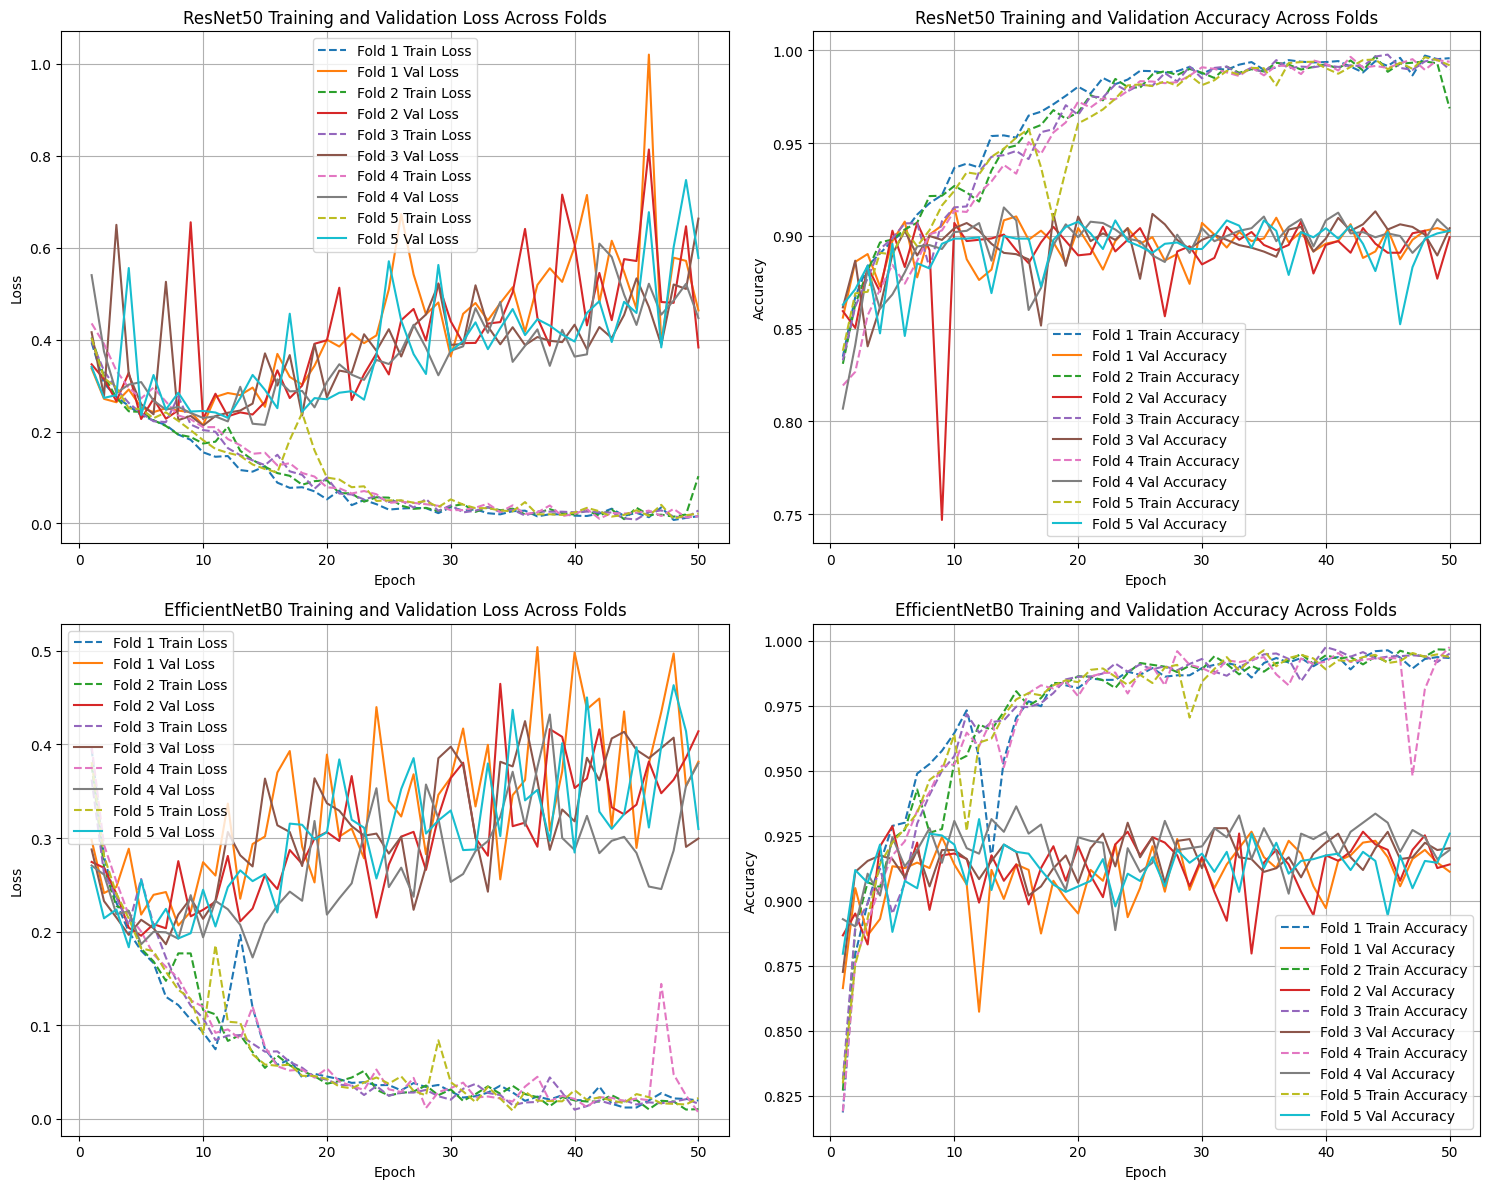


Making predictions on test data using selected models...
  Gathering predictions from ResNet50 models...
    Predicting with ResNet50 (Fold 1)


    ResNet50 F1:   0%|          | 0/338 [00:00<?, ?it/s]


FileNotFoundError: [Errno 2] No such file or directory: 'data/train_data/ID_ICB8K9.npy'

In [15]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from torchvision import transforms
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy # For deep copying models



print(f"Total training samples: {len(train_df)}")
print(f"Total test samples: {len(test_df)}")

# --- Data Loading and Normalization Function ---
def load_and_normalize_npy_image(image_id_path):
    img = np.load(image_id_path)
    img = img.astype(np.float32) 
    img_normalized = (img - img.min(axis=(0, 1))) / (img.max(axis=(0, 1)) - img.min(axis=(0, 1)) + 1e-5)
    return img_normalized

# --- Custom PyTorch Dataset Class ---
class NPYDataset(Dataset):
    def __init__(self, dataframe, transform=None, is_test=False):
        self.dataframe = dataframe
        self.transform = transform
        self.is_test = is_test

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['ID_path']
        image = load_and_normalize_npy_image(img_path)
        image = np.transpose(image, (2, 0, 1)) # C, H, W
        image = torch.from_numpy(image)

        if self.transform:
            image = self.transform(image)

        if self.is_test:
            return image
        else:
            label = self.dataframe.iloc[idx]['label']
            return image, torch.tensor(label, dtype=torch.long)

# --- Model Definition Functions ---
def get_resnet_model(model_name, num_classes=2):
    if model_name == 'resnet18':
        model = models.resnet18(weights=models.ResNet18_Weights.DEFAULT)
    elif model_name == 'resnet50':
        model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT)
    else:
        raise ValueError(f"Unknown ResNet model: {model_name}")
    
    # Modify the first convolutional layer for 12 input channels
    original_conv1 = model.conv1
    new_conv1 = nn.Conv2d(12, original_conv1.out_channels, 
                          kernel_size=original_conv1.kernel_size,
                          stride=original_conv1.stride,
                          padding=original_conv1.padding,
                          bias=original_conv1.bias)
    nn.init.kaiming_normal_(new_conv1.weight, mode='fan_out', nonlinearity='relu') 
    model.conv1 = new_conv1
    
    # Modify the final classification layer
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, num_classes)
    return model

def get_efficientnet_model(model_name, num_classes=2):
    if model_name == 'efficientnet_b0':
        model = models.efficientnet_b0(weights=models.EfficientNet_B0_Weights.DEFAULT)
    else:
        raise ValueError(f"Unknown EfficientNet model: {model_name}")

    # EfficientNet's first conv layer is model.features[0][0]
    original_conv1 = model.features[0][0]
    new_conv1 = nn.Conv2d(12, original_conv1.out_channels, 
                          kernel_size=original_conv1.kernel_size,
                          stride=original_conv1.stride,
                          padding=original_conv1.padding,
                          bias=original_conv1.bias)
    nn.init.kaiming_normal_(new_conv1.weight, mode='fan_out', nonlinearity='relu') 
    model.features[0][0] = new_conv1

    # Modify the final classification layer
    num_ftrs = model.classifier[1].in_features
    model.classifier[1] = nn.Linear(num_ftrs, num_classes)
    return model

# Dictionary of models to try
model_configs = {
    'ResNet18': lambda: get_resnet_model('resnet18'),
    'ResNet50': lambda: get_resnet_model('resnet50'),
    'EfficientNetB0': lambda: get_efficientnet_model('efficientnet_b0'),
}


# --- Device Configuration ---
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# --- Cross-Validation Setup ---
N_SPLITS = 5 # Number of folds for cross-validation
skf = StratifiedKFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

# --- Training Parameters ---
NUM_EPOCHS = 50 # 5 Reduced for demonstration, increase for actual training (e.g., 15-30)
BATCH_SIZE = 16
LEARNING_RATE = 0.001

# Define transforms
data_transforms = {
    'train': transforms.Compose([
        # Add augmentations suitable for your data
        # transforms.RandomHorizontalFlip(),
        # transforms.RandomRotation(10),
        # transforms.ColorJitter(brightness=0.1, contrast=0.1)
    ]),
    'val': transforms.Compose([]), # No augmentation for validation
}

# Store results for each model type
model_performance_summary = {} # Stores avg_val_acc, avg_train_val_gap
all_trained_fold_models = {} # Stores best_per_fold models for each model type

# --- Main Loop: Iterate through each model type ---
for model_name, model_fn in model_configs.items():
    print(f"\n======== Training Model: {model_name} ========")
    
    # Lists to store metrics across folds for the current model type
    model_fold_train_losses = []
    model_fold_train_accuracies = []
    model_fold_val_losses = []
    model_fold_val_accuracies = []
    
    # List to store best models from each fold for this model type
    current_model_type_fold_models = []

    for fold, (train_idx, val_idx) in enumerate(skf.split(train_df['ID_path'], train_df['label'])):
        print(f"\n--- Model: {model_name}, Fold {fold+1}/{N_SPLITS} ---")
        
        # Create train and validation dataframes for the current fold
        fold_train_df = train_df.iloc[train_idx].reset_index(drop=True)
        fold_val_df = train_df.iloc[val_idx].reset_index(drop=True)

        train_dataset = NPYDataset(dataframe=fold_train_df, transform=data_transforms['train'])
        valid_dataset = NPYDataset(dataframe=fold_val_df, transform=data_transforms['val'])

        train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
        valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

        # Get a fresh model instance for the current fold
        model = model_fn().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

        # Lists to store metrics for the current epoch within this fold
        current_fold_train_losses = []
        current_fold_train_accuracies = []
        current_fold_val_losses = []
        current_fold_val_accuracies = []

        best_val_accuracy = -1.0
        best_model_state = None

        for epoch in range(NUM_EPOCHS):
            model.train()
            running_loss = 0.0
            correct_predictions = 0
            total_predictions = 0

            for inputs, labels in tqdm(train_loader, desc=f"M:{model_name} F:{fold+1} E:{epoch+1} [Train]"):
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                _, predicted = torch.max(outputs, 1)
                total_predictions += labels.size(0)
                correct_predictions += (predicted == labels).sum().item()

            epoch_loss = running_loss / len(train_dataset)
            epoch_accuracy = correct_predictions / total_predictions
            current_fold_train_losses.append(epoch_loss)
            current_fold_train_accuracies.append(epoch_accuracy)
            
            # Validation phase
            model.eval()
            val_running_loss = 0.0
            val_correct_predictions = 0
            val_total_predictions = 0

            with torch.no_grad():
                for inputs, labels in tqdm(valid_loader, desc=f"M:{model_name} F:{fold+1} E:{epoch+1} [Validation]"):
                    inputs = inputs.to(device)
                    labels = labels.to(device)

                    outputs = model(inputs)
                    loss = criterion(outputs, labels)

                    val_running_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    val_total_predictions += labels.size(0)
                    val_correct_predictions += (predicted == labels).sum().item()

            val_epoch_loss = val_running_loss / len(valid_dataset)
            val_epoch_accuracy = val_correct_predictions / val_total_predictions
            current_fold_val_losses.append(val_epoch_loss)
            current_fold_val_accuracies.append(val_epoch_accuracy)
            
            print(f"M:{model_name} F:{fold+1} E:{epoch+1} | Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_accuracy:.4f} | Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_accuracy:.4f}")

            # Save the best model for this fold based on validation accuracy
            if val_epoch_accuracy > best_val_accuracy:
                best_val_accuracy = val_epoch_accuracy
                best_model_state = copy.deepcopy(model.state_dict())
                print(f"  --> Best model for Fold {fold+1} (Model: {model_name}) updated with Val Acc: {best_val_accuracy:.4f}")

        # Store metrics for the current fold of this model type
        model_fold_train_losses.append(current_fold_train_losses)
        model_fold_train_accuracies.append(current_fold_train_accuracies)
        model_fold_val_losses.append(current_fold_val_losses)
        model_fold_val_accuracies.append(current_fold_val_accuracies)

        # Load the best model state for this fold and append to trained_models
        if best_model_state:
            # Get a fresh model instance for storing the best state
            best_fold_model = model_fn().to(device)
            best_fold_model.load_state_dict(best_model_state)
            current_model_type_fold_models.append(best_fold_model)
            print(f"Fold {fold+1} training complete. Best validation accuracy: {best_val_accuracy:.4f}")
        else:
            print(f"Fold {fold+1} training complete. No best model state saved (this might happen if NUM_EPOCHS is 0 or very low). Appending last model.")
            current_model_type_fold_models.append(model) # Fallback to last trained model

    # Calculate average performance for this model type across all folds
    avg_val_acc_per_model_type = np.mean([np.max(acc) for acc in model_fold_val_accuracies]) # Max val acc from each fold
    
    # Calculate average train-val accuracy gap for this model type
    # For each fold, find the last epoch's train_acc - val_acc, then average
    avg_train_val_gap_per_model_type = np.mean([
        (train_acc[-1] - val_acc[-1]) # last epoch's gap
        for train_acc, val_acc in zip(model_fold_train_accuracies, model_fold_val_accuracies)
    ])

    model_performance_summary[model_name] = {
        'avg_val_accuracy': avg_val_acc_per_model_type,
        'avg_train_val_gap': avg_train_val_gap_per_model_type,
        'fold_train_losses': model_fold_train_losses,
        'fold_train_accuracies': model_fold_train_accuracies,
        'fold_val_losses': model_fold_val_losses,
        'fold_val_accuracies': model_fold_val_accuracies,
    }
    all_trained_fold_models[model_name] = current_model_type_fold_models

print("\nAll Cross-Validation Training Complete!")

# --- Evaluate and Select Best Performing Models ---
print("\n--- Model Performance Summary ---")
for model_name, metrics in model_performance_summary.items():
    print(f"Model: {model_name}")
    print(f"  Average Validation Accuracy: {metrics['avg_val_accuracy']:.4f}")
    print(f"  Average Train-Val Accuracy Gap: {metrics['avg_train_val_gap']:.4f}")

# Criteria for selection
VALIDATION_ACCURACY_THRESHOLD = 0.6 # Adjust based on expected performance
TRAIN_VAL_GAP_THRESHOLD = 0.1       # Smaller gap means less overfitting

selected_best_model_types = []
for model_name, metrics in model_performance_summary.items():
    if (metrics['avg_val_accuracy'] >= VALIDATION_ACCURACY_THRESHOLD and
        metrics['avg_train_val_gap'] <= TRAIN_VAL_GAP_THRESHOLD):
        selected_best_model_types.append(model_name)

# If no model meets criteria, select the one with the highest average validation accuracy
if not selected_best_model_types:
    print("\nNo models met the strict performance criteria. Selecting the top model by average validation accuracy.")
    best_model_name_overall = max(model_performance_summary, 
                                  key=lambda k: model_performance_summary[k]['avg_val_accuracy'])
    selected_best_model_types.append(best_model_name_overall)
else:
    print(f"\nSelected best performing model types: {selected_best_model_types}")

# --- Plot Learning Curves for Selected Models ---
plt.figure(figsize=(15, 6 * len(selected_best_model_types)))

plot_idx = 1
for model_name in selected_best_model_types:
    metrics = model_performance_summary[model_name]
    
    plt.subplot(len(selected_best_model_types), 2, plot_idx)
    for i in range(N_SPLITS):
        epochs_range = range(1, NUM_EPOCHS + 1)
        plt.plot(epochs_range, metrics['fold_train_losses'][i], label=f'Fold {i+1} Train Loss', linestyle='--')
        plt.plot(epochs_range, metrics['fold_val_losses'][i], label=f'Fold {i+1} Val Loss')
    plt.title(f'{model_name} Training and Validation Loss Across Folds')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(len(selected_best_model_types), 2, plot_idx + 1)
    for i in range(N_SPLITS):
        epochs_range = range(1, NUM_EPOCHS + 1)
        plt.plot(epochs_range, metrics['fold_train_accuracies'][i], label=f'Fold {i+1} Train Accuracy', linestyle='--')
        plt.plot(epochs_range, metrics['fold_val_accuracies'][i], label=f'Fold {i+1} Val Accuracy')
    plt.title(f'{model_name} Training and Validation Accuracy Across Folds')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plot_idx += 2

plt.tight_layout()
plt.show()

# --- Make Predictions on Test Data using selected models ---
print("\nMaking predictions on test data using selected models...")

test_dataset = NPYDataset(dataframe=test_df, is_test=True, transform=data_transforms['val'])
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

all_ensemble_predictions = [] # To store probabilities from all selected models

for model_name in selected_best_model_types:
    print(f"  Gathering predictions from {model_name} models...")
    models_for_ensembling = all_trained_fold_models[model_name]
    
    for i, model_fold in enumerate(models_for_ensembling):
        print(f"    Predicting with {model_name} (Fold {i+1})")
        model_fold.eval()
        fold_predictions = []
        with torch.no_grad():
            for inputs in tqdm(test_loader, desc=f"    {model_name} F{i+1}"):
                inputs = inputs.to(device)
                outputs = model_fold(inputs)
                probabilities = torch.softmax(outputs, dim=1) 
                fold_predictions.extend(probabilities.cpu().numpy())
        all_ensemble_predictions.append(np.array(fold_predictions))

if not all_ensemble_predictions:
    raise ValueError("No models were selected or trained to make predictions.")

# Ensemble predictions by averaging probabilities from all gathered models
# Stacks predictions: (num_selected_models * N_SPLITS, num_samples, num_classes)
ensemble_predictions = np.mean(np.array(all_ensemble_predictions), axis=0)

# For final submission, take the class with the highest probability
final_predictions = np.argmax(ensemble_predictions, axis=1)

print("\nFinal predictions complete!")

# --- Create Kaggle Submission File ---
submission_df = pd.DataFrame({
    'ID': test_df['ID'],
    'label': final_predictions
})

submission_file_path = 'submission.csv'
submission_df.to_csv(submission_file_path, index=False)

print(f"Kaggle submission file created at: {submission_file_path}")
print("Sample submission head:")
print(submission_df.head())